https://github.com/chengstone/movie_recommender

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

import seaborn as sns
sns.set(font='Arial Unicode MS')  # 解决Seaborn中文显示问题
import sys
sys.path.append('/Users/luoyonggui/PycharmProjects/mayiutils_n1/mayiutils/data_prepare')
from data_explore import DataExplore as de

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# load data 

## users

In [4]:
users_title = ['UserID', 'Gender', 'Age', 'OccupationID', 'Zip-code']
users = pd.read_table('./ml_1m/users.dat', sep='::', header=None, names=users_title, engine = 'python')
users.head()

,UserID,Gender,Age,OccupationID,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
de.describe(users)

num of records: 6040, num of columns: 5


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
UserID,int64,6040,0,0.0,1,1,0.0165563,3020.5,1743.74,1,1510.75,3020.5,4530.25,6040
Gender,object,2,0,0.0,M,4331,71.7053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,int64,7,0,0.0,25,2096,34.702,30.6392,12.896,1,25,25,35,56
OccupationID,int64,21,0,0.0,4,759,12.5662,8.14685,6.32951,0,3,7,14,20
Zip-code,object,3439,0,0.0,48104,19,0.31457,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
del users['Zip-code']

In [7]:
#改变User数据中性别和年龄
gender_map = {'F':0, 'M':1}
users['Gender'] = users['Gender'].map(gender_map)

age_map = {val:ii for ii,val in enumerate(set(users['Age']))}
users['Age'] = users['Age'].map(age_map)

## movies

In [8]:
movies_title = ['MovieID', 'Title', 'Genres']
movies = pd.read_table('./ml_1m/movies.dat', sep='::', header=None, names=movies_title, engine = 'python')
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
de.describe(movies)

num of records: 3883, num of columns: 3


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
MovieID,int64,3883,0,0.0,1,1,0.0257533,1986.05,1146.78,1,982.5,2010,2980.5,3952
Title,object,3883,0,0.0,"$1,000,000 Duck (1971)",1,0.0257533,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,object,301,0,0.0,Drama,843,21.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#将Title中的年份去掉
movies['Title'] = movies.Title.str.replace(r'\(\d*\)', '')

In [10]:
#电影类型转数字字典
genres2int = {v1: i1 for i1, v1 in enumerate(set([ii for i in movies.Genres.str.split('|').tolist() for ii in i if ii != '']))}

In [14]:
genres2int

{'Western': 0,
 'Thriller': 1,
 "Children's": 2,
 'Romance': 3,
 'Horror': 4,
 'Documentary': 5,
 'War': 6,
 'Drama': 7,
 'Crime': 8,
 'Mystery': 9,
 'Animation': 10,
 'Musical': 11,
 'Adventure': 12,
 'Action': 13,
 'Sci-Fi': 14,
 'Fantasy': 15,
 'Film-Noir': 16,
 'Comedy': 17}

In [11]:
#将电影类型转成等长数字列表，长度是18
def t(s):
    lt = [0] * 18
    for i in s.split('|'):
        lt[genres2int[i]] = 1
    return lt
movies['Genres'] = movies.Genres.map(t)

In [12]:
#电影Title转数字字典
title2int = {v1: i1 for i1, v1 in enumerate(set([ii for i in movies.Title.str.split(r'\s+|\(|\)').tolist() for ii in i if ii != '']))}

title2int['<PAD>'] = len(title2int)

In [13]:
#将电影Title转成等长数字列表，长度是18
movies.Title.str.split(r'\s+|\(|\)').str.len().max()

18

In [14]:
import re

In [15]:
re.split(r'\s+|\(|\)', 'Toy Story ')

['Toy', 'Story', '']

In [16]:
title_count = 18
def t(s):
    lt = [title2int['<PAD>']] * title_count
    count = 0
    for i in re.split(r'\s+|\(|\)', s):
        if i != '':
            lt[count] = title2int[i]
            count += 1
    return lt
movies['Title'] = movies.Title.map(t)

## ratings

In [17]:
ratings_title = ['UserID','MovieID', 'Rating', 'timestamps']
ratings = pd.read_table('./ml_1m/ratings.dat', sep='::', header=None, names=ratings_title, engine = 'python')
ratings.head()

,UserID,MovieID,Rating,timestamps
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
de.describe(ratings)

num of records: 1000209, num of columns: 4


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
UserID,int64,6040,0,0.0,4169,2314,0.231352,3.024512e+03,1.728413e+03,1.0,1506.0,3070.0,4476.0,6.040000e+03
MovieID,int64,3706,0,0.0,2858,3428,0.342728,1.865540e+03,1.096041e+03,1.0,1030.0,1835.0,2770.0,3.952000e+03
Rating,int64,5,0,0.0,4,348971,34.8898,3.581564e+00,1.117102e+00,1.0,3.0,4.0,4.0,5.000000e+00
timestamps,int64,458455,0,0.0,975528402,30,0.00299937,9.722437e+08,1.215256e+07,956703932.0,965302637.0,973018006.0,975220939.0,1.046455e+09


In [18]:
del ratings['timestamps']

In [19]:
#合并三个表
data = pd.merge(pd.merge(ratings, users), movies)

In [20]:
#将数据分成X和y两张表
target_fields = ['Rating']
features_pd, targets_pd = data.drop(target_fields, axis=1), data[target_fields]

features = features_pd.values
targets_values = targets_pd.values

In [21]:
import pickle
pickle.dump((title_count, title2int, genres2int, features, targets_values, ratings, users, movies, data), open('preprocess.p', 'wb'))


In [22]:
users.head()

,UserID,Gender,Age,OccupationID
0,1,0,0,10
1,2,1,5,16
2,3,1,6,15
3,4,1,2,7
4,5,1,6,20


In [23]:
movies.head()

,MovieID,Title,Genres
0,1,"[5121, 1104, 5127, 5127, 5127, 5127, 5127, 512...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, ..."
1,2,"[1579, 5127, 5127, 5127, 5127, 5127, 5127, 512...","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ..."
2,3,"[1119, 238, 1008, 5127, 5127, 5127, 5127, 5127...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ..."
3,4,"[3607, 4180, 1400, 5127, 5127, 5127, 5127, 512...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
4,5,"[4006, 3230, 3308, 2505, 1068, 3898, 5127, 512...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."


In [48]:
data.head()

,UserID,MovieID,Rating,Gender,Age,OccupationID,Title,Genres
0,1,1193,5,0,0,10,"[3592, 3839, 2500, 2141, 592, 4350, 5127, 5127...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,1193,5,1,5,16,"[3592, 3839, 2500, 2141, 592, 4350, 5127, 5127...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,12,1193,4,1,6,12,"[3592, 3839, 2500, 2141, 592, 4350, 5127, 5127...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
3,15,1193,4,1,6,7,"[3592, 3839, 2500, 2141, 592, 4350, 5127, 5127...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,17,1193,5,1,3,1,"[3592, 3839, 2500, 2141, 592, 4350, 5127, 5127...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [1]:
import tensorflow as tf
import os
import pickle

def save_params(params):
    """
    Save parameters to file
    """
    pickle.dump(params, open('params.p', 'wb'))


def load_params():
    """
    Load parameters from file
    """
    return pickle.load(open('params.p', mode='rb'))


# 参数定义

In [25]:
#嵌入矩阵的维度
embed_dim = 32
#用户ID个数
uid_max = max(data.UserID) + 1 # 6040
#性别个数
gender_max = max(data.Gender) + 1 # 1 + 1 = 2
#年龄类别个数
age_max = max(data.Age) + 1 # 6 + 1 = 7
#职业个数
job_max = max(data.OccupationID) + 1# 20 + 1 = 21

#电影ID个数
movie_id_max = max(data.MovieID) + 1 # 3952
#电影类型个数
movie_categories_max = len(genres2int) + 1 # 18 + 1 = 19
#电影名单词个数
movie_title_max = len(title2int) # 5216

#对电影类型嵌入向量做加和操作的标志，考虑过使用mean做平均，但是没实现mean
combiner = "sum"

#电影名长度
sentences_size = title_count # = 18
#文本卷积滑动窗口，分别滑动2, 3, 4, 5个单词
window_sizes = {2, 3, 4, 5}
#文本卷积核数量
filter_num = 8

#电影ID转下标的字典，数据集中电影ID跟下标不一致，比如第5行的数据电影ID不一定是5
movieid2idx = {val[0]:i for i, val in enumerate(movies.values)}

In [26]:
# Number of Epochs
num_epochs = 5
# Batch Size
batch_size = 256

dropout_keep = 0.5
# Learning Rate
learning_rate = 0.0001
# Show stats for every n number of batches
show_every_n_batches = 20

save_dir = './save'

# tfapi构建神经网络

## get_inputs()

In [60]:
def get_inputs():
    uid = tf.placeholder(tf.int32, [None, 1], name="uid")
    user_gender = tf.placeholder(tf.int32, [None, 1], name="user_gender")
    user_age = tf.placeholder(tf.int32, [None, 1], name="user_age")
    user_job = tf.placeholder(tf.int32, [None, 1], name="user_job")
    
    movie_id = tf.placeholder(tf.int32, [None, 1], name="movie_id")
    movie_categories = tf.placeholder(tf.int32, [None, 18], name="movie_categories")
    movie_titles = tf.placeholder(tf.int32, [None, 18], name="movie_titles")
    targets = tf.placeholder(tf.int32, [None, 1], name="targets")
    LearningRate = tf.placeholder(tf.float32, name = "LearningRate")
    dropout_keep_prob = tf.placeholder(tf.float32, name = "dropout_keep_prob")
    return uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles, targets, LearningRate, dropout_keep_prob

In [61]:
def get_user_embedding(uid, user_gender, user_age, user_job):
    with tf.name_scope("user_embedding"):
        uid_embed_matrix = tf.Variable(tf.random_uniform([uid_max, embed_dim], -1, 1), name = "uid_embed_matrix")
        uid_embed_layer = tf.nn.embedding_lookup(uid_embed_matrix, uid, name = "uid_embed_layer")
    
        gender_embed_matrix = tf.Variable(tf.random_uniform([gender_max, embed_dim // 2], -1, 1), name= "gender_embed_matrix")
        gender_embed_layer = tf.nn.embedding_lookup(gender_embed_matrix, user_gender, name = "gender_embed_layer")
        
        age_embed_matrix = tf.Variable(tf.random_uniform([age_max, embed_dim // 2], -1, 1), name="age_embed_matrix")
        age_embed_layer = tf.nn.embedding_lookup(age_embed_matrix, user_age, name="age_embed_layer")
        
        job_embed_matrix = tf.Variable(tf.random_uniform([job_max, embed_dim // 2], -1, 1), name = "job_embed_matrix")
        job_embed_layer = tf.nn.embedding_lookup(job_embed_matrix, user_job, name = "job_embed_layer")
    return uid_embed_layer, gender_embed_layer, age_embed_layer, job_embed_layer

In [62]:
def get_user_feature_layer(uid_embed_layer, gender_embed_layer, age_embed_layer, job_embed_layer):
    with tf.name_scope("user_fc"):
        #第一层全连接
        uid_fc_layer = tf.layers.dense(uid_embed_layer, embed_dim, name = "uid_fc_layer", activation=tf.nn.relu)
        gender_fc_layer = tf.layers.dense(gender_embed_layer, embed_dim, name = "gender_fc_layer", activation=tf.nn.relu)
        age_fc_layer = tf.layers.dense(age_embed_layer, embed_dim, name ="age_fc_layer", activation=tf.nn.relu)
        job_fc_layer = tf.layers.dense(job_embed_layer, embed_dim, name = "job_fc_layer", activation=tf.nn.relu)
        
        #第二层全连接
        user_combine_layer = tf.concat([uid_fc_layer, gender_fc_layer, age_fc_layer, job_fc_layer], 2)  #(?, 1, 128)
        user_combine_layer = tf.contrib.layers.fully_connected(user_combine_layer, 200, tf.tanh)  #(?, 1, 200)
    
        user_combine_layer_flat = tf.reshape(user_combine_layer, [-1, 200])
    return user_combine_layer, user_combine_layer_flat

In [63]:
def get_movie_id_embed_layer(movie_id):
    with tf.name_scope("movie_embedding"):
        movie_id_embed_matrix = tf.Variable(tf.random_uniform([movie_id_max, embed_dim], -1, 1), name = "movie_id_embed_matrix")
        movie_id_embed_layer = tf.nn.embedding_lookup(movie_id_embed_matrix, movie_id, name = "movie_id_embed_layer")
    return movie_id_embed_layer

In [64]:
def get_movie_categories_layers(movie_categories):
    with tf.name_scope("movie_categories_layers"):
        movie_categories_embed_matrix = tf.Variable(tf.random_uniform([movie_categories_max, embed_dim], -1, 1), name = "movie_categories_embed_matrix")
        movie_categories_embed_layer = tf.nn.embedding_lookup(movie_categories_embed_matrix, movie_categories, name = "movie_categories_embed_layer")
        if combiner == "sum":
            movie_categories_embed_layer = tf.reduce_sum(movie_categories_embed_layer, axis=1, keep_dims=True)
    #     elif combiner == "mean":

    return movie_categories_embed_layer

In [65]:
def get_movie_cnn_layer(movie_titles):
    #从嵌入矩阵中得到电影名对应的各个单词的嵌入向量
    with tf.name_scope("movie_embedding"):
        movie_title_embed_matrix = tf.Variable(tf.random_uniform([movie_title_max, embed_dim], -1, 1), name = "movie_title_embed_matrix")
        movie_title_embed_layer = tf.nn.embedding_lookup(movie_title_embed_matrix, movie_titles, name = "movie_title_embed_layer")
        movie_title_embed_layer_expand = tf.expand_dims(movie_title_embed_layer, -1)
    
    #对文本嵌入层使用不同尺寸的卷积核做卷积和最大池化
    pool_layer_lst = []
    for window_size in window_sizes:
        with tf.name_scope("movie_txt_conv_maxpool_{}".format(window_size)):
            filter_weights = tf.Variable(tf.truncated_normal([window_size, embed_dim, 1, filter_num],stddev=0.1),name = "filter_weights")
            filter_bias = tf.Variable(tf.constant(0.1, shape=[filter_num]), name="filter_bias")
            
            conv_layer = tf.nn.conv2d(movie_title_embed_layer_expand, filter_weights, [1,1,1,1], padding="VALID", name="conv_layer")
            relu_layer = tf.nn.relu(tf.nn.bias_add(conv_layer,filter_bias), name ="relu_layer")
            
            maxpool_layer = tf.nn.max_pool(relu_layer, [1,sentences_size - window_size + 1 ,1,1], [1,1,1,1], padding="VALID", name="maxpool_layer")
            pool_layer_lst.append(maxpool_layer)

    #Dropout层
    with tf.name_scope("pool_dropout"):
        pool_layer = tf.concat(pool_layer_lst, 3, name ="pool_layer")
        max_num = len(window_sizes) * filter_num
        pool_layer_flat = tf.reshape(pool_layer , [-1, 1, max_num], name = "pool_layer_flat")
    
        dropout_layer = tf.nn.dropout(pool_layer_flat, dropout_keep_prob, name = "dropout_layer")
    return pool_layer_flat, dropout_layer

In [66]:
def get_movie_feature_layer(movie_id_embed_layer, movie_categories_embed_layer, dropout_layer):
    with tf.name_scope("movie_fc"):
        #第一层全连接
        movie_id_fc_layer = tf.layers.dense(movie_id_embed_layer, embed_dim, name = "movie_id_fc_layer", activation=tf.nn.relu)
        movie_categories_fc_layer = tf.layers.dense(movie_categories_embed_layer, embed_dim, name = "movie_categories_fc_layer", activation=tf.nn.relu)
    
        #第二层全连接
        movie_combine_layer = tf.concat([movie_id_fc_layer, movie_categories_fc_layer, dropout_layer], 2)  #(?, 1, 96)
        movie_combine_layer = tf.contrib.layers.fully_connected(movie_combine_layer, 200, tf.tanh)  #(?, 1, 200)
    
        movie_combine_layer_flat = tf.reshape(movie_combine_layer, [-1, 200])
    return movie_combine_layer, movie_combine_layer_flat

In [67]:
tf.reset_default_graph()
train_graph = tf.Graph()
with train_graph.as_default():
    #获取输入占位符
    uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob = get_inputs()
    #获取User的4个嵌入向量
    uid_embed_layer, gender_embed_layer, age_embed_layer, job_embed_layer = get_user_embedding(uid, user_gender, user_age, user_job)
    #得到用户特征
    user_combine_layer, user_combine_layer_flat = get_user_feature_layer(uid_embed_layer, gender_embed_layer, age_embed_layer, job_embed_layer)
    #获取电影ID的嵌入向量
    movie_id_embed_layer = get_movie_id_embed_layer(movie_id)
    #获取电影类型的嵌入向量
    movie_categories_embed_layer = get_movie_categories_layers(movie_categories)
    #获取电影名的特征向量
    pool_layer_flat, dropout_layer = get_movie_cnn_layer(movie_titles)
    #得到电影特征
    movie_combine_layer, movie_combine_layer_flat = get_movie_feature_layer(movie_id_embed_layer, 
                                                                                movie_categories_embed_layer, 
                                                                                dropout_layer)
    #计算出评分，要注意两个不同的方案，inference的名字（name值）是不一样的，后面做推荐时要根据name取得tensor
    with tf.name_scope("inference"):
        #将用户特征和电影特征作为输入，经过全连接，输出一个值的方案
#         inference_layer = tf.concat([user_combine_layer_flat, movie_combine_layer_flat], 1)  #(?, 200)
#         inference = tf.layers.dense(inference_layer, 1,
#                                     kernel_initializer=tf.truncated_normal_initializer(stddev=0.01), 
#                                     kernel_regularizer=tf.nn.l2_loss, name="inference")
        #简单的将用户特征和电影特征做矩阵乘法得到一个预测评分
#        inference = tf.matmul(user_combine_layer_flat, tf.transpose(movie_combine_layer_flat))
        inference = tf.reduce_sum(user_combine_layer_flat * movie_combine_layer_flat, axis=1)
        inference = tf.expand_dims(inference, axis=1)

    with tf.name_scope("loss"):
        # MSE损失，将计算值回归到评分
        cost = tf.losses.mean_squared_error(targets, inference )
        loss = tf.reduce_mean(cost)
    # 优化损失 
#     train_op = tf.train.AdamOptimizer(lr).minimize(loss)  #cost
    global_step = tf.Variable(0, name="global_step", trainable=False)
    optimizer = tf.train.AdamOptimizer(lr)
    gradients = optimizer.compute_gradients(loss)  #cost
    train_op = optimizer.apply_gradients(gradients, global_step=global_step)
    

W0414 19:00:06.759146 140735557628800 deprecation.py:506] From <ipython-input-65-bb012f2abe28>:27: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0414 19:00:06.963695 140735557628800 deprecation.py:323] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/losses/losses_impl.py:121: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [68]:
inference

<tf.Tensor 'inference/ExpandDims:0' shape=(?, 1) dtype=float32>

In [69]:
def get_batches(Xs, ys, batch_size):
    for start in range(0, len(Xs), batch_size):
        end = min(start + batch_size, len(Xs))
        yield Xs[start:end], ys[start:end]

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import time
import datetime
from sklearn.model_selection import train_test_split

In [73]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import time
import datetime
from sklearn.model_selection import train_test_split

losses = {'train':[], 'test':[]}

with tf.Session(graph=train_graph) as sess:
    
    #搜集数据给tensorBoard用
    # Keep track of gradient values and sparsity
    grad_summaries = []
    for g, v in gradients:
        if g is not None:
            grad_hist_summary = tf.summary.histogram("{}/grad/hist".format(v.name.replace(':', '_')), g)
            sparsity_summary = tf.summary.scalar("{}/grad/sparsity".format(v.name.replace(':', '_')), tf.nn.zero_fraction(g))
            grad_summaries.append(grad_hist_summary)
            grad_summaries.append(sparsity_summary)
    grad_summaries_merged = tf.summary.merge(grad_summaries)
        
    # Output directory for models and summaries
    timestamp = str(int(time.time()))
    out_dir = os.path.abspath(os.path.join(os.path.curdir, "runs", timestamp))
    print("Writing to {}\n".format(out_dir))
     
    # Summaries for loss and accuracy
    loss_summary = tf.summary.scalar("loss", loss)

    # Train Summaries
    train_summary_op = tf.summary.merge([loss_summary, grad_summaries_merged])
    train_summary_dir = os.path.join(out_dir, "summaries", "train")
    train_summary_writer = tf.summary.FileWriter(train_summary_dir, sess.graph)

    # Inference summaries
    inference_summary_op = tf.summary.merge([loss_summary])
    inference_summary_dir = os.path.join(out_dir, "summaries", "inference")
    inference_summary_writer = tf.summary.FileWriter(inference_summary_dir, sess.graph)

    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    for epoch_i in range(num_epochs):
        
        #将数据集分成训练集和测试集，随机种子不固定
        train_X,test_X, train_y, test_y = train_test_split(features,  
                                                           targets_values,  
                                                           test_size = 0.2,  
                                                           random_state = 0)  
        
        train_batches = get_batches(train_X, train_y, batch_size)
        test_batches = get_batches(test_X, test_y, batch_size)
    
        #训练的迭代，保存训练损失
        for batch_i in range(len(train_X) // batch_size):
            x, y = next(train_batches)

            categories = np.zeros([batch_size, 18])
            for i in range(batch_size):
                categories[i] = x.take(6,1)[i]

            titles = np.zeros([batch_size, sentences_size])
            for i in range(batch_size):
                titles[i] = x.take(5,1)[i]

            feed = {
                uid: np.reshape(x.take(0,1), [batch_size, 1]),
                user_gender: np.reshape(x.take(2,1), [batch_size, 1]),
                user_age: np.reshape(x.take(3,1), [batch_size, 1]),
                user_job: np.reshape(x.take(4,1), [batch_size, 1]),
                movie_id: np.reshape(x.take(1,1), [batch_size, 1]),
                movie_categories: categories,  #x.take(6,1)
                movie_titles: titles,  #x.take(5,1)
                targets: np.reshape(y, [batch_size, 1]),
                dropout_keep_prob: dropout_keep, #dropout_keep
                lr: learning_rate}

            step, train_loss, summaries, _ = sess.run([global_step, loss, train_summary_op, train_op], feed)  #cost
            losses['train'].append(train_loss)
            train_summary_writer.add_summary(summaries, step)  #
            
            # Show every <show_every_n_batches> batches
            if (epoch_i * (len(train_X) // batch_size) + batch_i) % show_every_n_batches == 0:
                time_str = datetime.datetime.now().isoformat()
                print('{}: Epoch {:>3} Batch {:>4}/{}   train_loss = {:.3f}'.format(
                    time_str,
                    epoch_i,
                    batch_i,
                    (len(train_X) // batch_size),
                    train_loss))
                
        #使用测试数据的迭代
        for batch_i  in range(len(test_X) // batch_size):
            x, y = next(test_batches)
            
            categories = np.zeros([batch_size, 18])
            for i in range(batch_size):
                categories[i] = x.take(6,1)[i]

            titles = np.zeros([batch_size, sentences_size])
            for i in range(batch_size):
                titles[i] = x.take(5,1)[i]

            feed = {
                uid: np.reshape(x.take(0,1), [batch_size, 1]),
                user_gender: np.reshape(x.take(2,1), [batch_size, 1]),
                user_age: np.reshape(x.take(3,1), [batch_size, 1]),
                user_job: np.reshape(x.take(4,1), [batch_size, 1]),
                movie_id: np.reshape(x.take(1,1), [batch_size, 1]),
                movie_categories: categories,  #x.take(6,1)
                movie_titles: titles,  #x.take(5,1)
                targets: np.reshape(y, [batch_size, 1]),
                dropout_keep_prob: 1,
                lr: learning_rate}
            
            step, test_loss, summaries = sess.run([global_step, loss, inference_summary_op], feed)  #cost

            #保存测试损失
            losses['test'].append(test_loss)
            inference_summary_writer.add_summary(summaries, step)  #

            time_str = datetime.datetime.now().isoformat()
            if (epoch_i * (len(test_X) // batch_size) + batch_i) % show_every_n_batches == 0:
                print('{}: Epoch {:>3} Batch {:>4}/{}   test_loss = {:.3f}'.format(
                    time_str,
                    epoch_i,
                    batch_i,
                    (len(test_X) // batch_size),
                    test_loss))

    # Save Model
    saver.save(sess, save_dir)  #, global_step=epoch_i
    print('Model Trained and Saved')


Writing to /Users/luoyonggui/PycharmProjects/mayiexamples/RecommendatIon_System/runs/1586862129

2020-04-14T19:02:15.827812: Epoch   0 Batch    0/3125   train_loss = 10.035
2020-04-14T19:02:16.668557: Epoch   0 Batch   20/3125   train_loss = 4.024
2020-04-14T19:02:17.476023: Epoch   0 Batch   40/3125   train_loss = 2.715
2020-04-14T19:02:18.342124: Epoch   0 Batch   60/3125   train_loss = 2.043
2020-04-14T19:02:19.168840: Epoch   0 Batch   80/3125   train_loss = 1.752
2020-04-14T19:02:20.120446: Epoch   0 Batch  100/3125   train_loss = 1.695
2020-04-14T19:02:20.909156: Epoch   0 Batch  120/3125   train_loss = 1.864
2020-04-14T19:02:21.744214: Epoch   0 Batch  140/3125   train_loss = 1.645
2020-04-14T19:02:22.586203: Epoch   0 Batch  160/3125   train_loss = 1.579
2020-04-14T19:02:23.425597: Epoch   0 Batch  180/3125   train_loss = 1.511
2020-04-14T19:02:24.229579: Epoch   0 Batch  200/3125   train_loss = 1.645
2020-04-14T19:02:25.083944: Epoch   0 Batch  220/3125   train_loss = 1.430
20

2020-04-14T19:03:53.318237: Epoch   0 Batch 2160/3125   train_loss = 1.163
2020-04-14T19:03:54.160136: Epoch   0 Batch 2180/3125   train_loss = 1.179
2020-04-14T19:03:55.021606: Epoch   0 Batch 2200/3125   train_loss = 1.136
2020-04-14T19:03:55.905619: Epoch   0 Batch 2220/3125   train_loss = 1.211
2020-04-14T19:03:56.815538: Epoch   0 Batch 2240/3125   train_loss = 1.007
2020-04-14T19:03:57.750232: Epoch   0 Batch 2260/3125   train_loss = 1.156
2020-04-14T19:03:58.607664: Epoch   0 Batch 2280/3125   train_loss = 1.201
2020-04-14T19:03:59.462853: Epoch   0 Batch 2300/3125   train_loss = 1.197
2020-04-14T19:04:00.353768: Epoch   0 Batch 2320/3125   train_loss = 1.302
2020-04-14T19:04:01.210700: Epoch   0 Batch 2340/3125   train_loss = 1.218
2020-04-14T19:04:02.084197: Epoch   0 Batch 2360/3125   train_loss = 1.226
2020-04-14T19:04:02.932981: Epoch   0 Batch 2380/3125   train_loss = 1.180
2020-04-14T19:04:03.784872: Epoch   0 Batch 2400/3125   train_loss = 1.324
2020-04-14T19:04:04.76229

2020-04-14T19:05:10.598509: Epoch   1 Batch  455/3125   train_loss = 1.177
2020-04-14T19:05:11.557245: Epoch   1 Batch  475/3125   train_loss = 1.228
2020-04-14T19:05:12.584240: Epoch   1 Batch  495/3125   train_loss = 1.068
2020-04-14T19:05:13.479683: Epoch   1 Batch  515/3125   train_loss = 1.143
2020-04-14T19:05:14.440584: Epoch   1 Batch  535/3125   train_loss = 1.218
2020-04-14T19:05:15.373553: Epoch   1 Batch  555/3125   train_loss = 1.215
2020-04-14T19:05:16.274203: Epoch   1 Batch  575/3125   train_loss = 1.107
2020-04-14T19:05:17.146574: Epoch   1 Batch  595/3125   train_loss = 1.237
2020-04-14T19:05:18.099461: Epoch   1 Batch  615/3125   train_loss = 1.029
2020-04-14T19:05:19.011230: Epoch   1 Batch  635/3125   train_loss = 1.107
2020-04-14T19:05:19.840440: Epoch   1 Batch  655/3125   train_loss = 0.969
2020-04-14T19:05:20.670872: Epoch   1 Batch  675/3125   train_loss = 0.925
2020-04-14T19:05:21.553484: Epoch   1 Batch  695/3125   train_loss = 1.140
2020-04-14T19:05:22.38675

2020-04-14T19:06:51.422022: Epoch   1 Batch 2655/3125   train_loss = 1.046
2020-04-14T19:06:52.410885: Epoch   1 Batch 2675/3125   train_loss = 1.042
2020-04-14T19:06:53.453820: Epoch   1 Batch 2695/3125   train_loss = 1.059
2020-04-14T19:06:54.390573: Epoch   1 Batch 2715/3125   train_loss = 0.992
2020-04-14T19:06:55.462299: Epoch   1 Batch 2735/3125   train_loss = 0.844
2020-04-14T19:06:56.347774: Epoch   1 Batch 2755/3125   train_loss = 1.005
2020-04-14T19:06:57.168544: Epoch   1 Batch 2775/3125   train_loss = 1.053
2020-04-14T19:06:58.005171: Epoch   1 Batch 2795/3125   train_loss = 1.053
2020-04-14T19:06:58.816944: Epoch   1 Batch 2815/3125   train_loss = 1.035
2020-04-14T19:06:59.754493: Epoch   1 Batch 2835/3125   train_loss = 1.136
2020-04-14T19:07:00.804820: Epoch   1 Batch 2855/3125   train_loss = 1.018
2020-04-14T19:07:01.926605: Epoch   1 Batch 2875/3125   train_loss = 1.035
2020-04-14T19:07:02.926703: Epoch   1 Batch 2895/3125   train_loss = 1.018
2020-04-14T19:07:03.90583

2020-04-14T19:08:17.404106: Epoch   2 Batch  970/3125   train_loss = 1.078
2020-04-14T19:08:18.228490: Epoch   2 Batch  990/3125   train_loss = 0.873
2020-04-14T19:08:19.047559: Epoch   2 Batch 1010/3125   train_loss = 1.100
2020-04-14T19:08:19.853374: Epoch   2 Batch 1030/3125   train_loss = 0.955
2020-04-14T19:08:20.693817: Epoch   2 Batch 1050/3125   train_loss = 0.959
2020-04-14T19:08:21.575296: Epoch   2 Batch 1070/3125   train_loss = 0.985
2020-04-14T19:08:22.471094: Epoch   2 Batch 1090/3125   train_loss = 1.033
2020-04-14T19:08:23.297248: Epoch   2 Batch 1110/3125   train_loss = 1.043
2020-04-14T19:08:24.166447: Epoch   2 Batch 1130/3125   train_loss = 0.958
2020-04-14T19:08:25.099582: Epoch   2 Batch 1150/3125   train_loss = 0.991
2020-04-14T19:08:25.933640: Epoch   2 Batch 1170/3125   train_loss = 0.977
2020-04-14T19:08:26.822969: Epoch   2 Batch 1190/3125   train_loss = 1.063
2020-04-14T19:08:27.688026: Epoch   2 Batch 1210/3125   train_loss = 0.871
2020-04-14T19:08:28.51437

2020-04-14T19:09:51.393174: Epoch   2 Batch   58/781   test_loss = 0.877
2020-04-14T19:09:51.639861: Epoch   2 Batch   78/781   test_loss = 0.954
2020-04-14T19:09:51.884534: Epoch   2 Batch   98/781   test_loss = 0.991
2020-04-14T19:09:52.127489: Epoch   2 Batch  118/781   test_loss = 0.891
2020-04-14T19:09:52.368272: Epoch   2 Batch  138/781   test_loss = 0.960
2020-04-14T19:09:52.607895: Epoch   2 Batch  158/781   test_loss = 0.879
2020-04-14T19:09:52.890680: Epoch   2 Batch  178/781   test_loss = 0.862
2020-04-14T19:09:53.130539: Epoch   2 Batch  198/781   test_loss = 0.913
2020-04-14T19:09:53.402072: Epoch   2 Batch  218/781   test_loss = 1.046
2020-04-14T19:09:53.675180: Epoch   2 Batch  238/781   test_loss = 0.952
2020-04-14T19:09:54.001577: Epoch   2 Batch  258/781   test_loss = 0.992
2020-04-14T19:09:54.307302: Epoch   2 Batch  278/781   test_loss = 1.147
2020-04-14T19:09:54.571790: Epoch   2 Batch  298/781   test_loss = 0.901
2020-04-14T19:09:54.904835: Epoch   2 Batch  318/78

2020-04-14T19:11:14.125930: Epoch   3 Batch 1485/3125   train_loss = 1.001
2020-04-14T19:11:15.023492: Epoch   3 Batch 1505/3125   train_loss = 0.763
2020-04-14T19:11:15.864792: Epoch   3 Batch 1525/3125   train_loss = 0.780
2020-04-14T19:11:16.802734: Epoch   3 Batch 1545/3125   train_loss = 0.876
2020-04-14T19:11:17.717284: Epoch   3 Batch 1565/3125   train_loss = 0.994
2020-04-14T19:11:18.764122: Epoch   3 Batch 1585/3125   train_loss = 0.808
2020-04-14T19:11:19.721619: Epoch   3 Batch 1605/3125   train_loss = 0.917
2020-04-14T19:11:20.667463: Epoch   3 Batch 1625/3125   train_loss = 0.957
2020-04-14T19:11:21.523594: Epoch   3 Batch 1645/3125   train_loss = 0.954
2020-04-14T19:11:22.476418: Epoch   3 Batch 1665/3125   train_loss = 0.897
2020-04-14T19:11:23.420015: Epoch   3 Batch 1685/3125   train_loss = 1.055
2020-04-14T19:11:24.395733: Epoch   3 Batch 1705/3125   train_loss = 0.921
2020-04-14T19:11:25.294900: Epoch   3 Batch 1725/3125   train_loss = 0.891
2020-04-14T19:11:26.26539

2020-04-14T19:12:37.039154: Epoch   3 Batch  577/781   test_loss = 0.915
2020-04-14T19:12:37.339648: Epoch   3 Batch  597/781   test_loss = 0.897
2020-04-14T19:12:37.640244: Epoch   3 Batch  617/781   test_loss = 0.837
2020-04-14T19:12:37.956031: Epoch   3 Batch  637/781   test_loss = 0.810
2020-04-14T19:12:38.248151: Epoch   3 Batch  657/781   test_loss = 1.007
2020-04-14T19:12:38.541615: Epoch   3 Batch  677/781   test_loss = 0.903
2020-04-14T19:12:38.821516: Epoch   3 Batch  697/781   test_loss = 0.942
2020-04-14T19:12:39.099737: Epoch   3 Batch  717/781   test_loss = 0.837
2020-04-14T19:12:39.354778: Epoch   3 Batch  737/781   test_loss = 0.742
2020-04-14T19:12:39.627907: Epoch   3 Batch  757/781   test_loss = 1.050
2020-04-14T19:12:39.920574: Epoch   3 Batch  777/781   test_loss = 0.934
2020-04-14T19:12:41.086288: Epoch   4 Batch    0/3125   train_loss = 1.028
2020-04-14T19:12:41.907295: Epoch   4 Batch   20/3125   train_loss = 0.876
2020-04-14T19:12:42.701264: Epoch   4 Batch   4

2020-04-14T19:14:11.200119: Epoch   4 Batch 1980/3125   train_loss = 0.866
2020-04-14T19:14:12.049590: Epoch   4 Batch 2000/3125   train_loss = 0.964
2020-04-14T19:14:12.904411: Epoch   4 Batch 2020/3125   train_loss = 1.013
2020-04-14T19:14:13.773431: Epoch   4 Batch 2040/3125   train_loss = 0.768
2020-04-14T19:14:14.764907: Epoch   4 Batch 2060/3125   train_loss = 0.851
2020-04-14T19:14:15.678843: Epoch   4 Batch 2080/3125   train_loss = 0.985
2020-04-14T19:14:16.659614: Epoch   4 Batch 2100/3125   train_loss = 0.839
2020-04-14T19:14:17.606571: Epoch   4 Batch 2120/3125   train_loss = 0.853
2020-04-14T19:14:18.453634: Epoch   4 Batch 2140/3125   train_loss = 0.862
2020-04-14T19:14:19.346321: Epoch   4 Batch 2160/3125   train_loss = 0.857
2020-04-14T19:14:20.256243: Epoch   4 Batch 2180/3125   train_loss = 0.930
2020-04-14T19:14:21.077964: Epoch   4 Batch 2200/3125   train_loss = 0.789
2020-04-14T19:14:21.901470: Epoch   4 Batch 2220/3125   train_loss = 0.881
2020-04-14T19:14:22.74808

In [74]:
save_params((save_dir))

load_dir = load_params()

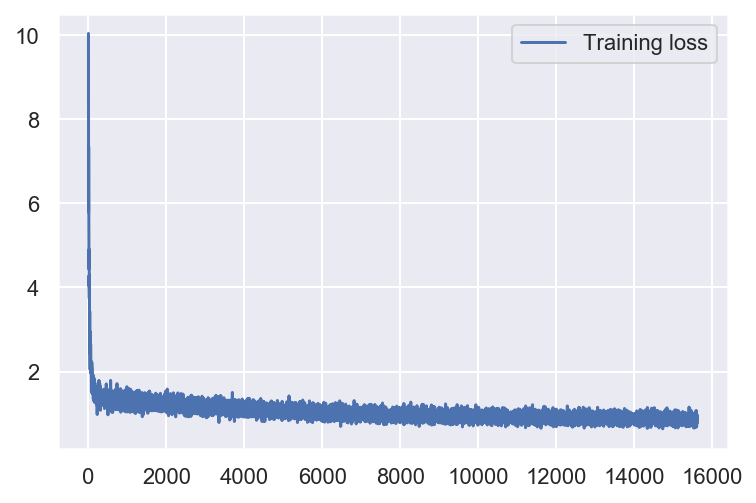

In [75]:
plt.plot(losses['train'], label='Training loss')
plt.legend()
_ = plt.ylim()

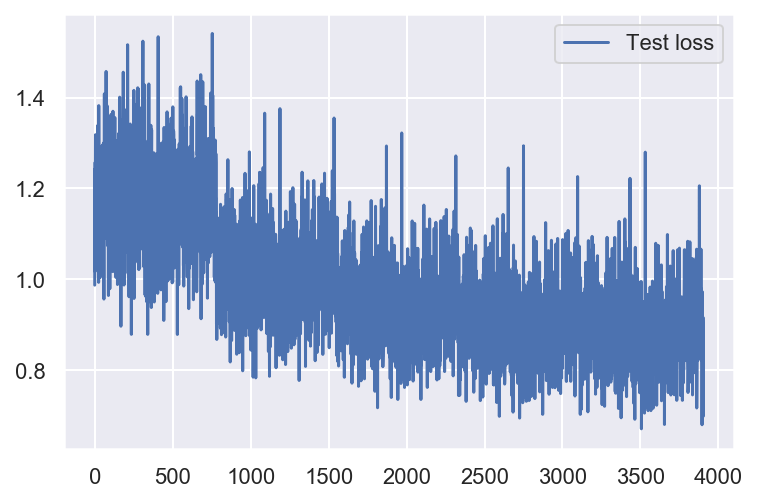

In [76]:
plt.plot(losses['test'], label='Test loss')
plt.legend()
_ = plt.ylim()

In [77]:
def get_tensors(loaded_graph):

    uid = loaded_graph.get_tensor_by_name("uid:0")
    user_gender = loaded_graph.get_tensor_by_name("user_gender:0")
    user_age = loaded_graph.get_tensor_by_name("user_age:0")
    user_job = loaded_graph.get_tensor_by_name("user_job:0")
    movie_id = loaded_graph.get_tensor_by_name("movie_id:0")
    movie_categories = loaded_graph.get_tensor_by_name("movie_categories:0")
    movie_titles = loaded_graph.get_tensor_by_name("movie_titles:0")
    targets = loaded_graph.get_tensor_by_name("targets:0")
    dropout_keep_prob = loaded_graph.get_tensor_by_name("dropout_keep_prob:0")
    lr = loaded_graph.get_tensor_by_name("LearningRate:0")
    #两种不同计算预测评分的方案使用不同的name获取tensor inference
#     inference = loaded_graph.get_tensor_by_name("inference/inference/BiasAdd:0")
    inference = loaded_graph.get_tensor_by_name("inference/ExpandDims:0") # 之前是MatMul:0 因为inference代码修改了 这里也要修改 感谢网友 @清歌 指出问题
    movie_combine_layer_flat = loaded_graph.get_tensor_by_name("movie_fc/Reshape:0")
    user_combine_layer_flat = loaded_graph.get_tensor_by_name("user_fc/Reshape:0")
    return uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob, inference, movie_combine_layer_flat, user_combine_layer_flat


In [78]:
def rating_movie(user_id_val, movie_id_val):
    loaded_graph = tf.Graph()  #
    with tf.Session(graph=loaded_graph) as sess:  #
        # Load saved model
        loader = tf.train.import_meta_graph(load_dir + '.meta')
        loader.restore(sess, load_dir)
    
        # Get Tensors from loaded model
        uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob, inference,_, __ = get_tensors(loaded_graph)  #loaded_graph
    
        categories = np.zeros([1, 18])
        categories[0] = movies.values[movieid2idx[movie_id_val]][2]
    
        titles = np.zeros([1, sentences_size])
        titles[0] = movies.values[movieid2idx[movie_id_val]][1]
    
        feed = {
              uid: np.reshape(users.values[user_id_val-1][0], [1, 1]),
              user_gender: np.reshape(users.values[user_id_val-1][1], [1, 1]),
              user_age: np.reshape(users.values[user_id_val-1][2], [1, 1]),
              user_job: np.reshape(users.values[user_id_val-1][3], [1, 1]),
              movie_id: np.reshape(movies.values[movieid2idx[movie_id_val]][0], [1, 1]),
              movie_categories: categories,  #x.take(6,1)
              movie_titles: titles,  #x.take(5,1)
              dropout_keep_prob: 1}
    
        # Get Prediction
        inference_val = sess.run([inference], feed)  
    
        return (inference_val)

In [79]:
rating_movie(234, 1401)

[array([[3.137316]], dtype=float32)]

In [80]:
loaded_graph = tf.Graph()  #
movie_matrics = []
with tf.Session(graph=loaded_graph) as sess:  #
    # Load saved model
    loader = tf.train.import_meta_graph(load_dir + '.meta')
    loader.restore(sess, load_dir)

    # Get Tensors from loaded model
    uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob, _, movie_combine_layer_flat, __ = get_tensors(loaded_graph)  #loaded_graph

    for item in movies.values:
        categories = np.zeros([1, 18])
        categories[0] = item.take(2)

        titles = np.zeros([1, sentences_size])
        titles[0] = item.take(1)

        feed = {
            movie_id: np.reshape(item.take(0), [1, 1]),
            movie_categories: categories,  #x.take(6,1)
            movie_titles: titles,  #x.take(5,1)
            dropout_keep_prob: 1}

        movie_combine_layer_flat_val = sess.run([movie_combine_layer_flat], feed)  
        movie_matrics.append(movie_combine_layer_flat_val)

pickle.dump((np.array(movie_matrics).reshape(-1, 200)), open('movie_matrics.p', 'wb'))
movie_matrics = pickle.load(open('movie_matrics.p', mode='rb'))

In [81]:
loaded_graph = tf.Graph()  #
users_matrics = []
with tf.Session(graph=loaded_graph) as sess:  #
    # Load saved model
    loader = tf.train.import_meta_graph(load_dir + '.meta')
    loader.restore(sess, load_dir)

    # Get Tensors from loaded model
    uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles, targets, lr, dropout_keep_prob, _, __,user_combine_layer_flat = get_tensors(loaded_graph)  #loaded_graph

    for item in users.values:

        feed = {
            uid: np.reshape(item.take(0), [1, 1]),
            user_gender: np.reshape(item.take(1), [1, 1]),
            user_age: np.reshape(item.take(2), [1, 1]),
            user_job: np.reshape(item.take(3), [1, 1]),
            dropout_keep_prob: 1}

        user_combine_layer_flat_val = sess.run([user_combine_layer_flat], feed)  
        users_matrics.append(user_combine_layer_flat_val)

pickle.dump((np.array(users_matrics).reshape(-1, 200)), open('users_matrics.p', 'wb'))
users_matrics = pickle.load(open('users_matrics.p', mode='rb'))

In [84]:
movies_orig = pd.read_table('./ml_1m/movies.dat', sep='::', header=None, names=movies_title, engine = 'python').values

In [85]:
def recommend_same_type_movie(movie_id_val, top_k = 20):
    
    loaded_graph = tf.Graph()  #
    with tf.Session(graph=loaded_graph) as sess:  #
        # Load saved model
        loader = tf.train.import_meta_graph(load_dir + '.meta')
        loader.restore(sess, load_dir)
        
        norm_movie_matrics = tf.sqrt(tf.reduce_sum(tf.square(movie_matrics), 1, keep_dims=True))
        normalized_movie_matrics = movie_matrics / norm_movie_matrics

        #推荐同类型的电影
        probs_embeddings = (movie_matrics[movieid2idx[movie_id_val]]).reshape([1, 200])
        probs_similarity = tf.matmul(probs_embeddings, tf.transpose(normalized_movie_matrics))
        sim = (probs_similarity.eval())
    #     results = (-sim[0]).argsort()[0:top_k]
    #     print(results)
        
        print("您看的电影是：{}".format(movies_orig[movieid2idx[movie_id_val]]))
        print("以下是给您的推荐：")
        p = np.squeeze(sim)
        p[np.argsort(p)[:-top_k]] = 0
        p = p / np.sum(p)
        results = set()
        while len(results) != 5:
            c = np.random.choice(3883, 1, p=p)[0]
            results.add(c)
        for val in (results):
            print(val)
            print(movies_orig[val])
        
        return results

In [86]:
recommend_same_type_movie(1401, 20)

您看的电影是：[1401 'Ghosts of Mississippi (1996)' 'Drama']
以下是给您的推荐：
2816
[2885 'Guinevere (1999)' 'Drama|Romance']
1380
[1401 'Ghosts of Mississippi (1996)' 'Drama']
1990
[2059 'Parent Trap, The (1998)' "Children's|Drama"]
620
[625 'Asfour Stah (1990)' 'Drama']
533
[537 'Sirens (1994)' 'Comedy|Drama']


{533, 620, 1380, 1990, 2816}

In [87]:
def recommend_your_favorite_movie(user_id_val, top_k = 10):

    loaded_graph = tf.Graph()  #
    with tf.Session(graph=loaded_graph) as sess:  #
        # Load saved model
        loader = tf.train.import_meta_graph(load_dir + '.meta')
        loader.restore(sess, load_dir)

        #推荐您喜欢的电影
        probs_embeddings = (users_matrics[user_id_val-1]).reshape([1, 200])

        probs_similarity = tf.matmul(probs_embeddings, tf.transpose(movie_matrics))
        sim = (probs_similarity.eval())
    #     print(sim.shape)
    #     results = (-sim[0]).argsort()[0:top_k]
    #     print(results)
        
    #     sim_norm = probs_norm_similarity.eval()
    #     print((-sim_norm[0]).argsort()[0:top_k])
    
        print("以下是给您的推荐：")
        p = np.squeeze(sim)
        p[np.argsort(p)[:-top_k]] = 0
        p = p / np.sum(p)
        results = set()
        while len(results) != 5:
            c = np.random.choice(3883, 1, p=p)[0]
            results.add(c)
        for val in (results):
            print(val)
            print(movies_orig[val])

        return results


In [88]:
recommend_your_favorite_movie(234, 10)

以下是给您的推荐：
847
[858 'Godfather, The (1972)' 'Action|Crime|Drama']
49
[50 'Usual Suspects, The (1995)' 'Crime|Thriller']
2836
[2905 'Sanjuro (1962)' 'Action|Adventure']
1240
[1260 'M (1931)' 'Crime|Film-Noir|Thriller']
1950
[2019
 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)'
 'Action|Drama']


{49, 847, 1240, 1950, 2836}

In [91]:
users_orig = pd.read_table('./ml_1m/users.dat', sep='::', header=None, names=users_title, engine = 'python').values

In [92]:
import random

def recommend_other_favorite_movie(movie_id_val, top_k = 20):
    loaded_graph = tf.Graph()  #
    with tf.Session(graph=loaded_graph) as sess:  #
        # Load saved model
        loader = tf.train.import_meta_graph(load_dir + '.meta')
        loader.restore(sess, load_dir)

        probs_movie_embeddings = (movie_matrics[movieid2idx[movie_id_val]]).reshape([1, 200])
        probs_user_favorite_similarity = tf.matmul(probs_movie_embeddings, tf.transpose(users_matrics))
        favorite_user_id = np.argsort(probs_user_favorite_similarity.eval())[0][-top_k:]
    #     print(normalized_users_matrics.eval().shape)
    #     print(probs_user_favorite_similarity.eval()[0][favorite_user_id])
    #     print(favorite_user_id.shape)
    
        print("您看的电影是：{}".format(movies_orig[movieid2idx[movie_id_val]]))
        
        print("喜欢看这个电影的人是：{}".format(users_orig[favorite_user_id-1]))
        probs_users_embeddings = (users_matrics[favorite_user_id-1]).reshape([-1, 200])
        probs_similarity = tf.matmul(probs_users_embeddings, tf.transpose(movie_matrics))
        sim = (probs_similarity.eval())
    #     results = (-sim[0]).argsort()[0:top_k]
    #     print(results)
    
    #     print(sim.shape)
    #     print(np.argmax(sim, 1))
        p = np.argmax(sim, 1)
        print("喜欢看这个电影的人还喜欢看：")

        results = set()
        while len(results) != 5:
            c = p[random.randrange(top_k)]
            results.add(c)
        for val in (results):
            print(val)
            print(movies_orig[val])
        
        return results

In [93]:
recommend_other_favorite_movie(1401, 20)

您看的电影是：[1401 'Ghosts of Mississippi (1996)' 'Drama']
喜欢看这个电影的人是：[[3703 'M' 18 12 '97402']
 [1763 'M' 35 7 '76248']
 [5254 'M' 18 4 '32606']
 [493 'M' 50 7 '55016']
 [3485 'M' 25 0 '94121']
 [74 'M' 35 14 '94530']
 [5513 'M' 35 1 '91768']
 [3764 'M' 25 1 '06111']
 [3285 'M' 25 4 '44706']
 [100 'M' 35 17 '95401']
 [3031 'M' 18 4 '48135']
 [2338 'M' 45 17 '13152']
 [4571 'M' 35 7 '21013']
 [3603 'F' 35 7 '78704']
 [212 'M' 25 16 '53714']
 [4800 'M' 18 4 '80521']
 [4085 'F' 25 6 '79416']
 [2002 'F' 56 13 '02136-1522']
 [5458 'F' 18 2 '98102']
 [2154 'M' 25 12 '68508']]
喜欢看这个电影的人还喜欢看：
2131
[2200 'Under Capricorn (1949)' 'Drama']
2836
[2905 'Sanjuro (1962)' 'Action|Adventure']
1176
[1193 "One Flew Over the Cuckoo's Nest (1975)" 'Drama']
1950
[2019
 'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)'
 'Action|Drama']
735
[745 'Close Shave, A (1995)' 'Animation|Comedy|Thriller']


{735, 1176, 1950, 2131, 2836}

# tf_keras构建神经网络

In [27]:
def get_inputs():
    uid = tf.keras.layers.Input(shape=(1,), dtype='int32', name='uid')  
    user_gender = tf.keras.layers.Input(shape=(1,), dtype='int32', name='user_gender')  
    user_age = tf.keras.layers.Input(shape=(1,), dtype='int32', name='user_age') 
    user_job = tf.keras.layers.Input(shape=(1,), dtype='int32', name='user_job')

    movie_id = tf.keras.layers.Input(shape=(1,), dtype='int32', name='movie_id') 
    movie_categories = tf.keras.layers.Input(shape=(1, 18,), name='movie_categories') 
#     movie_categories = tf.keras.layers.Input(shape=(1, 18,), dtype='int32', name='movie_categories') 
    movie_titles = tf.keras.layers.Input(shape=(18,), dtype='int32', name='movie_titles') 
    return uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles

## user

In [28]:
def get_user_embedding(uid, user_gender, user_age, user_job):
    uid_embed_layer = tf.keras.layers.Embedding(uid_max, embed_dim, input_length=1, name='uid_embed_layer')(uid)
    gender_embed_layer = tf.keras.layers.Embedding(gender_max, embed_dim // 2, input_length=1, name='gender_embed_layer')(user_gender)
    age_embed_layer = tf.keras.layers.Embedding(age_max, embed_dim // 2, input_length=1, name='age_embed_layer')(user_age)
    job_embed_layer = tf.keras.layers.Embedding(job_max, embed_dim // 2, input_length=1, name='job_embed_layer')(user_job)
    return uid_embed_layer, gender_embed_layer, age_embed_layer, job_embed_layer

In [29]:
def get_user_feature_layer(uid_embed_layer, gender_embed_layer, age_embed_layer, job_embed_layer):
    #第一层全连接
    uid_fc_layer = tf.keras.layers.Dense(embed_dim, name="uid_fc_layer", activation='relu')(uid_embed_layer)
    gender_fc_layer = tf.keras.layers.Dense(embed_dim, name="gender_fc_layer", activation='relu')(gender_embed_layer)
    age_fc_layer = tf.keras.layers.Dense(embed_dim, name="age_fc_layer", activation='relu')(age_embed_layer)
    job_fc_layer = tf.keras.layers.Dense(embed_dim, name="job_fc_layer", activation='relu')(job_embed_layer)

    #第二层全连接
    user_combine_layer = tf.keras.layers.concatenate([uid_fc_layer, gender_fc_layer, age_fc_layer, job_fc_layer], 2)  #(?, 1, 128)
    user_combine_layer = tf.keras.layers.Dense(200, activation='tanh')(user_combine_layer)  #(?, 1, 200)

    user_combine_layer_flat = tf.keras.layers.Reshape([200], name="user_combine_layer_flat")(user_combine_layer)
    return user_combine_layer, user_combine_layer_flat

## movie

In [30]:
def get_movie_id_embed_layer(movie_id):
    movie_id_embed_layer = tf.keras.layers.Embedding(movie_id_max, embed_dim, input_length=1, name='movie_id_embed_layer')(movie_id)
    return movie_id_embed_layer

In [31]:
def get_movie_cnn_layer(movie_titles):
    #从嵌入矩阵中得到电影名对应的各个单词的嵌入向量
    movie_title_embed_layer = tf.keras.layers.Embedding(movie_title_max, embed_dim, input_length=18, name='movie_title_embed_layer')(movie_titles)
    sp=movie_title_embed_layer.shape
    movie_title_embed_layer_expand = tf.keras.layers.Reshape([sp[1], sp[2], 1])(movie_title_embed_layer)
    #对文本嵌入层使用不同尺寸的卷积核做卷积和最大池化
    pool_layer_lst = []
    for window_size in window_sizes:
        conv_layer = tf.keras.layers.Conv2D(filter_num, (window_size, embed_dim), 1, activation='relu')(movie_title_embed_layer_expand)
        maxpool_layer = tf.keras.layers.MaxPooling2D(pool_size=(sentences_size - window_size + 1 ,1), strides=1)(conv_layer)
        pool_layer_lst.append(maxpool_layer)
    #Dropout层
    pool_layer = tf.keras.layers.concatenate(pool_layer_lst, 3, name ="pool_layer")  
    max_num = len(window_sizes) * filter_num
    pool_layer_flat = tf.keras.layers.Reshape([1, max_num], name = "pool_layer_flat")(pool_layer)

    dropout_layer = tf.keras.layers.Dropout(dropout_keep, name = "dropout_layer")(pool_layer_flat)
    return pool_layer_flat, dropout_layer

In [32]:
def get_movie_feature_layer(movie_id_embed_layer, movie_categories_embed_layer, dropout_layer):
    #第一层全连接
    movie_id_fc_layer = tf.keras.layers.Dense(embed_dim, name="movie_id_fc_layer", activation='relu')(movie_id_embed_layer)
    movie_categories_fc_layer = tf.keras.layers.Dense(embed_dim, name="movie_categories_fc_layer", activation='relu')(movie_categories_embed_layer)

    #第二层全连接
    movie_combine_layer = tf.keras.layers.concatenate([movie_id_fc_layer, movie_categories_fc_layer, dropout_layer], 2)  
    movie_combine_layer = tf.keras.layers.Dense(200, activation='tanh')(movie_combine_layer)

    movie_combine_layer_flat = tf.keras.layers.Reshape([200], name="movie_combine_layer_flat")(movie_combine_layer)
    return movie_combine_layer, movie_combine_layer_flat

In [33]:
# 获取输入占位符
uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles = get_inputs()
# 获取User的4个嵌入向量
uid_embed_layer, gender_embed_layer, age_embed_layer, job_embed_layer = get_user_embedding(uid, user_gender,
                                                                                           user_age, user_job)
# 得到用户特征
user_combine_layer, user_combine_layer_flat = get_user_feature_layer(uid_embed_layer, gender_embed_layer,
                                                                     age_embed_layer, job_embed_layer)

In [34]:
# 获取电影ID的嵌入向量
movie_id_embed_layer = get_movie_id_embed_layer(movie_id)
# 获取电影类型的嵌入向量
# movie_categories_embed_layer = get_movie_categories_layers(movie_categories)
# 获取电影名的特征向量
pool_layer_flat, dropout_layer = get_movie_cnn_layer(movie_titles)
# 得到电影特征
movie_combine_layer, movie_combine_layer_flat = get_movie_feature_layer(movie_id_embed_layer,
#                                                                         movie_categories_embed_layer,
                                                                        movie_categories,
                                                                        dropout_layer)

In [35]:

# 计算出评分
# 将用户特征和电影特征做矩阵乘法得到一个预测评分的方案
inference = tf.keras.layers.Lambda(lambda layer: 
    tf.reduce_sum(layer[0] * layer[1], axis=1), name="inference")((user_combine_layer_flat, movie_combine_layer_flat))
inference = tf.keras.layers.Lambda(lambda layer: tf.expand_dims(layer, axis=1))(inference)

# 将用户特征和电影特征作为输入，经过全连接，输出一个值的方案
#         inference_layer = tf.keras.layers.concatenate([user_combine_layer_flat, movie_combine_layer_flat],
#                                                       1)  # (?, 400)
# 你可以使用下面这个全连接层，试试效果
#inference_dense = tf.keras.layers.Dense(64, kernel_regularizer=tf.nn.l2_loss, activation='relu')(
#    inference_layer)
#         inference = tf.keras.layers.Dense(1, name="inference")(inference_layer)  # inference_dense

model = tf.keras.Model(
    inputs=[uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles],
    outputs=[inference])

In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
movie_titles (InputLayer)       [(None, 18)]         0                                            
__________________________________________________________________________________________________
movie_title_embed_layer (Embedd (None, 18, 32)       164096      movie_titles[0][0]               
__________________________________________________________________________________________________
reshape (Reshape)               (None, 18, 32, 1)    0           movie_title_embed_layer[0][0]    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 17, 1, 8)     520         reshape[0][0]                    
______________________________________________________________________________________________

In [37]:
import tensorflow as tf
import datetime
from tensorflow import keras
from tensorflow.python.ops import summary_ops_v2
import time

MODEL_DIR = "./models"


class mv_network(object):
    def __init__(self, batch_size=256):
        self.batch_size = batch_size
        self.best_loss = 9999
        self.losses = {'train': [], 'test': []}

        # 获取输入占位符
        uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles = get_inputs()
        # 获取User的4个嵌入向量
        uid_embed_layer, gender_embed_layer, age_embed_layer, job_embed_layer = get_user_embedding(uid, user_gender,
                                                                                                   user_age, user_job)
        # 得到用户特征
        user_combine_layer, user_combine_layer_flat = get_user_feature_layer(uid_embed_layer, gender_embed_layer,
                                                                             age_embed_layer, job_embed_layer)
        # 获取电影ID的嵌入向量
        movie_id_embed_layer = get_movie_id_embed_layer(movie_id)
        # 获取电影类型的嵌入向量
#         movie_categories_embed_layer = get_movie_categories_layers(movie_categories)
        # 获取电影名的特征向量
        pool_layer_flat, dropout_layer = get_movie_cnn_layer(movie_titles)
        # 得到电影特征
        movie_combine_layer, movie_combine_layer_flat = get_movie_feature_layer(movie_id_embed_layer,
#                                                                                 movie_categories_embed_layer,
                                                                                movie_categories,
                                                                                dropout_layer)
        # 计算出评分
        # 将用户特征和电影特征做矩阵乘法得到一个预测评分的方案
        inference = tf.keras.layers.Lambda(lambda layer: 
            tf.reduce_sum(layer[0] * layer[1], axis=1), name="inference")((user_combine_layer_flat, movie_combine_layer_flat))
        inference = tf.keras.layers.Lambda(lambda layer: tf.expand_dims(layer, axis=1))(inference)
        
        # 将用户特征和电影特征作为输入，经过全连接，输出一个值的方案
#         inference_layer = tf.keras.layers.concatenate([user_combine_layer_flat, movie_combine_layer_flat],
#                                                       1)  # (?, 400)
        # 你可以使用下面这个全连接层，试试效果
        #inference_dense = tf.keras.layers.Dense(64, kernel_regularizer=tf.nn.l2_loss, activation='relu')(
        #    inference_layer)
#         inference = tf.keras.layers.Dense(1, name="inference")(inference_layer)  # inference_dense

        self.model = tf.keras.Model(
            inputs=[uid, user_gender, user_age, user_job, movie_id, movie_categories, movie_titles],
            outputs=[inference])

        self.model.summary()

        self.optimizer = tf.keras.optimizers.Adam(learning_rate)
        # MSE损失，将计算值回归到评分
        self.ComputeLoss = tf.keras.losses.MeanSquaredError()
        self.ComputeMetrics = tf.keras.metrics.MeanAbsoluteError()

        if tf.io.gfile.exists(MODEL_DIR):
            #             print('Removing existing model dir: {}'.format(MODEL_DIR))
            #             tf.io.gfile.rmtree(MODEL_DIR)
            pass
        else:
            tf.io.gfile.makedirs(MODEL_DIR)

        train_dir = os.path.join(MODEL_DIR, 'summaries', 'train')
        test_dir = os.path.join(MODEL_DIR, 'summaries', 'eval')

        #         self.train_summary_writer = summary_ops_v2.create_file_writer(train_dir, flush_millis=10000)
        #         self.test_summary_writer = summary_ops_v2.create_file_writer(test_dir, flush_millis=10000, name='test')

        checkpoint_dir = os.path.join(MODEL_DIR, 'checkpoints')
        self.checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
        self.checkpoint = tf.train.Checkpoint(model=self.model, optimizer=self.optimizer)

        # Restore variables on creation if a checkpoint exists.
        self.checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

    def compute_loss(self, labels, logits):
        return tf.reduce_mean(tf.keras.losses.mse(labels, logits))

    def compute_metrics(self, labels, logits):
        return tf.keras.metrics.mae(labels, logits)  #

    @tf.function
    def train_step(self, x, y):
        # Record the operations used to compute the loss, so that the gradient
        # of the loss with respect to the variables can be computed.
        #         metrics = 0
        with tf.GradientTape() as tape:
            logits = self.model([x[0],
                                 x[1],
                                 x[2],
                                 x[3],
                                 x[4],
                                 x[5],
                                 x[6]], training=True)
            loss = self.ComputeLoss(y, logits)
            # loss = self.compute_loss(labels, logits)
            self.ComputeMetrics(y, logits)
            # metrics = self.compute_metrics(labels, logits)
        grads = tape.gradient(loss, self.model.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        return loss, logits

    def training(self, features, targets_values, epochs=5, log_freq=50):

        for epoch_i in range(epochs):
            # 将数据集分成训练集和测试集，随机种子不固定
            train_X, test_X, train_y, test_y = train_test_split(features,
                                                                targets_values,
                                                                test_size=0.2,
                                                                random_state=0)

            train_batches = get_batches(train_X, train_y, self.batch_size)
            batch_num = (len(train_X) // self.batch_size)

            train_start = time.time()
            #             with self.train_summary_writer.as_default():
            if True:
                start = time.time()
                # Metrics are stateful. They accumulate values and return a cumulative
                # result when you call .result(). Clear accumulated values with .reset_states()
                avg_loss = tf.keras.metrics.Mean('loss', dtype=tf.float32)
                #                 avg_mae = tf.keras.metrics.Mean('mae', dtype=tf.float32)

                # Datasets can be iterated over like any other Python iterable.
                for batch_i in range(batch_num):
                    x, y = next(train_batches)
                    categories = np.zeros([self.batch_size,1, 18])
                    for i in range(self.batch_size):
                        categories[i,0] = x.take(6, 1)[i]

                    titles = np.zeros([self.batch_size, sentences_size])
                    for i in range(self.batch_size):
                        titles[i] = x.take(5, 1)[i]

                    loss, logits = self.train_step([np.reshape(x.take(0, 1), [self.batch_size, 1]).astype(np.float32),
                                                    np.reshape(x.take(2, 1), [self.batch_size, 1]).astype(np.float32),
                                                    np.reshape(x.take(3, 1), [self.batch_size, 1]).astype(np.float32),
                                                    np.reshape(x.take(4, 1), [self.batch_size, 1]).astype(np.float32),
                                                    np.reshape(x.take(1, 1), [self.batch_size, 1]).astype(np.float32),
                                                    categories.astype(np.float32),
                                                    titles.astype(np.float32)],
                                                   np.reshape(y, [self.batch_size, 1]).astype(np.float32))
                    avg_loss(loss)
                    #                     avg_mae(metrics)
                    self.losses['train'].append(loss)

#                     if tf.equal(self.optimizer.iterations % log_freq, 0):
                        #                         summary_ops_v2.scalar('loss', avg_loss.result(), step=self.optimizer.iterations)
                        #                         summary_ops_v2.scalar('mae', self.ComputeMetrics.result(), step=self.optimizer.iterations)
                        # summary_ops_v2.scalar('mae', avg_mae.result(), step=self.optimizer.iterations)

                    rate = log_freq / (time.time() - start)
                    print('Step #{}\tEpoch {:>3} Batch {:>4}/{}   Loss: {:0.6f} mae: {:0.6f} ({} steps/sec)'.format(
                        self.optimizer.iterations.numpy(),
                        epoch_i,
                        batch_i,
                        batch_num,
                        loss, (self.ComputeMetrics.result()), rate))
                    # print('Step #{}\tLoss: {:0.6f} mae: {:0.6f} ({} steps/sec)'.format(
                    #     self.optimizer.iterations.numpy(), loss, (avg_mae.result()), rate))
                    avg_loss.reset_states()
                    self.ComputeMetrics.reset_states()
                    # avg_mae.reset_states()
                    start = time.time()

            train_end = time.time()
            print(
                '\nTrain time for epoch #{} ({} total steps): {}'.format(epoch_i + 1, self.optimizer.iterations.numpy(),
                                                                         train_end - train_start))
            #             with self.test_summary_writer.as_default():
            self.testing((test_X, test_y), self.optimizer.iterations)
            # self.checkpoint.save(self.checkpoint_prefix)
        self.export_path = os.path.join(MODEL_DIR, 'export')
        tf.saved_model.save(self.model, self.export_path)

    def testing(self, test_dataset, step_num):
        test_X, test_y = test_dataset
        test_batches = get_batches(test_X, test_y, self.batch_size)

        """Perform an evaluation of `model` on the examples from `dataset`."""
        avg_loss = tf.keras.metrics.Mean('loss', dtype=tf.float32)
        #         avg_mae = tf.keras.metrics.Mean('mae', dtype=tf.float32)

        batch_num = (len(test_X) // self.batch_size)
        for batch_i in range(batch_num):
            x, y = next(test_batches)
            categories = np.zeros([self.batch_size,1, 18])
            for i in range(self.batch_size):
                categories[i,0] = x.take(6, 1)[i]

            titles = np.zeros([self.batch_size, sentences_size])
            for i in range(self.batch_size):
                titles[i] = x.take(5, 1)[i]

            logits = self.model([np.reshape(x.take(0, 1), [self.batch_size, 1]).astype(np.float32),
                                 np.reshape(x.take(2, 1), [self.batch_size, 1]).astype(np.float32),
                                 np.reshape(x.take(3, 1), [self.batch_size, 1]).astype(np.float32),
                                 np.reshape(x.take(4, 1), [self.batch_size, 1]).astype(np.float32),
                                 np.reshape(x.take(1, 1), [self.batch_size, 1]).astype(np.float32),
                                 categories.astype(np.float32),
                                 titles.astype(np.float32)], training=False)
            test_loss = self.ComputeLoss(np.reshape(y, [self.batch_size, 1]).astype(np.float32), logits)
            avg_loss(test_loss)
            # 保存测试损失
            self.losses['test'].append(test_loss)
            self.ComputeMetrics(np.reshape(y, [self.batch_size, 1]).astype(np.float32), logits)
            # avg_loss(self.compute_loss(labels, logits))
            # avg_mae(self.compute_metrics(labels, logits))

        print('Model test set loss: {:0.6f} mae: {:0.6f}'.format(avg_loss.result(), self.ComputeMetrics.result()))
        # print('Model test set loss: {:0.6f} mae: {:0.6f}'.format(avg_loss.result(), avg_mae.result()))
        #         summary_ops_v2.scalar('loss', avg_loss.result(), step=step_num)
        #         summary_ops_v2.scalar('mae', self.ComputeMetrics.result(), step=step_num)
        # summary_ops_v2.scalar('mae', avg_mae.result(), step=step_num)

        if avg_loss.result() < self.best_loss:
            self.best_loss = avg_loss.result()
            print("best loss = {}".format(self.best_loss))
            self.checkpoint.save(self.checkpoint_prefix)

    def forward(self, xs):
        predictions = self.model(xs)
        # logits = tf.nn.softmax(predictions)

        return predictions


## get_batches

In [38]:
def get_batches(Xs, ys, batch_size):
    for start in range(0, len(Xs), batch_size):
        end = min(start + batch_size, len(Xs))
        yield Xs[start:end], ys[start:end]

In [39]:
features

array([[1, 1193, 0, ..., 10,
        list([3745, 4551, 1235, 3308, 3810, 4559, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])],
       [2, 1193, 1, ..., 16,
        list([3745, 4551, 1235, 3308, 3810, 4559, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])],
       [12, 1193, 1, ..., 12,
        list([3745, 4551, 1235, 3308, 3810, 4559, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])],
       ...,
       [5780, 2845, 1, ..., 17,
        list([4216, 2694, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127, 5127]),
        list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])],
       [5851, 3607, 0, ..., 20,
        list([3745, 3888, 4262, 5127, 5127, 5127, 5127, 

In [40]:
mv_net=mv_network()
mv_net.training(features, targets_values, epochs=5)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
movie_titles (InputLayer)       [(None, 18)]         0                                            
__________________________________________________________________________________________________
movie_title_embed_layer (Embedd (None, 18, 32)       164096      movie_titles[0][0]               
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 18, 32, 1)    0           movie_title_embed_layer[0][0]    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 17, 1, 8)     520         reshape_3[0][0]                  
____________________________________________________________________________________________

Step #1	Epoch   0 Batch    0/3125   Loss: 14.088545 mae: 3.564927 (32.52925559471951 steps/sec)
Step #2	Epoch   0 Batch    1/3125   Loss: 14.585484 mae: 3.649956 (2016.1239773502919 steps/sec)
Step #3	Epoch   0 Batch    2/3125   Loss: 13.522289 mae: 3.503155 (2414.1546466518553 steps/sec)
Step #4	Epoch   0 Batch    3/3125   Loss: 13.986399 mae: 3.559940 (2420.004846582582 steps/sec)
Step #5	Epoch   0 Batch    4/3125   Loss: 14.419783 mae: 3.631360 (2155.08056560342 steps/sec)
Step #6	Epoch   0 Batch    5/3125   Loss: 14.060732 mae: 3.577078 (2343.2389550604485 steps/sec)
Step #7	Epoch   0 Batch    6/3125   Loss: 14.502630 mae: 3.647885 (2326.859577489792 steps/sec)
Step #8	Epoch   0 Batch    7/3125   Loss: 13.912355 mae: 3.549046 (2219.748721911153 steps/sec)
Step #9	Epoch   0 Batch    8/3125   Loss: 13.273201 mae: 3.464107 (1908.757622644944 steps/sec)
Step #10	Epoch   0 Batch    9/3125   Loss: 13.883889 mae: 3.581987 (1984.9807384691105 steps/sec)
Step #11	Epoch   0 Batch   10/3125  

Step #87	Epoch   0 Batch   86/3125   Loss: 8.465082 mae: 2.655589 (1948.1750536475704 steps/sec)
Step #88	Epoch   0 Batch   87/3125   Loss: 8.619873 mae: 2.720303 (1610.728192996874 steps/sec)
Step #89	Epoch   0 Batch   88/3125   Loss: 8.661415 mae: 2.676000 (2125.1185602529285 steps/sec)
Step #90	Epoch   0 Batch   89/3125   Loss: 8.934999 mae: 2.782679 (2373.1492587982348 steps/sec)
Step #91	Epoch   0 Batch   90/3125   Loss: 8.004530 mae: 2.585940 (2291.593727804185 steps/sec)
Step #92	Epoch   0 Batch   91/3125   Loss: 8.825655 mae: 2.748163 (2037.2368638346238 steps/sec)
Step #93	Epoch   0 Batch   92/3125   Loss: 8.105722 mae: 2.601827 (1906.2245491564863 steps/sec)
Step #94	Epoch   0 Batch   93/3125   Loss: 7.905704 mae: 2.555287 (1614.3114463859595 steps/sec)
Step #95	Epoch   0 Batch   94/3125   Loss: 7.382788 mae: 2.465325 (1699.9294787098656 steps/sec)
Step #96	Epoch   0 Batch   95/3125   Loss: 7.014082 mae: 2.414817 (1598.9874575883496 steps/sec)
Step #97	Epoch   0 Batch   96/31

Step #180	Epoch   0 Batch  179/3125   Loss: 1.503624 mae: 0.988934 (1259.0970220941404 steps/sec)
Step #181	Epoch   0 Batch  180/3125   Loss: 1.426303 mae: 0.962147 (1552.8937859131568 steps/sec)
Step #182	Epoch   0 Batch  181/3125   Loss: 1.469515 mae: 0.967577 (2041.918114989533 steps/sec)
Step #183	Epoch   0 Batch  182/3125   Loss: 1.562131 mae: 1.019628 (1386.4917755328713 steps/sec)
Step #184	Epoch   0 Batch  183/3125   Loss: 1.511000 mae: 1.006464 (1816.2821312270491 steps/sec)
Step #185	Epoch   0 Batch  184/3125   Loss: 1.670805 mae: 1.048408 (1514.560975257464 steps/sec)
Step #186	Epoch   0 Batch  185/3125   Loss: 1.538125 mae: 1.002120 (1765.7104848826734 steps/sec)
Step #187	Epoch   0 Batch  186/3125   Loss: 1.334828 mae: 0.939680 (1355.309688760211 steps/sec)
Step #188	Epoch   0 Batch  187/3125   Loss: 1.540581 mae: 1.028872 (1839.1714243117858 steps/sec)
Step #189	Epoch   0 Batch  188/3125   Loss: 1.346942 mae: 0.918134 (1513.2276964816579 steps/sec)
Step #190	Epoch   0 Bat

Step #265	Epoch   0 Batch  264/3125   Loss: 1.299898 mae: 0.943469 (1878.9664193814285 steps/sec)
Step #266	Epoch   0 Batch  265/3125   Loss: 1.274347 mae: 0.919950 (1698.3050572944082 steps/sec)
Step #267	Epoch   0 Batch  266/3125   Loss: 1.302611 mae: 0.923597 (2214.147556906964 steps/sec)
Step #268	Epoch   0 Batch  267/3125   Loss: 1.363627 mae: 0.934879 (2139.863679033509 steps/sec)
Step #269	Epoch   0 Batch  268/3125   Loss: 1.313970 mae: 0.920167 (2217.776884762217 steps/sec)
Step #270	Epoch   0 Batch  269/3125   Loss: 1.581587 mae: 1.026004 (2170.515421237839 steps/sec)
Step #271	Epoch   0 Batch  270/3125   Loss: 1.309765 mae: 0.925540 (2004.1781744856125 steps/sec)
Step #272	Epoch   0 Batch  271/3125   Loss: 1.278610 mae: 0.920728 (2200.6023148196728 steps/sec)
Step #273	Epoch   0 Batch  272/3125   Loss: 1.409507 mae: 0.957712 (2206.413601548691 steps/sec)
Step #274	Epoch   0 Batch  273/3125   Loss: 1.171644 mae: 0.858325 (1813.031788434439 steps/sec)
Step #275	Epoch   0 Batch 

Step #352	Epoch   0 Batch  351/3125   Loss: 1.363397 mae: 0.960166 (1979.1734694840554 steps/sec)
Step #353	Epoch   0 Batch  352/3125   Loss: 1.135699 mae: 0.871050 (1694.8463272909478 steps/sec)
Step #354	Epoch   0 Batch  353/3125   Loss: 1.478090 mae: 0.979905 (1278.057639451761 steps/sec)
Step #355	Epoch   0 Batch  354/3125   Loss: 1.387046 mae: 0.950568 (1762.7421808676063 steps/sec)
Step #356	Epoch   0 Batch  355/3125   Loss: 1.170739 mae: 0.881125 (1688.1611887914867 steps/sec)
Step #357	Epoch   0 Batch  356/3125   Loss: 1.231009 mae: 0.907156 (1603.9526114922485 steps/sec)
Step #358	Epoch   0 Batch  357/3125   Loss: 1.083626 mae: 0.855973 (1627.9834496464032 steps/sec)
Step #359	Epoch   0 Batch  358/3125   Loss: 1.319636 mae: 0.947568 (1282.081504395564 steps/sec)
Step #360	Epoch   0 Batch  359/3125   Loss: 1.504743 mae: 1.002614 (1658.8111528574254 steps/sec)
Step #361	Epoch   0 Batch  360/3125   Loss: 1.217402 mae: 0.903927 (1286.3674560967681 steps/sec)
Step #362	Epoch   0 Ba

Step #441	Epoch   0 Batch  440/3125   Loss: 1.180954 mae: 0.897580 (1465.812079317262 steps/sec)
Step #442	Epoch   0 Batch  441/3125   Loss: 1.093483 mae: 0.859730 (1284.6575107506462 steps/sec)
Step #443	Epoch   0 Batch  442/3125   Loss: 1.257782 mae: 0.922138 (962.5880128152166 steps/sec)
Step #444	Epoch   0 Batch  443/3125   Loss: 1.165175 mae: 0.892591 (1587.7411344296054 steps/sec)
Step #445	Epoch   0 Batch  444/3125   Loss: 1.135682 mae: 0.856126 (1737.5632793404864 steps/sec)
Step #446	Epoch   0 Batch  445/3125   Loss: 1.169835 mae: 0.875826 (1875.8235762395013 steps/sec)
Step #447	Epoch   0 Batch  446/3125   Loss: 1.196860 mae: 0.881984 (2019.307688604304 steps/sec)
Step #448	Epoch   0 Batch  447/3125   Loss: 1.245653 mae: 0.901938 (1659.3098973786862 steps/sec)
Step #449	Epoch   0 Batch  448/3125   Loss: 1.132361 mae: 0.873890 (1907.594349491072 steps/sec)
Step #450	Epoch   0 Batch  449/3125   Loss: 1.145307 mae: 0.860823 (1639.0146304864325 steps/sec)
Step #451	Epoch   0 Batc

Step #526	Epoch   0 Batch  525/3125   Loss: 1.153660 mae: 0.859918 (1222.1664053894972 steps/sec)
Step #527	Epoch   0 Batch  526/3125   Loss: 1.041186 mae: 0.859695 (1254.5401250261718 steps/sec)
Step #528	Epoch   0 Batch  527/3125   Loss: 1.139061 mae: 0.859933 (1120.0700727431984 steps/sec)
Step #529	Epoch   0 Batch  528/3125   Loss: 0.976172 mae: 0.800691 (1595.4475602148411 steps/sec)
Step #530	Epoch   0 Batch  529/3125   Loss: 1.106745 mae: 0.849870 (1703.8103439871309 steps/sec)
Step #531	Epoch   0 Batch  530/3125   Loss: 1.044750 mae: 0.836176 (1992.505605594193 steps/sec)
Step #532	Epoch   0 Batch  531/3125   Loss: 1.201076 mae: 0.869775 (2004.9637660375915 steps/sec)
Step #533	Epoch   0 Batch  532/3125   Loss: 1.038772 mae: 0.809601 (1953.2738483318742 steps/sec)
Step #534	Epoch   0 Batch  533/3125   Loss: 1.001461 mae: 0.805115 (1947.957904123204 steps/sec)
Step #535	Epoch   0 Batch  534/3125   Loss: 1.062507 mae: 0.836607 (1750.6903748226061 steps/sec)
Step #536	Epoch   0 Ba

Step #611	Epoch   0 Batch  610/3125   Loss: 1.013023 mae: 0.785740 (1804.2810929864409 steps/sec)
Step #612	Epoch   0 Batch  611/3125   Loss: 1.005775 mae: 0.823190 (1399.1460290350128 steps/sec)
Step #613	Epoch   0 Batch  612/3125   Loss: 1.049211 mae: 0.803157 (2089.962528900582 steps/sec)
Step #614	Epoch   0 Batch  613/3125   Loss: 1.180486 mae: 0.860000 (2073.370441041257 steps/sec)
Step #615	Epoch   0 Batch  614/3125   Loss: 1.043032 mae: 0.827593 (2160.7871825253724 steps/sec)
Step #616	Epoch   0 Batch  615/3125   Loss: 0.983611 mae: 0.810525 (2428.355391901437 steps/sec)
Step #617	Epoch   0 Batch  616/3125   Loss: 1.007894 mae: 0.811371 (2041.8187128809268 steps/sec)
Step #618	Epoch   0 Batch  617/3125   Loss: 1.188844 mae: 0.862799 (2185.762824922352 steps/sec)
Step #619	Epoch   0 Batch  618/3125   Loss: 1.052307 mae: 0.843029 (2308.291415803551 steps/sec)
Step #620	Epoch   0 Batch  619/3125   Loss: 1.001114 mae: 0.775604 (1627.6675669802241 steps/sec)
Step #621	Epoch   0 Batch

Step #696	Epoch   0 Batch  695/3125   Loss: 0.939005 mae: 0.784714 (2061.9544377476477 steps/sec)
Step #697	Epoch   0 Batch  696/3125   Loss: 0.996801 mae: 0.807703 (1789.9439242764354 steps/sec)
Step #698	Epoch   0 Batch  697/3125   Loss: 1.140513 mae: 0.848827 (2290.2173200829966 steps/sec)
Step #699	Epoch   0 Batch  698/3125   Loss: 1.104659 mae: 0.838269 (2265.525883674704 steps/sec)
Step #700	Epoch   0 Batch  699/3125   Loss: 0.869350 mae: 0.743797 (2236.9621333333334 steps/sec)
Step #701	Epoch   0 Batch  700/3125   Loss: 1.009218 mae: 0.791456 (2218.950175111892 steps/sec)
Step #702	Epoch   0 Batch  701/3125   Loss: 1.052109 mae: 0.801837 (2217.776884762217 steps/sec)
Step #703	Epoch   0 Batch  702/3125   Loss: 0.991733 mae: 0.817984 (2291.8942548331747 steps/sec)
Step #704	Epoch   0 Batch  703/3125   Loss: 1.014192 mae: 0.799680 (2352.17479082079 steps/sec)
Step #705	Epoch   0 Batch  704/3125   Loss: 1.000412 mae: 0.780637 (1929.1606873459175 steps/sec)
Step #706	Epoch   0 Batch

Step #782	Epoch   0 Batch  781/3125   Loss: 0.966577 mae: 0.781492 (1729.7382898524427 steps/sec)
Step #783	Epoch   0 Batch  782/3125   Loss: 1.102844 mae: 0.855419 (1642.6349181483513 steps/sec)
Step #784	Epoch   0 Batch  783/3125   Loss: 0.837560 mae: 0.716899 (1918.3607757043542 steps/sec)
Step #785	Epoch   0 Batch  784/3125   Loss: 1.074556 mae: 0.827344 (1891.2002885742627 steps/sec)
Step #786	Epoch   0 Batch  785/3125   Loss: 1.132222 mae: 0.834034 (1768.0327108713063 steps/sec)
Step #787	Epoch   0 Batch  786/3125   Loss: 1.151277 mae: 0.862771 (1792.8206881812353 steps/sec)
Step #788	Epoch   0 Batch  787/3125   Loss: 1.042311 mae: 0.818331 (1978.0907195879984 steps/sec)
Step #789	Epoch   0 Batch  788/3125   Loss: 0.862526 mae: 0.749239 (2114.1710771712283 steps/sec)
Step #790	Epoch   0 Batch  789/3125   Loss: 0.948266 mae: 0.783833 (1765.101168232165 steps/sec)
Step #791	Epoch   0 Batch  790/3125   Loss: 0.911089 mae: 0.776283 (2206.25111777392 steps/sec)
Step #792	Epoch   0 Bat

Step #872	Epoch   0 Batch  871/3125   Loss: 0.844607 mae: 0.720518 (1624.8553077083996 steps/sec)
Step #873	Epoch   0 Batch  872/3125   Loss: 0.875419 mae: 0.741235 (1656.936982491625 steps/sec)
Step #874	Epoch   0 Batch  873/3125   Loss: 1.032327 mae: 0.817373 (2046.680850233248 steps/sec)
Step #875	Epoch   0 Batch  874/3125   Loss: 0.950161 mae: 0.781221 (2189.139648009353 steps/sec)
Step #876	Epoch   0 Batch  875/3125   Loss: 1.042726 mae: 0.840101 (2153.221898229907 steps/sec)
Step #877	Epoch   0 Batch  876/3125   Loss: 1.044082 mae: 0.830233 (2212.208989546303 steps/sec)
Step #878	Epoch   0 Batch  877/3125   Loss: 0.908109 mae: 0.745369 (2170.4255671468786 steps/sec)
Step #879	Epoch   0 Batch  878/3125   Loss: 1.034642 mae: 0.799999 (2187.5868399641167 steps/sec)
Step #880	Epoch   0 Batch  879/3125   Loss: 0.865114 mae: 0.751906 (2069.27881437043 steps/sec)
Step #881	Epoch   0 Batch  880/3125   Loss: 0.852205 mae: 0.750464 (1759.3261858022515 steps/sec)
Step #882	Epoch   0 Batch  

Step #964	Epoch   0 Batch  963/3125   Loss: 0.819464 mae: 0.705232 (2216.886013594224 steps/sec)
Step #965	Epoch   0 Batch  964/3125   Loss: 0.854364 mae: 0.739061 (2200.6023148196728 steps/sec)
Step #966	Epoch   0 Batch  965/3125   Loss: 0.845319 mae: 0.746632 (2182.7371225762136 steps/sec)
Step #967	Epoch   0 Batch  966/3125   Loss: 0.911118 mae: 0.780570 (1990.444282039844 steps/sec)
Step #968	Epoch   0 Batch  967/3125   Loss: 0.913390 mae: 0.764071 (2068.9317706483566 steps/sec)
Step #969	Epoch   0 Batch  968/3125   Loss: 1.055504 mae: 0.823560 (2098.012184995848 steps/sec)
Step #970	Epoch   0 Batch  969/3125   Loss: 1.013141 mae: 0.800253 (2118.271163500096 steps/sec)
Step #971	Epoch   0 Batch  970/3125   Loss: 1.020470 mae: 0.827497 (2172.2015640374952 steps/sec)
Step #972	Epoch   0 Batch  971/3125   Loss: 0.948822 mae: 0.775772 (2272.104008667389 steps/sec)
Step #973	Epoch   0 Batch  972/3125   Loss: 0.863118 mae: 0.770704 (1839.0423992633841 steps/sec)
Step #974	Epoch   0 Batch

Step #1055	Epoch   0 Batch 1054/3125   Loss: 0.873845 mae: 0.754963 (1494.7626514611547 steps/sec)
Step #1056	Epoch   0 Batch 1055/3125   Loss: 0.997998 mae: 0.800881 (1332.4387516519264 steps/sec)
Step #1057	Epoch   0 Batch 1056/3125   Loss: 1.072033 mae: 0.842094 (1369.863872703995 steps/sec)
Step #1058	Epoch   0 Batch 1057/3125   Loss: 0.923565 mae: 0.748715 (1410.7036189963676 steps/sec)
Step #1059	Epoch   0 Batch 1058/3125   Loss: 0.920962 mae: 0.768561 (1538.889174255377 steps/sec)
Step #1060	Epoch   0 Batch 1059/3125   Loss: 0.851310 mae: 0.742140 (1738.6436743491959 steps/sec)
Step #1061	Epoch   0 Batch 1060/3125   Loss: 0.993146 mae: 0.793070 (1741.0686414505362 steps/sec)
Step #1062	Epoch   0 Batch 1061/3125   Loss: 0.903898 mae: 0.745141 (1260.8077723135377 steps/sec)
Step #1063	Epoch   0 Batch 1062/3125   Loss: 0.835746 mae: 0.717246 (1849.6502941409935 steps/sec)
Step #1064	Epoch   0 Batch 1063/3125   Loss: 0.801421 mae: 0.716420 (1834.2490794433802 steps/sec)
Step #1065	E

Step #1142	Epoch   0 Batch 1141/3125   Loss: 1.036870 mae: 0.801816 (2014.7294194502888 steps/sec)
Step #1143	Epoch   0 Batch 1142/3125   Loss: 0.714313 mae: 0.648402 (2172.5841206696505 steps/sec)
Step #1144	Epoch   0 Batch 1143/3125   Loss: 1.079158 mae: 0.834553 (2165.6515588050024 steps/sec)
Step #1145	Epoch   0 Batch 1144/3125   Loss: 0.973586 mae: 0.792254 (2062.339705766659 steps/sec)
Step #1146	Epoch   0 Batch 1145/3125   Loss: 0.924573 mae: 0.762435 (1962.7249670095182 steps/sec)
Step #1147	Epoch   0 Batch 1146/3125   Loss: 1.022725 mae: 0.809762 (2012.544624006756 steps/sec)
Step #1148	Epoch   0 Batch 1147/3125   Loss: 1.055092 mae: 0.781465 (2288.842564802183 steps/sec)
Step #1149	Epoch   0 Batch 1148/3125   Loss: 1.087893 mae: 0.841514 (2100.2393518472154 steps/sec)
Step #1150	Epoch   0 Batch 1149/3125   Loss: 0.833336 mae: 0.722017 (1158.4491054018372 steps/sec)
Step #1151	Epoch   0 Batch 1150/3125   Loss: 0.888833 mae: 0.768888 (1648.3674720575982 steps/sec)
Step #1152	Ep

Step #1232	Epoch   0 Batch 1231/3125   Loss: 0.902021 mae: 0.753391 (1911.4542223032402 steps/sec)
Step #1233	Epoch   0 Batch 1232/3125   Loss: 0.881732 mae: 0.734754 (1709.630136874628 steps/sec)
Step #1234	Epoch   0 Batch 1233/3125   Loss: 0.853825 mae: 0.737427 (1612.0777922976401 steps/sec)
Step #1235	Epoch   0 Batch 1234/3125   Loss: 0.933200 mae: 0.755911 (1546.8802785215346 steps/sec)
Step #1236	Epoch   0 Batch 1235/3125   Loss: 0.970884 mae: 0.783736 (1693.3136319227447 steps/sec)
Step #1237	Epoch   0 Batch 1236/3125   Loss: 0.856953 mae: 0.750463 (1587.2484389782403 steps/sec)
Step #1238	Epoch   0 Batch 1237/3125   Loss: 1.047857 mae: 0.828071 (1730.4519312490202 steps/sec)
Step #1239	Epoch   0 Batch 1238/3125   Loss: 0.988951 mae: 0.777826 (1762.9199976462478 steps/sec)
Step #1240	Epoch   0 Batch 1239/3125   Loss: 0.957294 mae: 0.794252 (1674.8810018209117 steps/sec)
Step #1241	Epoch   0 Batch 1240/3125   Loss: 0.839714 mae: 0.715316 (2197.6275307037768 steps/sec)
Step #1242	

Step #1322	Epoch   0 Batch 1321/3125   Loss: 0.934776 mae: 0.787773 (1722.7048695537885 steps/sec)
Step #1323	Epoch   0 Batch 1322/3125   Loss: 0.754179 mae: 0.688207 (1976.8227963840998 steps/sec)
Step #1324	Epoch   0 Batch 1323/3125   Loss: 0.895572 mae: 0.741789 (2268.8101780730035 steps/sec)
Step #1325	Epoch   0 Batch 1324/3125   Loss: 0.883686 mae: 0.756378 (2163.6406780360476 steps/sec)
Step #1326	Epoch   0 Batch 1325/3125   Loss: 0.829276 mae: 0.718941 (2174.093156819855 steps/sec)
Step #1327	Epoch   0 Batch 1326/3125   Loss: 0.867073 mae: 0.732002 (2142.1368743615935 steps/sec)
Step #1328	Epoch   0 Batch 1327/3125   Loss: 0.740174 mae: 0.691859 (2426.5009777037267 steps/sec)
Step #1329	Epoch   0 Batch 1328/3125   Loss: 0.946857 mae: 0.768937 (2128.375265139598 steps/sec)
Step #1330	Epoch   0 Batch 1329/3125   Loss: 0.854282 mae: 0.765610 (2281.0254625349417 steps/sec)
Step #1331	Epoch   0 Batch 1330/3125   Loss: 1.007675 mae: 0.797194 (2014.4197796497833 steps/sec)
Step #1332	E

Step #1413	Epoch   0 Batch 1412/3125   Loss: 1.022059 mae: 0.803481 (1648.484086246335 steps/sec)
Step #1414	Epoch   0 Batch 1413/3125   Loss: 0.792771 mae: 0.700662 (1785.4788175997821 steps/sec)
Step #1415	Epoch   0 Batch 1414/3125   Loss: 0.764894 mae: 0.683658 (2008.8432506992606 steps/sec)
Step #1416	Epoch   0 Batch 1415/3125   Loss: 0.897274 mae: 0.774846 (2061.609846250639 steps/sec)
Step #1417	Epoch   0 Batch 1416/3125   Loss: 0.875580 mae: 0.733167 (2103.4201921726744 steps/sec)
Step #1418	Epoch   0 Batch 1417/3125   Loss: 0.950860 mae: 0.771216 (2311.3952232423317 steps/sec)
Step #1419	Epoch   0 Batch 1418/3125   Loss: 0.976582 mae: 0.771011 (2145.3801456747688 steps/sec)
Step #1420	Epoch   0 Batch 1419/3125   Loss: 0.941752 mae: 0.748622 (2201.6650394213307 steps/sec)
Step #1421	Epoch   0 Batch 1420/3125   Loss: 0.901738 mae: 0.754482 (2283.832465750441 steps/sec)
Step #1422	Epoch   0 Batch 1421/3125   Loss: 0.834859 mae: 0.751781 (1970.5074840031195 steps/sec)
Step #1423	Ep

Step #1504	Epoch   0 Batch 1503/3125   Loss: 0.996046 mae: 0.777665 (1811.9822357393423 steps/sec)
Step #1505	Epoch   0 Batch 1504/3125   Loss: 0.964611 mae: 0.780837 (1744.2834567079765 steps/sec)
Step #1506	Epoch   0 Batch 1505/3125   Loss: 0.697690 mae: 0.654659 (1664.459189180609 steps/sec)
Step #1507	Epoch   0 Batch 1506/3125   Loss: 0.827082 mae: 0.705370 (1740.6495630016352 steps/sec)
Step #1508	Epoch   0 Batch 1507/3125   Loss: 0.909620 mae: 0.758752 (1678.1780644335258 steps/sec)
Step #1509	Epoch   0 Batch 1508/3125   Loss: 0.886740 mae: 0.743652 (1778.785051485182 steps/sec)
Step #1510	Epoch   0 Batch 1509/3125   Loss: 0.795346 mae: 0.710361 (1821.56711167473 steps/sec)
Step #1511	Epoch   0 Batch 1510/3125   Loss: 0.970387 mae: 0.773569 (2101.818036040009 steps/sec)
Step #1512	Epoch   0 Batch 1511/3125   Loss: 0.930166 mae: 0.774538 (1979.565791957712 steps/sec)
Step #1513	Epoch   0 Batch 1512/3125   Loss: 0.929405 mae: 0.753377 (2041.3218474716505 steps/sec)
Step #1514	Epoch

Step #1592	Epoch   0 Batch 1591/3125   Loss: 0.806581 mae: 0.722978 (1949.1528259273373 steps/sec)
Step #1593	Epoch   0 Batch 1592/3125   Loss: 0.795630 mae: 0.697685 (1933.696624344186 steps/sec)
Step #1594	Epoch   0 Batch 1593/3125   Loss: 0.928174 mae: 0.766168 (2017.3652060987927 steps/sec)
Step #1595	Epoch   0 Batch 1594/3125   Loss: 0.754958 mae: 0.697741 (2039.6343123905856 steps/sec)
Step #1596	Epoch   0 Batch 1595/3125   Loss: 0.955735 mae: 0.783831 (2063.983780645034 steps/sec)
Step #1597	Epoch   0 Batch 1596/3125   Loss: 0.990487 mae: 0.773350 (1750.6319181261165 steps/sec)
Step #1598	Epoch   0 Batch 1597/3125   Loss: 0.733394 mae: 0.696123 (2044.4860396194042 steps/sec)
Step #1599	Epoch   0 Batch 1598/3125   Loss: 0.920403 mae: 0.762092 (1806.4880696011714 steps/sec)
Step #1600	Epoch   0 Batch 1599/3125   Loss: 0.856506 mae: 0.726050 (1590.0765789673212 steps/sec)
Step #1601	Epoch   0 Batch 1600/3125   Loss: 0.810603 mae: 0.713485 (1745.9970694018916 steps/sec)
Step #1602	E

Step #1679	Epoch   0 Batch 1678/3125   Loss: 0.925125 mae: 0.748835 (1613.6779495387077 steps/sec)
Step #1680	Epoch   0 Batch 1679/3125   Loss: 0.893032 mae: 0.717703 (1714.508085482104 steps/sec)
Step #1681	Epoch   0 Batch 1680/3125   Loss: 0.855872 mae: 0.724006 (1822.4852482380443 steps/sec)
Step #1682	Epoch   0 Batch 1681/3125   Loss: 0.929854 mae: 0.767859 (1845.9220139072265 steps/sec)
Step #1683	Epoch   0 Batch 1682/3125   Loss: 0.943493 mae: 0.783927 (1847.2064898573958 steps/sec)
Step #1684	Epoch   0 Batch 1683/3125   Loss: 0.790700 mae: 0.714248 (1878.6297835746022 steps/sec)
Step #1685	Epoch   0 Batch 1684/3125   Loss: 0.682967 mae: 0.662140 (1783.8537635140308 steps/sec)
Step #1686	Epoch   0 Batch 1685/3125   Loss: 0.962828 mae: 0.780687 (1801.2746293783175 steps/sec)
Step #1687	Epoch   0 Batch 1686/3125   Loss: 0.726891 mae: 0.675239 (1566.757562400544 steps/sec)
Step #1688	Epoch   0 Batch 1687/3125   Loss: 0.983930 mae: 0.778173 (2017.7922315337767 steps/sec)
Step #1689	E

Step #1767	Epoch   0 Batch 1766/3125   Loss: 0.839022 mae: 0.762567 (1699.984598299328 steps/sec)
Step #1768	Epoch   0 Batch 1767/3125   Loss: 0.762001 mae: 0.695169 (1883.810464855154 steps/sec)
Step #1769	Epoch   0 Batch 1768/3125   Loss: 0.837673 mae: 0.713148 (1533.3196853157078 steps/sec)
Step #1770	Epoch   0 Batch 1769/3125   Loss: 0.928194 mae: 0.755583 (1618.4225960796418 steps/sec)
Step #1771	Epoch   0 Batch 1770/3125   Loss: 0.997715 mae: 0.779854 (1980.8933682192144 steps/sec)
Step #1772	Epoch   0 Batch 1771/3125   Loss: 0.899838 mae: 0.759181 (2117.9502716677775 steps/sec)
Step #1773	Epoch   0 Batch 1772/3125   Loss: 0.956371 mae: 0.771887 (1777.2022745184445 steps/sec)
Step #1774	Epoch   0 Batch 1773/3125   Loss: 0.764408 mae: 0.687640 (2049.601250977326 steps/sec)
Step #1775	Epoch   0 Batch 1774/3125   Loss: 0.784529 mae: 0.688021 (1653.4880787183045 steps/sec)
Step #1776	Epoch   0 Batch 1775/3125   Loss: 0.919280 mae: 0.760454 (1678.5810334891464 steps/sec)
Step #1777	Ep

Step #1851	Epoch   0 Batch 1850/3125   Loss: 0.807011 mae: 0.722036 (1837.9142018316463 steps/sec)
Step #1852	Epoch   0 Batch 1851/3125   Loss: 0.874264 mae: 0.747875 (2006.6135946111451 steps/sec)
Step #1853	Epoch   0 Batch 1852/3125   Loss: 0.959777 mae: 0.796580 (2130.840589723529 steps/sec)
Step #1854	Epoch   0 Batch 1853/3125   Loss: 0.865727 mae: 0.742832 (1974.719397363465 steps/sec)
Step #1855	Epoch   0 Batch 1854/3125   Loss: 0.953872 mae: 0.777718 (1658.1029261774681 steps/sec)
Step #1856	Epoch   0 Batch 1855/3125   Loss: 0.811270 mae: 0.702450 (1747.8160134014518 steps/sec)
Step #1857	Epoch   0 Batch 1856/3125   Loss: 0.924133 mae: 0.753933 (2037.810945273632 steps/sec)
Step #1858	Epoch   0 Batch 1857/3125   Loss: 0.929256 mae: 0.762365 (2109.78963994326 steps/sec)
Step #1859	Epoch   0 Batch 1858/3125   Loss: 0.792148 mae: 0.694171 (1518.5089713698173 steps/sec)
Step #1860	Epoch   0 Batch 1859/3125   Loss: 0.961029 mae: 0.760149 (1649.8328259108039 steps/sec)
Step #1861	Epoc

Step #1937	Epoch   0 Batch 1936/3125   Loss: 0.819418 mae: 0.719883 (1991.729744617401 steps/sec)
Step #1938	Epoch   0 Batch 1937/3125   Loss: 0.981747 mae: 0.753397 (1822.089386251477 steps/sec)
Step #1939	Epoch   0 Batch 1938/3125   Loss: 0.878883 mae: 0.739349 (2046.0817983140805 steps/sec)
Step #1940	Epoch   0 Batch 1939/3125   Loss: 0.838553 mae: 0.712932 (2121.785934701889 steps/sec)
Step #1941	Epoch   0 Batch 1940/3125   Loss: 0.759593 mae: 0.701468 (2124.322079395468 steps/sec)
Step #1942	Epoch   0 Batch 1941/3125   Loss: 0.775595 mae: 0.717669 (2018.0640691307653 steps/sec)
Step #1943	Epoch   0 Batch 1942/3125   Loss: 0.709342 mae: 0.673133 (1962.633125573212 steps/sec)
Step #1944	Epoch   0 Batch 1943/3125   Loss: 0.826654 mae: 0.719754 (1606.5821427203432 steps/sec)
Step #1945	Epoch   0 Batch 1944/3125   Loss: 0.841966 mae: 0.738207 (904.5335541667206 steps/sec)
Step #1946	Epoch   0 Batch 1945/3125   Loss: 0.880869 mae: 0.737490 (1806.3635893813846 steps/sec)
Step #1947	Epoch

Step #2022	Epoch   0 Batch 2021/3125   Loss: 0.746334 mae: 0.692427 (1613.528963707847 steps/sec)
Step #2023	Epoch   0 Batch 2022/3125   Loss: 0.958027 mae: 0.801940 (1212.4718873760587 steps/sec)
Step #2024	Epoch   0 Batch 2023/3125   Loss: 1.108956 mae: 0.829307 (905.4552205618855 steps/sec)
Step #2025	Epoch   0 Batch 2024/3125   Loss: 0.890124 mae: 0.725307 (1127.010280469258 steps/sec)
Step #2026	Epoch   0 Batch 2025/3125   Loss: 0.868307 mae: 0.758960 (1423.6607900507104 steps/sec)
Step #2027	Epoch   0 Batch 2026/3125   Loss: 0.908092 mae: 0.747776 (1331.8717888466203 steps/sec)
Step #2028	Epoch   0 Batch 2027/3125   Loss: 0.846835 mae: 0.717307 (1554.1942416719162 steps/sec)
Step #2029	Epoch   0 Batch 2028/3125   Loss: 0.838583 mae: 0.747208 (1600.3540822478117 steps/sec)
Step #2030	Epoch   0 Batch 2029/3125   Loss: 1.015727 mae: 0.814755 (1547.5080801074396 steps/sec)
Step #2031	Epoch   0 Batch 2030/3125   Loss: 0.842021 mae: 0.729186 (1623.6979227154127 steps/sec)
Step #2032	Ep

Step #2107	Epoch   0 Batch 2106/3125   Loss: 0.813439 mae: 0.703369 (1201.8958432433362 steps/sec)
Step #2108	Epoch   0 Batch 2107/3125   Loss: 0.942482 mae: 0.766988 (1414.6241433273974 steps/sec)
Step #2109	Epoch   0 Batch 2108/3125   Loss: 0.889967 mae: 0.731613 (1542.0121910868302 steps/sec)
Step #2110	Epoch   0 Batch 2109/3125   Loss: 0.794889 mae: 0.718938 (1474.4897313487404 steps/sec)
Step #2111	Epoch   0 Batch 2110/3125   Loss: 0.892319 mae: 0.736152 (1570.4886359381435 steps/sec)
Step #2112	Epoch   0 Batch 2111/3125   Loss: 0.888982 mae: 0.729246 (1624.578391652271 steps/sec)
Step #2113	Epoch   0 Batch 2112/3125   Loss: 0.920835 mae: 0.751690 (1500.7313477694609 steps/sec)
Step #2114	Epoch   0 Batch 2113/3125   Loss: 0.934153 mae: 0.756432 (1501.5479787493018 steps/sec)
Step #2115	Epoch   0 Batch 2114/3125   Loss: 0.906748 mae: 0.755816 (1698.55264969587 steps/sec)
Step #2116	Epoch   0 Batch 2115/3125   Loss: 1.005928 mae: 0.785121 (1921.9648994180452 steps/sec)
Step #2117	Ep

Step #2195	Epoch   0 Batch 2194/3125   Loss: 0.830028 mae: 0.720759 (826.4312736443884 steps/sec)
Step #2196	Epoch   0 Batch 2195/3125   Loss: 0.889965 mae: 0.741095 (805.6054087277197 steps/sec)
Step #2197	Epoch   0 Batch 2196/3125   Loss: 0.759129 mae: 0.687480 (914.9598397954687 steps/sec)
Step #2198	Epoch   0 Batch 2197/3125   Loss: 0.848017 mae: 0.702314 (1066.0106034189164 steps/sec)
Step #2199	Epoch   0 Batch 2198/3125   Loss: 0.864867 mae: 0.729857 (878.8741838419566 steps/sec)
Step #2200	Epoch   0 Batch 2199/3125   Loss: 0.758528 mae: 0.680539 (1075.5949450188741 steps/sec)
Step #2201	Epoch   0 Batch 2200/3125   Loss: 0.800961 mae: 0.705686 (1834.521851709297 steps/sec)
Step #2202	Epoch   0 Batch 2201/3125   Loss: 0.933951 mae: 0.780008 (1769.7933281011333 steps/sec)
Step #2203	Epoch   0 Batch 2202/3125   Loss: 0.924012 mae: 0.757491 (1504.9853961692752 steps/sec)
Step #2204	Epoch   0 Batch 2203/3125   Loss: 0.830035 mae: 0.732961 (1568.573950246077 steps/sec)
Step #2205	Epoch

Step #2284	Epoch   0 Batch 2283/3125   Loss: 0.781432 mae: 0.719373 (1348.6161127688033 steps/sec)
Step #2285	Epoch   0 Batch 2284/3125   Loss: 0.889657 mae: 0.767196 (1200.1075841073093 steps/sec)
Step #2286	Epoch   0 Batch 2285/3125   Loss: 0.987009 mae: 0.778735 (1612.8464638385578 steps/sec)
Step #2287	Epoch   0 Batch 2286/3125   Loss: 0.880949 mae: 0.760600 (1480.0465789195102 steps/sec)
Step #2288	Epoch   0 Batch 2287/3125   Loss: 0.801681 mae: 0.710624 (1494.6241616956377 steps/sec)
Step #2289	Epoch   0 Batch 2288/3125   Loss: 0.833258 mae: 0.708000 (1495.2635594247538 steps/sec)
Step #2290	Epoch   0 Batch 2289/3125   Loss: 1.054350 mae: 0.806572 (1309.4187651021798 steps/sec)
Step #2291	Epoch   0 Batch 2290/3125   Loss: 0.782410 mae: 0.705039 (1655.7988235758557 steps/sec)
Step #2292	Epoch   0 Batch 2291/3125   Loss: 0.697646 mae: 0.670170 (1506.6071826260622 steps/sec)
Step #2293	Epoch   0 Batch 2292/3125   Loss: 0.814534 mae: 0.739838 (1538.1893662121624 steps/sec)
Step #2294

Step #2368	Epoch   0 Batch 2367/3125   Loss: 0.917843 mae: 0.741880 (2083.6913538541025 steps/sec)
Step #2369	Epoch   0 Batch 2368/3125   Loss: 0.915830 mae: 0.762950 (1559.870280562911 steps/sec)
Step #2370	Epoch   0 Batch 2369/3125   Loss: 0.842306 mae: 0.743201 (2085.3281891674205 steps/sec)
Step #2371	Epoch   0 Batch 2370/3125   Loss: 0.838322 mae: 0.729922 (1893.8645763722072 steps/sec)
Step #2372	Epoch   0 Batch 2371/3125   Loss: 0.865791 mae: 0.733719 (2063.4963741378124 steps/sec)
Step #2373	Epoch   0 Batch 2372/3125   Loss: 0.819086 mae: 0.737967 (2074.2727713322056 steps/sec)
Step #2374	Epoch   0 Batch 2373/3125   Loss: 0.780161 mae: 0.692689 (2284.5788487515797 steps/sec)
Step #2375	Epoch   0 Batch 2374/3125   Loss: 0.815359 mae: 0.715487 (2174.769524323091 steps/sec)
Step #2376	Epoch   0 Batch 2375/3125   Loss: 0.942175 mae: 0.788487 (2112.1907984852146 steps/sec)
Step #2377	Epoch   0 Batch 2376/3125   Loss: 0.819160 mae: 0.714206 (1845.2236192621401 steps/sec)
Step #2378	E

Step #2457	Epoch   0 Batch 2456/3125   Loss: 0.790827 mae: 0.734083 (1740.2740089787314 steps/sec)
Step #2458	Epoch   0 Batch 2457/3125   Loss: 0.808490 mae: 0.702104 (1872.239829305527 steps/sec)
Step #2459	Epoch   0 Batch 2458/3125   Loss: 0.836004 mae: 0.735548 (1520.8325174951956 steps/sec)
Step #2460	Epoch   0 Batch 2459/3125   Loss: 0.788625 mae: 0.715262 (2118.827606413611 steps/sec)
Step #2461	Epoch   0 Batch 2460/3125   Loss: 0.860658 mae: 0.741944 (2211.206005778031 steps/sec)
Step #2462	Epoch   0 Batch 2461/3125   Loss: 0.737847 mae: 0.687143 (2096.8584398184253 steps/sec)
Step #2463	Epoch   0 Batch 2462/3125   Loss: 0.865846 mae: 0.740539 (2097.466619992999 steps/sec)
Step #2464	Epoch   0 Batch 2463/3125   Loss: 0.853728 mae: 0.717323 (2038.0683971661533 steps/sec)
Step #2465	Epoch   0 Batch 2464/3125   Loss: 0.853458 mae: 0.728950 (1975.4262353761233 steps/sec)
Step #2466	Epoch   0 Batch 2465/3125   Loss: 0.734031 mae: 0.698500 (1932.7342936400416 steps/sec)
Step #2467	Epo

Step #2545	Epoch   0 Batch 2544/3125   Loss: 0.931406 mae: 0.767259 (1549.3373129035595 steps/sec)
Step #2546	Epoch   0 Batch 2545/3125   Loss: 0.922309 mae: 0.774239 (1663.231526937322 steps/sec)
Step #2547	Epoch   0 Batch 2546/3125   Loss: 0.814977 mae: 0.736041 (1900.5582541869064 steps/sec)
Step #2548	Epoch   0 Batch 2547/3125   Loss: 1.058536 mae: 0.810634 (1715.7845647851948 steps/sec)
Step #2549	Epoch   0 Batch 2548/3125   Loss: 0.876620 mae: 0.741534 (1944.6343295346012 steps/sec)
Step #2550	Epoch   0 Batch 2549/3125   Loss: 0.687517 mae: 0.662765 (1728.5549437868847 steps/sec)
Step #2551	Epoch   0 Batch 2550/3125   Loss: 0.925642 mae: 0.759957 (2080.1158511788453 steps/sec)
Step #2552	Epoch   0 Batch 2551/3125   Loss: 0.820263 mae: 0.723373 (1941.4478800222182 steps/sec)
Step #2553	Epoch   0 Batch 2552/3125   Loss: 0.854823 mae: 0.724137 (1868.2535723194242 steps/sec)
Step #2554	Epoch   0 Batch 2553/3125   Loss: 0.862179 mae: 0.740839 (1841.5616575488018 steps/sec)
Step #2555	

Step #2632	Epoch   0 Batch 2631/3125   Loss: 0.658739 mae: 0.645142 (1943.8592588473018 steps/sec)
Step #2633	Epoch   0 Batch 2632/3125   Loss: 0.942674 mae: 0.759951 (1765.6510208377183 steps/sec)
Step #2634	Epoch   0 Batch 2633/3125   Loss: 0.705247 mae: 0.663721 (1693.1495789635155 steps/sec)
Step #2635	Epoch   0 Batch 2634/3125   Loss: 0.901429 mae: 0.762639 (1793.5413245758073 steps/sec)
Step #2636	Epoch   0 Batch 2635/3125   Loss: 0.807186 mae: 0.718473 (1896.9824155148708 steps/sec)
Step #2637	Epoch   0 Batch 2636/3125   Loss: 0.994572 mae: 0.774302 (2085.390398154409 steps/sec)
Step #2638	Epoch   0 Batch 2637/3125   Loss: 0.753448 mae: 0.685202 (2047.3402126267902 steps/sec)
Step #2639	Epoch   0 Batch 2638/3125   Loss: 0.875175 mae: 0.724059 (2038.6429474093516 steps/sec)
Step #2640	Epoch   0 Batch 2639/3125   Loss: 0.862398 mae: 0.746429 (1934.410079971959 steps/sec)
Step #2641	Epoch   0 Batch 2640/3125   Loss: 0.797069 mae: 0.714758 (1647.008191249578 steps/sec)
Step #2642	Ep

Step #2717	Epoch   0 Batch 2716/3125   Loss: 0.767533 mae: 0.696326 (1953.201080376269 steps/sec)
Step #2718	Epoch   0 Batch 2717/3125   Loss: 0.843505 mae: 0.735091 (1652.8364937500985 steps/sec)
Step #2719	Epoch   0 Batch 2718/3125   Loss: 0.787628 mae: 0.714999 (1979.2481855847184 steps/sec)
Step #2720	Epoch   0 Batch 2719/3125   Loss: 0.829423 mae: 0.730134 (1913.0583910310793 steps/sec)
Step #2721	Epoch   0 Batch 2720/3125   Loss: 0.730883 mae: 0.681967 (2017.1905659651418 steps/sec)
Step #2722	Epoch   0 Batch 2721/3125   Loss: 0.833535 mae: 0.733922 (2029.0568520453578 steps/sec)
Step #2723	Epoch   0 Batch 2722/3125   Loss: 0.835005 mae: 0.736306 (1728.611935377514 steps/sec)
Step #2724	Epoch   0 Batch 2723/3125   Loss: 0.794884 mae: 0.707436 (2003.4506147482255 steps/sec)
Step #2725	Epoch   0 Batch 2724/3125   Loss: 0.829961 mae: 0.730675 (1514.7797697297142 steps/sec)
Step #2726	Epoch   0 Batch 2725/3125   Loss: 0.896988 mae: 0.732193 (2029.9406645952513 steps/sec)
Step #2727	E

Step #2808	Epoch   0 Batch 2807/3125   Loss: 0.904124 mae: 0.765102 (1718.4417968173848 steps/sec)
Step #2809	Epoch   0 Batch 2808/3125   Loss: 0.935587 mae: 0.762278 (1621.78932960073 steps/sec)
Step #2810	Epoch   0 Batch 2809/3125   Loss: 0.877884 mae: 0.754719 (1884.860196111915 steps/sec)
Step #2811	Epoch   0 Batch 2810/3125   Loss: 0.827458 mae: 0.730093 (2048.0200001953144 steps/sec)
Step #2812	Epoch   0 Batch 2811/3125   Loss: 0.812463 mae: 0.705625 (1599.9511733650706 steps/sec)
Step #2813	Epoch   0 Batch 2812/3125   Loss: 0.904329 mae: 0.773345 (1532.9049989401283 steps/sec)
Step #2814	Epoch   0 Batch 2813/3125   Loss: 0.955290 mae: 0.789706 (1928.3447045625908 steps/sec)
Step #2815	Epoch   0 Batch 2814/3125   Loss: 0.839564 mae: 0.734337 (1602.0534131882907 steps/sec)
Step #2816	Epoch   0 Batch 2815/3125   Loss: 0.797642 mae: 0.694914 (1595.908924875198 steps/sec)
Step #2817	Epoch   0 Batch 2816/3125   Loss: 0.858536 mae: 0.718459 (1576.9008662175168 steps/sec)
Step #2818	Epo

Step #2899	Epoch   0 Batch 2898/3125   Loss: 0.841608 mae: 0.715312 (1923.022328183027 steps/sec)
Step #2900	Epoch   0 Batch 2899/3125   Loss: 0.880521 mae: 0.750711 (1875.2700479290363 steps/sec)
Step #2901	Epoch   0 Batch 2900/3125   Loss: 0.753913 mae: 0.698002 (2037.7317423918535 steps/sec)
Step #2902	Epoch   0 Batch 2901/3125   Loss: 0.730351 mae: 0.686967 (1947.8674394412246 steps/sec)
Step #2903	Epoch   0 Batch 2902/3125   Loss: 0.818195 mae: 0.700432 (1947.1078677139622 steps/sec)
Step #2904	Epoch   0 Batch 2903/3125   Loss: 0.732674 mae: 0.676661 (2170.627749314289 steps/sec)
Step #2905	Epoch   0 Batch 2904/3125   Loss: 0.813043 mae: 0.720382 (2028.487691638052 steps/sec)
Step #2906	Epoch   0 Batch 2905/3125   Loss: 0.944353 mae: 0.760123 (1832.3739624290083 steps/sec)
Step #2907	Epoch   0 Batch 2906/3125   Loss: 0.994179 mae: 0.785376 (2115.792128653437 steps/sec)
Step #2908	Epoch   0 Batch 2907/3125   Loss: 0.695536 mae: 0.669364 (1740.5195451904722 steps/sec)
Step #2909	Epo

Step #2989	Epoch   0 Batch 2988/3125   Loss: 0.793643 mae: 0.701611 (1558.201325526793 steps/sec)
Step #2990	Epoch   0 Batch 2989/3125   Loss: 0.858766 mae: 0.715467 (1799.2810261250054 steps/sec)
Step #2991	Epoch   0 Batch 2990/3125   Loss: 0.794838 mae: 0.699935 (1819.5757233959482 steps/sec)
Step #2992	Epoch   0 Batch 2991/3125   Loss: 0.889399 mae: 0.751345 (1889.0538300785472 steps/sec)
Step #2993	Epoch   0 Batch 2992/3125   Loss: 0.843387 mae: 0.732071 (1924.4163852591396 steps/sec)
Step #2994	Epoch   0 Batch 2993/3125   Loss: 0.697621 mae: 0.653495 (1835.8226462992952 steps/sec)
Step #2995	Epoch   0 Batch 2994/3125   Loss: 0.792882 mae: 0.695445 (2166.927051043604 steps/sec)
Step #2996	Epoch   0 Batch 2995/3125   Loss: 0.784401 mae: 0.723454 (2129.0450955310553 steps/sec)
Step #2997	Epoch   0 Batch 2996/3125   Loss: 0.813816 mae: 0.718034 (1759.828141783029 steps/sec)
Step #2998	Epoch   0 Batch 2997/3125   Loss: 1.008612 mae: 0.787882 (1769.9725703675572 steps/sec)
Step #2999	Ep

Step #3080	Epoch   0 Batch 3079/3125   Loss: 0.850570 mae: 0.721333 (1616.3768652114934 steps/sec)
Step #3081	Epoch   0 Batch 3080/3125   Loss: 0.977821 mae: 0.794020 (1736.1679581429235 steps/sec)
Step #3082	Epoch   0 Batch 3081/3125   Loss: 0.806516 mae: 0.681177 (1921.3486028401283 steps/sec)
Step #3083	Epoch   0 Batch 3082/3125   Loss: 0.812441 mae: 0.715639 (1935.7492292639702 steps/sec)
Step #3084	Epoch   0 Batch 3083/3125   Loss: 0.793207 mae: 0.728283 (1872.5908993499536 steps/sec)
Step #3085	Epoch   0 Batch 3084/3125   Loss: 0.875462 mae: 0.739542 (2052.3893874595083 steps/sec)
Step #3086	Epoch   0 Batch 3085/3125   Loss: 0.842559 mae: 0.732317 (1840.801924055966 steps/sec)
Step #3087	Epoch   0 Batch 3086/3125   Loss: 0.832776 mae: 0.716798 (1957.7229700715072 steps/sec)
Step #3088	Epoch   0 Batch 3087/3125   Loss: 0.944859 mae: 0.752851 (1696.821017371534 steps/sec)
Step #3089	Epoch   0 Batch 3088/3125   Loss: 0.681814 mae: 0.666312 (1486.266672336324 steps/sec)
Step #3090	Ep

Step #3169	Epoch   1 Batch   43/3125   Loss: 0.848150 mae: 0.724169 (1873.9964971226364 steps/sec)
Step #3170	Epoch   1 Batch   44/3125   Loss: 0.703461 mae: 0.676939 (1994.7419483706508 steps/sec)
Step #3171	Epoch   1 Batch   45/3125   Loss: 0.757609 mae: 0.676198 (2223.490744078543 steps/sec)
Step #3172	Epoch   1 Batch   46/3125   Loss: 0.858191 mae: 0.731691 (2194.2244915041433 steps/sec)
Step #3173	Epoch   1 Batch   47/3125   Loss: 0.944208 mae: 0.773454 (1979.1174361103772 steps/sec)
Step #3174	Epoch   1 Batch   48/3125   Loss: 0.996776 mae: 0.815690 (2018.238860552401 steps/sec)
Step #3175	Epoch   1 Batch   49/3125   Loss: 0.945772 mae: 0.761867 (1916.8878651603231 steps/sec)
Step #3176	Epoch   1 Batch   50/3125   Loss: 0.893599 mae: 0.741405 (2042.4152707440592 steps/sec)
Step #3177	Epoch   1 Batch   51/3125   Loss: 0.843029 mae: 0.732504 (2233.721747651407 steps/sec)
Step #3178	Epoch   1 Batch   52/3125   Loss: 0.803598 mae: 0.719921 (1860.678384157432 steps/sec)
Step #3179	Epo

Step #3259	Epoch   1 Batch  133/3125   Loss: 0.855840 mae: 0.746214 (1631.745537728949 steps/sec)
Step #3260	Epoch   1 Batch  134/3125   Loss: 0.807296 mae: 0.690775 (1885.4363520304958 steps/sec)
Step #3261	Epoch   1 Batch  135/3125   Loss: 0.797561 mae: 0.750168 (1840.866557820263 steps/sec)
Step #3262	Epoch   1 Batch  136/3125   Loss: 0.737281 mae: 0.694769 (2004.4080399896777 steps/sec)
Step #3263	Epoch   1 Batch  137/3125   Loss: 0.737186 mae: 0.684188 (1841.6101724682987 steps/sec)
Step #3264	Epoch   1 Batch  138/3125   Loss: 0.813374 mae: 0.716702 (2031.9468263426638 steps/sec)
Step #3265	Epoch   1 Batch  139/3125   Loss: 0.899817 mae: 0.762245 (1951.52891254583 steps/sec)
Step #3266	Epoch   1 Batch  140/3125   Loss: 0.866606 mae: 0.741865 (1888.4244459852503 steps/sec)
Step #3267	Epoch   1 Batch  141/3125   Loss: 0.809149 mae: 0.735056 (1914.5428983549089 steps/sec)
Step #3268	Epoch   1 Batch  142/3125   Loss: 0.793342 mae: 0.717720 (1593.8712227153887 steps/sec)
Step #3269	Epo

Step #3344	Epoch   1 Batch  218/3125   Loss: 0.848105 mae: 0.743659 (1047.3139866460915 steps/sec)
Step #3345	Epoch   1 Batch  219/3125   Loss: 1.007406 mae: 0.790276 (1241.5574881743855 steps/sec)
Step #3346	Epoch   1 Batch  220/3125   Loss: 0.825259 mae: 0.707524 (1287.4651605377862 steps/sec)
Step #3347	Epoch   1 Batch  221/3125   Loss: 0.747160 mae: 0.663890 (1821.6304017372422 steps/sec)
Step #3348	Epoch   1 Batch  222/3125   Loss: 0.881651 mae: 0.755115 (1743.9933471933473 steps/sec)
Step #3349	Epoch   1 Batch  223/3125   Loss: 0.893544 mae: 0.742654 (1737.5056959875392 steps/sec)
Step #3350	Epoch   1 Batch  224/3125   Loss: 0.602181 mae: 0.622786 (1745.8807858807859 steps/sec)
Step #3351	Epoch   1 Batch  225/3125   Loss: 0.744725 mae: 0.681626 (1552.7558122316007 steps/sec)
Step #3352	Epoch   1 Batch  226/3125   Loss: 0.753199 mae: 0.681285 (1646.0257285706437 steps/sec)
Step #3353	Epoch   1 Batch  227/3125   Loss: 0.855700 mae: 0.751629 (1778.9812105017602 steps/sec)
Step #3354

Step #3428	Epoch   1 Batch  302/3125   Loss: 0.767312 mae: 0.709087 (1526.2559586623486 steps/sec)
Step #3429	Epoch   1 Batch  303/3125   Loss: 0.832427 mae: 0.733875 (1762.0460770639736 steps/sec)
Step #3430	Epoch   1 Batch  304/3125   Loss: 0.896385 mae: 0.752357 (1728.2557995797108 steps/sec)
Step #3431	Epoch   1 Batch  305/3125   Loss: 0.755012 mae: 0.676858 (1801.5995876465788 steps/sec)
Step #3432	Epoch   1 Batch  306/3125   Loss: 0.818763 mae: 0.714597 (1631.8598118478287 steps/sec)
Step #3433	Epoch   1 Batch  307/3125   Loss: 0.782535 mae: 0.710398 (2019.4632488179725 steps/sec)
Step #3434	Epoch   1 Batch  308/3125   Loss: 0.730435 mae: 0.687684 (1939.6522382537921 steps/sec)
Step #3435	Epoch   1 Batch  309/3125   Loss: 0.747883 mae: 0.690686 (1846.5884176139616 steps/sec)
Step #3436	Epoch   1 Batch  310/3125   Loss: 0.895298 mae: 0.743681 (1549.3373129035595 steps/sec)
Step #3437	Epoch   1 Batch  311/3125   Loss: 0.916853 mae: 0.747291 (1676.4474999000759 steps/sec)
Step #3438

Step #3518	Epoch   1 Batch  392/3125   Loss: 0.707522 mae: 0.665920 (1801.3984091807108 steps/sec)
Step #3519	Epoch   1 Batch  393/3125   Loss: 0.903008 mae: 0.739757 (1836.256654525077 steps/sec)
Step #3520	Epoch   1 Batch  394/3125   Loss: 0.846011 mae: 0.733993 (1528.358208955224 steps/sec)
Step #3521	Epoch   1 Batch  395/3125   Loss: 0.838467 mae: 0.718995 (1720.5706925266845 steps/sec)
Step #3522	Epoch   1 Batch  396/3125   Loss: 0.814275 mae: 0.699959 (1674.2659151511282 steps/sec)
Step #3523	Epoch   1 Batch  397/3125   Loss: 0.795615 mae: 0.704219 (1617.9730897420072 steps/sec)
Step #3524	Epoch   1 Batch  398/3125   Loss: 0.891001 mae: 0.765619 (1714.3258863248072 steps/sec)
Step #3525	Epoch   1 Batch  399/3125   Loss: 0.922920 mae: 0.763850 (1418.9600460096756 steps/sec)
Step #3526	Epoch   1 Batch  400/3125   Loss: 0.840021 mae: 0.719579 (1544.9771622218948 steps/sec)
Step #3527	Epoch   1 Batch  401/3125   Loss: 0.933491 mae: 0.782431 (1683.2021060573227 steps/sec)
Step #3528	E

Step #3605	Epoch   1 Batch  479/3125   Loss: 0.905422 mae: 0.732287 (1942.580842372426 steps/sec)
Step #3606	Epoch   1 Batch  480/3125   Loss: 0.941948 mae: 0.762882 (1859.0289781843646 steps/sec)
Step #3607	Epoch   1 Batch  481/3125   Loss: 0.817729 mae: 0.690089 (2047.1803281889088 steps/sec)
Step #3608	Epoch   1 Batch  482/3125   Loss: 0.909002 mae: 0.727024 (2071.158955113328 steps/sec)
Step #3609	Epoch   1 Batch  483/3125   Loss: 0.840860 mae: 0.730199 (2009.9599378941516 steps/sec)
Step #3610	Epoch   1 Batch  484/3125   Loss: 0.723717 mae: 0.684481 (1905.79147772194 steps/sec)
Step #3611	Epoch   1 Batch  485/3125   Loss: 0.877108 mae: 0.763032 (2100.2183187453684 steps/sec)
Step #3612	Epoch   1 Batch  486/3125   Loss: 0.863248 mae: 0.750731 (2182.169316573712 steps/sec)
Step #3613	Epoch   1 Batch  487/3125   Loss: 0.791896 mae: 0.710834 (2218.0818208740534 steps/sec)
Step #3614	Epoch   1 Batch  488/3125   Loss: 0.753586 mae: 0.682307 (1919.4669449097082 steps/sec)
Step #3615	Epoc

Step #3689	Epoch   1 Batch  563/3125   Loss: 0.805471 mae: 0.740936 (1777.3980845834392 steps/sec)
Step #3690	Epoch   1 Batch  564/3125   Loss: 0.938224 mae: 0.748518 (2061.0222794413926 steps/sec)
Step #3691	Epoch   1 Batch  565/3125   Loss: 0.919383 mae: 0.748894 (2039.4756292060529 steps/sec)
Step #3692	Epoch   1 Batch  566/3125   Loss: 0.728538 mae: 0.667719 (1962.8719311874654 steps/sec)
Step #3693	Epoch   1 Batch  567/3125   Loss: 0.818084 mae: 0.730400 (2140.9341023939564 steps/sec)
Step #3694	Epoch   1 Batch  568/3125   Loss: 1.115884 mae: 0.858790 (2338.535649769174 steps/sec)
Step #3695	Epoch   1 Batch  569/3125   Loss: 0.793754 mae: 0.704583 (2124.429677053365 steps/sec)
Step #3696	Epoch   1 Batch  570/3125   Loss: 0.912964 mae: 0.751783 (2185.6944835277072 steps/sec)
Step #3697	Epoch   1 Batch  571/3125   Loss: 0.884992 mae: 0.731166 (2152.006649495644 steps/sec)
Step #3698	Epoch   1 Batch  572/3125   Loss: 0.901945 mae: 0.760933 (1858.024275715425 steps/sec)
Step #3699	Epo

Step #3777	Epoch   1 Batch  651/3125   Loss: 0.809175 mae: 0.691973 (1394.8095827181185 steps/sec)
Step #3778	Epoch   1 Batch  652/3125   Loss: 0.878270 mae: 0.749667 (1888.7305804476066 steps/sec)
Step #3779	Epoch   1 Batch  653/3125   Loss: 0.815306 mae: 0.720407 (1936.8576600539363 steps/sec)
Step #3780	Epoch   1 Batch  654/3125   Loss: 0.807765 mae: 0.704147 (2068.1768424374513 steps/sec)
Step #3781	Epoch   1 Batch  655/3125   Loss: 0.754005 mae: 0.692154 (1892.2070539830913 steps/sec)
Step #3782	Epoch   1 Batch  656/3125   Loss: 0.883181 mae: 0.732247 (2034.8450447303564 steps/sec)
Step #3783	Epoch   1 Batch  657/3125   Loss: 0.850364 mae: 0.736013 (2043.4103088765469 steps/sec)
Step #3784	Epoch   1 Batch  658/3125   Loss: 0.784082 mae: 0.699880 (1910.9491179472227 steps/sec)
Step #3785	Epoch   1 Batch  659/3125   Loss: 0.906878 mae: 0.754451 (1899.9900341556665 steps/sec)
Step #3786	Epoch   1 Batch  660/3125   Loss: 0.836196 mae: 0.711473 (1993.4715449472915 steps/sec)
Step #3787

Step #3866	Epoch   1 Batch  740/3125   Loss: 0.884434 mae: 0.742768 (1602.3104604876112 steps/sec)
Step #3867	Epoch   1 Batch  741/3125   Loss: 0.888520 mae: 0.725898 (1675.5500870871351 steps/sec)
Step #3868	Epoch   1 Batch  742/3125   Loss: 0.825399 mae: 0.723984 (1896.1591320072332 steps/sec)
Step #3869	Epoch   1 Batch  743/3125   Loss: 0.717344 mae: 0.674919 (1951.65604206412 steps/sec)
Step #3870	Epoch   1 Batch  744/3125   Loss: 0.819735 mae: 0.715354 (1953.3284278568967 steps/sec)
Step #3871	Epoch   1 Batch  745/3125   Loss: 0.786131 mae: 0.706990 (2075.6688276339883 steps/sec)
Step #3872	Epoch   1 Batch  746/3125   Loss: 0.775889 mae: 0.698934 (1896.7422173181628 steps/sec)
Step #3873	Epoch   1 Batch  747/3125   Loss: 0.746582 mae: 0.696676 (1970.2853277464087 steps/sec)
Step #3874	Epoch   1 Batch  748/3125   Loss: 0.760534 mae: 0.698905 (1693.2042597511647 steps/sec)
Step #3875	Epoch   1 Batch  749/3125   Loss: 0.786691 mae: 0.698256 (1960.99978493216 steps/sec)
Step #3876	Epo

Step #3955	Epoch   1 Batch  829/3125   Loss: 0.965459 mae: 0.771743 (1704.6135838996001 steps/sec)
Step #3956	Epoch   1 Batch  830/3125   Loss: 0.735099 mae: 0.668688 (1570.9945165253348 steps/sec)
Step #3957	Epoch   1 Batch  831/3125   Loss: 0.936965 mae: 0.786048 (1909.922315419433 steps/sec)
Step #3958	Epoch   1 Batch  832/3125   Loss: 0.893751 mae: 0.753412 (2034.4305074551576 steps/sec)
Step #3959	Epoch   1 Batch  833/3125   Loss: 0.990730 mae: 0.791197 (1914.6128142859752 steps/sec)
Step #3960	Epoch   1 Batch  834/3125   Loss: 0.853200 mae: 0.732271 (1962.174047287119 steps/sec)
Step #3961	Epoch   1 Batch  835/3125   Loss: 0.758147 mae: 0.701635 (2026.8408895417951 steps/sec)
Step #3962	Epoch   1 Batch  836/3125   Loss: 0.790470 mae: 0.681776 (2014.5939403254627 steps/sec)
Step #3963	Epoch   1 Batch  837/3125   Loss: 0.854512 mae: 0.752082 (1642.9566375494535 steps/sec)
Step #3964	Epoch   1 Batch  838/3125   Loss: 0.913288 mae: 0.745816 (1708.5854882599274 steps/sec)
Step #3965	E

Step #4047	Epoch   1 Batch  921/3125   Loss: 0.867770 mae: 0.733390 (1876.377431419215 steps/sec)
Step #4048	Epoch   1 Batch  922/3125   Loss: 0.792056 mae: 0.710353 (2136.027704216745 steps/sec)
Step #4049	Epoch   1 Batch  923/3125   Loss: 0.802555 mae: 0.695233 (2133.3116321652 steps/sec)
Step #4050	Epoch   1 Batch  924/3125   Loss: 0.933895 mae: 0.734555 (1734.4879206676096 steps/sec)
Step #4051	Epoch   1 Batch  925/3125   Loss: 0.848445 mae: 0.753371 (1676.3268960225093 steps/sec)
Step #4052	Epoch   1 Batch  926/3125   Loss: 0.801140 mae: 0.725339 (2092.402246899538 steps/sec)
Step #4053	Epoch   1 Batch  927/3125   Loss: 0.717473 mae: 0.660624 (2269.129310438104 steps/sec)
Step #4054	Epoch   1 Batch  928/3125   Loss: 0.860719 mae: 0.729067 (2063.4557673196696 steps/sec)
Step #4055	Epoch   1 Batch  929/3125   Loss: 0.817845 mae: 0.721437 (2195.487903183593 steps/sec)
Step #4056	Epoch   1 Batch  930/3125   Loss: 0.827833 mae: 0.708446 (2025.0794233239023 steps/sec)
Step #4057	Epoch  

Step #4134	Epoch   1 Batch 1008/3125   Loss: 0.798417 mae: 0.689458 (1940.4598658339116 steps/sec)
Step #4135	Epoch   1 Batch 1009/3125   Loss: 0.868057 mae: 0.743194 (2089.0048809642394 steps/sec)
Step #4136	Epoch   1 Batch 1010/3125   Loss: 0.979710 mae: 0.758379 (1983.3287623298877 steps/sec)
Step #4137	Epoch   1 Batch 1011/3125   Loss: 0.861423 mae: 0.737057 (2150.1753234769412 steps/sec)
Step #4138	Epoch   1 Batch 1012/3125   Loss: 0.806122 mae: 0.721135 (2129.758604230773 steps/sec)
Step #4139	Epoch   1 Batch 1013/3125   Loss: 0.823913 mae: 0.712320 (1986.3344036219323 steps/sec)
Step #4140	Epoch   1 Batch 1014/3125   Loss: 0.872878 mae: 0.739964 (2206.1582806467563 steps/sec)
Step #4141	Epoch   1 Batch 1015/3125   Loss: 0.900400 mae: 0.743474 (2052.5701757820148 steps/sec)
Step #4142	Epoch   1 Batch 1016/3125   Loss: 0.934345 mae: 0.750290 (2084.4783715012722 steps/sec)
Step #4143	Epoch   1 Batch 1017/3125   Loss: 0.862406 mae: 0.761552 (1645.2251135570218 steps/sec)
Step #4144	

Step #4223	Epoch   1 Batch 1097/3125   Loss: 0.960034 mae: 0.752272 (1832.4540172135087 steps/sec)
Step #4224	Epoch   1 Batch 1098/3125   Loss: 0.968355 mae: 0.785462 (1967.6418156912048 steps/sec)
Step #4225	Epoch   1 Batch 1099/3125   Loss: 0.804115 mae: 0.731766 (2148.8754316395643 steps/sec)
Step #4226	Epoch   1 Batch 1100/3125   Loss: 0.791872 mae: 0.698448 (2212.8625845459055 steps/sec)
Step #4227	Epoch   1 Batch 1101/3125   Loss: 0.893590 mae: 0.733673 (2148.8093774335016 steps/sec)
Step #4228	Epoch   1 Batch 1102/3125   Loss: 0.989886 mae: 0.789598 (2056.9993722536096 steps/sec)
Step #4229	Epoch   1 Batch 1103/3125   Loss: 0.947723 mae: 0.767563 (2122.258315876823 steps/sec)
Step #4230	Epoch   1 Batch 1104/3125   Loss: 0.913207 mae: 0.754775 (2078.9198727162784 steps/sec)
Step #4231	Epoch   1 Batch 1105/3125   Loss: 0.709107 mae: 0.660371 (1984.2107255042954 steps/sec)
Step #4232	Epoch   1 Batch 1106/3125   Loss: 0.909498 mae: 0.733632 (1743.0221830663995 steps/sec)
Step #4233	

Step #4311	Epoch   1 Batch 1185/3125   Loss: 0.795414 mae: 0.707763 (1824.2132182808232 steps/sec)
Step #4312	Epoch   1 Batch 1186/3125   Loss: 0.872399 mae: 0.759780 (1932.431535881464 steps/sec)
Step #4313	Epoch   1 Batch 1187/3125   Loss: 0.711665 mae: 0.668768 (2104.8135212172306 steps/sec)
Step #4314	Epoch   1 Batch 1188/3125   Loss: 0.814121 mae: 0.726146 (2083.9398215314905 steps/sec)
Step #4315	Epoch   1 Batch 1189/3125   Loss: 0.697212 mae: 0.661839 (2115.0452830949835 steps/sec)
Step #4316	Epoch   1 Batch 1190/3125   Loss: 0.887096 mae: 0.732415 (2061.346412809499 steps/sec)
Step #4317	Epoch   1 Batch 1191/3125   Loss: 0.834177 mae: 0.710974 (2205.949425674254 steps/sec)
Step #4318	Epoch   1 Batch 1192/3125   Loss: 0.890037 mae: 0.720808 (2170.627749314289 steps/sec)
Step #4319	Epoch   1 Batch 1193/3125   Loss: 0.749150 mae: 0.662974 (2133.6371960524975 steps/sec)
Step #4320	Epoch   1 Batch 1194/3125   Loss: 0.910556 mae: 0.747641 (1968.8055652043297 steps/sec)
Step #4321	Epo

Step #4397	Epoch   1 Batch 1271/3125   Loss: 0.967517 mae: 0.771000 (1922.1939102857875 steps/sec)
Step #4398	Epoch   1 Batch 1272/3125   Loss: 0.904185 mae: 0.758555 (1900.4893609308733 steps/sec)
Step #4399	Epoch   1 Batch 1273/3125   Loss: 0.765151 mae: 0.705594 (1738.5860193659637 steps/sec)
Step #4400	Epoch   1 Batch 1274/3125   Loss: 0.953151 mae: 0.756699 (1749.171768395416 steps/sec)
Step #4401	Epoch   1 Batch 1275/3125   Loss: 0.844182 mae: 0.732842 (2010.460924917555 steps/sec)
Step #4402	Epoch   1 Batch 1276/3125   Loss: 0.885942 mae: 0.742713 (1927.1397327746229 steps/sec)
Step #4403	Epoch   1 Batch 1277/3125   Loss: 0.935168 mae: 0.787486 (2100.3024536805206 steps/sec)
Step #4404	Epoch   1 Batch 1278/3125   Loss: 0.881565 mae: 0.741342 (2076.922772198784 steps/sec)
Step #4405	Epoch   1 Batch 1279/3125   Loss: 0.968310 mae: 0.773163 (1773.6850562852576 steps/sec)
Step #4406	Epoch   1 Batch 1280/3125   Loss: 0.874010 mae: 0.762928 (1761.1878128254225 steps/sec)
Step #4407	Ep

Step #4488	Epoch   1 Batch 1362/3125   Loss: 0.844566 mae: 0.728755 (1994.8178445733854 steps/sec)
Step #4489	Epoch   1 Batch 1363/3125   Loss: 0.993289 mae: 0.779472 (1765.9037706933427 steps/sec)
Step #4490	Epoch   1 Batch 1364/3125   Loss: 0.845934 mae: 0.728147 (1563.5219563110415 steps/sec)
Step #4491	Epoch   1 Batch 1365/3125   Loss: 0.745145 mae: 0.697209 (1552.5144172755606 steps/sec)
Step #4492	Epoch   1 Batch 1366/3125   Loss: 0.922895 mae: 0.759695 (1561.8684461391802 steps/sec)
Step #4493	Epoch   1 Batch 1367/3125   Loss: 0.816989 mae: 0.718356 (1470.4679633706826 steps/sec)
Step #4494	Epoch   1 Batch 1368/3125   Loss: 0.905500 mae: 0.745694 (1890.859255252006 steps/sec)
Step #4495	Epoch   1 Batch 1369/3125   Loss: 0.727298 mae: 0.683785 (1821.56711167473 steps/sec)
Step #4496	Epoch   1 Batch 1370/3125   Loss: 0.748827 mae: 0.699621 (1953.201080376269 steps/sec)
Step #4497	Epoch   1 Batch 1371/3125   Loss: 0.829101 mae: 0.726136 (2005.0596120199248 steps/sec)
Step #4498	Epo

Step #4574	Epoch   1 Batch 1448/3125   Loss: 0.867413 mae: 0.751339 (1391.9858753874644 steps/sec)
Step #4575	Epoch   1 Batch 1449/3125   Loss: 0.823734 mae: 0.713502 (1222.9931710958322 steps/sec)
Step #4576	Epoch   1 Batch 1450/3125   Loss: 0.865573 mae: 0.746965 (906.4688745385859 steps/sec)
Step #4577	Epoch   1 Batch 1451/3125   Loss: 0.858463 mae: 0.725257 (1185.0324913827203 steps/sec)
Step #4578	Epoch   1 Batch 1452/3125   Loss: 0.802774 mae: 0.741934 (1259.4448514839594 steps/sec)
Step #4579	Epoch   1 Batch 1453/3125   Loss: 0.866617 mae: 0.732572 (1045.127080633908 steps/sec)
Step #4580	Epoch   1 Batch 1454/3125   Loss: 0.861957 mae: 0.730538 (1106.6881972369101 steps/sec)
Step #4581	Epoch   1 Batch 1455/3125   Loss: 0.802037 mae: 0.720185 (1151.8066730742826 steps/sec)
Step #4582	Epoch   1 Batch 1456/3125   Loss: 0.844685 mae: 0.712190 (1277.4970912701556 steps/sec)
Step #4583	Epoch   1 Batch 1457/3125   Loss: 0.821511 mae: 0.740525 (1432.745110095441 steps/sec)
Step #4584	Ep

Step #4658	Epoch   1 Batch 1532/3125   Loss: 0.795999 mae: 0.693529 (1115.144554160618 steps/sec)
Step #4659	Epoch   1 Batch 1533/3125   Loss: 0.941934 mae: 0.753187 (1246.0129880160894 steps/sec)
Step #4660	Epoch   1 Batch 1534/3125   Loss: 0.937046 mae: 0.762916 (1183.3274086613062 steps/sec)
Step #4661	Epoch   1 Batch 1535/3125   Loss: 0.692931 mae: 0.663136 (812.8748178238085 steps/sec)
Step #4662	Epoch   1 Batch 1536/3125   Loss: 0.843638 mae: 0.734686 (1104.3105536423284 steps/sec)
Step #4663	Epoch   1 Batch 1537/3125   Loss: 0.996846 mae: 0.782447 (680.6150730545296 steps/sec)
Step #4664	Epoch   1 Batch 1538/3125   Loss: 0.796549 mae: 0.704458 (829.1563540324047 steps/sec)
Step #4665	Epoch   1 Batch 1539/3125   Loss: 0.801275 mae: 0.689160 (689.4534743043502 steps/sec)
Step #4666	Epoch   1 Batch 1540/3125   Loss: 0.912120 mae: 0.754646 (1213.5594004976565 steps/sec)
Step #4667	Epoch   1 Batch 1541/3125   Loss: 0.802246 mae: 0.724333 (1078.4878608198383 steps/sec)
Step #4668	Epoc

Step #4743	Epoch   1 Batch 1617/3125   Loss: 0.880366 mae: 0.735734 (1611.9167121434555 steps/sec)
Step #4744	Epoch   1 Batch 1618/3125   Loss: 0.708514 mae: 0.655401 (1117.2952439810547 steps/sec)
Step #4745	Epoch   1 Batch 1619/3125   Loss: 0.914045 mae: 0.744434 (1106.4663177443863 steps/sec)
Step #4746	Epoch   1 Batch 1620/3125   Loss: 0.785118 mae: 0.708523 (1396.0630812347306 steps/sec)
Step #4747	Epoch   1 Batch 1621/3125   Loss: 0.876850 mae: 0.733176 (1362.592181094023 steps/sec)
Step #4748	Epoch   1 Batch 1622/3125   Loss: 0.807001 mae: 0.697592 (1564.396702845847 steps/sec)
Step #4749	Epoch   1 Batch 1623/3125   Loss: 0.885638 mae: 0.764023 (1527.96846653212 steps/sec)
Step #4750	Epoch   1 Batch 1624/3125   Loss: 0.906598 mae: 0.757660 (1273.5560427281396 steps/sec)
Step #4751	Epoch   1 Batch 1625/3125   Loss: 0.860425 mae: 0.753799 (1411.5106848393068 steps/sec)
Step #4752	Epoch   1 Batch 1626/3125   Loss: 0.756296 mae: 0.691458 (1757.601052640401 steps/sec)
Step #4753	Epoc

Step #4830	Epoch   1 Batch 1704/3125   Loss: 0.853323 mae: 0.744230 (1637.1976829515825 steps/sec)
Step #4831	Epoch   1 Batch 1705/3125   Loss: 0.853032 mae: 0.740134 (1501.9028453159353 steps/sec)
Step #4832	Epoch   1 Batch 1706/3125   Loss: 0.796311 mae: 0.715758 (1117.1226455297026 steps/sec)
Step #4833	Epoch   1 Batch 1707/3125   Loss: 0.900158 mae: 0.761273 (1813.502131596925 steps/sec)
Step #4834	Epoch   1 Batch 1708/3125   Loss: 0.843965 mae: 0.713464 (1770.8543731950754 steps/sec)
Step #4835	Epoch   1 Batch 1709/3125   Loss: 0.715951 mae: 0.678535 (1744.0948745457115 steps/sec)
Step #4836	Epoch   1 Batch 1710/3125   Loss: 0.775788 mae: 0.674259 (1669.574078496935 steps/sec)
Step #4837	Epoch   1 Batch 1711/3125   Loss: 0.779454 mae: 0.693909 (1325.030327537404 steps/sec)
Step #4838	Epoch   1 Batch 1712/3125   Loss: 0.702252 mae: 0.663288 (1580.43031010965 steps/sec)
Step #4839	Epoch   1 Batch 1713/3125   Loss: 0.766828 mae: 0.709068 (1640.2067902924316 steps/sec)
Step #4840	Epoc

Step #4918	Epoch   1 Batch 1792/3125   Loss: 0.820793 mae: 0.724822 (1488.3551921875887 steps/sec)
Step #4919	Epoch   1 Batch 1793/3125   Loss: 0.734337 mae: 0.663352 (1702.9525449053172 steps/sec)
Step #4920	Epoch   1 Batch 1794/3125   Loss: 0.784084 mae: 0.679026 (1926.4847187646405 steps/sec)
Step #4921	Epoch   1 Batch 1795/3125   Loss: 0.888986 mae: 0.735433 (1862.54573874738 steps/sec)
Step #4922	Epoch   1 Batch 1796/3125   Loss: 0.830035 mae: 0.725684 (1633.2959501557632 steps/sec)
Step #4923	Epoch   1 Batch 1797/3125   Loss: 0.820663 mae: 0.714913 (2052.8715604412814 steps/sec)
Step #4924	Epoch   1 Batch 1798/3125   Loss: 1.035733 mae: 0.796033 (1898.613940266348 steps/sec)
Step #4925	Epoch   1 Batch 1799/3125   Loss: 0.946518 mae: 0.766591 (1952.600951556288 steps/sec)
Step #4926	Epoch   1 Batch 1800/3125   Loss: 0.785538 mae: 0.706937 (1786.6500822123207 steps/sec)
Step #4927	Epoch   1 Batch 1801/3125   Loss: 0.785481 mae: 0.706360 (1575.5976619434718 steps/sec)
Step #4928	Epo

Step #5002	Epoch   1 Batch 1876/3125   Loss: 0.899103 mae: 0.757499 (1675.817870898659 steps/sec)
Step #5003	Epoch   1 Batch 1877/3125   Loss: 0.837905 mae: 0.710432 (1954.639252127392 steps/sec)
Step #5004	Epoch   1 Batch 1878/3125   Loss: 0.821165 mae: 0.734672 (1969.2122782801393 steps/sec)
Step #5005	Epoch   1 Batch 1879/3125   Loss: 0.751462 mae: 0.678234 (2037.7317423918535 steps/sec)
Step #5006	Epoch   1 Batch 1880/3125   Loss: 0.845612 mae: 0.732759 (2188.9340027346643 steps/sec)
Step #5007	Epoch   1 Batch 1881/3125   Loss: 0.768390 mae: 0.696075 (2055.6686075006373 steps/sec)
Step #5008	Epoch   1 Batch 1882/3125   Loss: 0.773970 mae: 0.712867 (2189.6196372824375 steps/sec)
Step #5009	Epoch   1 Batch 1883/3125   Loss: 0.855961 mae: 0.732397 (2017.9281411773761 steps/sec)
Step #5010	Epoch   1 Batch 1884/3125   Loss: 0.926468 mae: 0.771887 (1842.8400702987697 steps/sec)
Step #5011	Epoch   1 Batch 1885/3125   Loss: 0.853609 mae: 0.716992 (1670.3852679033685 steps/sec)
Step #5012	E

Step #5090	Epoch   1 Batch 1964/3125   Loss: 0.978652 mae: 0.766247 (1823.4994391645725 steps/sec)
Step #5091	Epoch   1 Batch 1965/3125   Loss: 0.759820 mae: 0.691077 (1957.7046946033997 steps/sec)
Step #5092	Epoch   1 Batch 1966/3125   Loss: 0.839659 mae: 0.744820 (2049.340877331848 steps/sec)
Step #5093	Epoch   1 Batch 1967/3125   Loss: 0.846370 mae: 0.738374 (1949.098479497379 steps/sec)
Step #5094	Epoch   1 Batch 1968/3125   Loss: 0.843369 mae: 0.719590 (2045.5629035719162 steps/sec)
Step #5095	Epoch   1 Batch 1969/3125   Loss: 0.717738 mae: 0.686356 (1984.8304451111594 steps/sec)
Step #5096	Epoch   1 Batch 1970/3125   Loss: 0.876726 mae: 0.740908 (2211.9056659494577 steps/sec)
Step #5097	Epoch   1 Batch 1971/3125   Loss: 0.761971 mae: 0.687203 (1988.0667760008341 steps/sec)
Step #5098	Epoch   1 Batch 1972/3125   Loss: 0.775599 mae: 0.695072 (2054.1584633618368 steps/sec)
Step #5099	Epoch   1 Batch 1973/3125   Loss: 0.794680 mae: 0.735630 (1891.6438158464425 steps/sec)
Step #5100	E

Step #5179	Epoch   1 Batch 2053/3125   Loss: 0.922469 mae: 0.738050 (1980.7624012996334 steps/sec)
Step #5180	Epoch   1 Batch 2054/3125   Loss: 0.678219 mae: 0.671931 (1939.4728567465088 steps/sec)
Step #5181	Epoch   1 Batch 2055/3125   Loss: 0.773729 mae: 0.691301 (2099.2512512512512 steps/sec)
Step #5182	Epoch   1 Batch 2056/3125   Loss: 0.823775 mae: 0.695261 (2116.5608631147625 steps/sec)
Step #5183	Epoch   1 Batch 2057/3125   Loss: 0.755035 mae: 0.701228 (2040.9841170974773 steps/sec)
Step #5184	Epoch   1 Batch 2058/3125   Loss: 0.748670 mae: 0.678132 (2139.5798687982697 steps/sec)
Step #5185	Epoch   1 Batch 2059/3125   Loss: 0.923383 mae: 0.751215 (2042.4948381315985 steps/sec)
Step #5186	Epoch   1 Batch 2060/3125   Loss: 0.777809 mae: 0.685919 (2062.5425362418614 steps/sec)
Step #5187	Epoch   1 Batch 2061/3125   Loss: 0.724243 mae: 0.678761 (2169.303018391708 steps/sec)
Step #5188	Epoch   1 Batch 2062/3125   Loss: 0.783821 mae: 0.710269 (1979.3602703136355 steps/sec)
Step #5189	

Step #5267	Epoch   1 Batch 2141/3125   Loss: 0.873760 mae: 0.750738 (1552.9397825893782 steps/sec)
Step #5268	Epoch   1 Batch 2142/3125   Loss: 0.680855 mae: 0.665516 (1687.9845460399226 steps/sec)
Step #5269	Epoch   1 Batch 2143/3125   Loss: 0.749761 mae: 0.681196 (1887.234865869352 steps/sec)
Step #5270	Epoch   1 Batch 2144/3125   Loss: 0.684070 mae: 0.653196 (1990.0476362187092 steps/sec)
Step #5271	Epoch   1 Batch 2145/3125   Loss: 0.924412 mae: 0.759246 (1993.6989609179668 steps/sec)
Step #5272	Epoch   1 Batch 2146/3125   Loss: 0.654232 mae: 0.660489 (2031.631872124001 steps/sec)
Step #5273	Epoch   1 Batch 2147/3125   Loss: 0.812938 mae: 0.726393 (1914.4729875298972 steps/sec)
Step #5274	Epoch   1 Batch 2148/3125   Loss: 0.761075 mae: 0.684875 (1992.4109560409283 steps/sec)
Step #5275	Epoch   1 Batch 2149/3125   Loss: 0.768387 mae: 0.690246 (1573.7177418749673 steps/sec)
Step #5276	Epoch   1 Batch 2150/3125   Loss: 0.832195 mae: 0.715421 (1589.8354938973544 steps/sec)
Step #5277	E

Step #5354	Epoch   1 Batch 2228/3125   Loss: 0.814995 mae: 0.708368 (1824.6893815473497 steps/sec)
Step #5355	Epoch   1 Batch 2229/3125   Loss: 0.841127 mae: 0.734708 (1741.849532384259 steps/sec)
Step #5356	Epoch   1 Batch 2230/3125   Loss: 0.732197 mae: 0.666453 (2163.2835790103463 steps/sec)
Step #5357	Epoch   1 Batch 2231/3125   Loss: 0.899954 mae: 0.741714 (2270.2346929938512 steps/sec)
Step #5358	Epoch   1 Batch 2232/3125   Loss: 0.739376 mae: 0.682815 (2204.4885473715194 steps/sec)
Step #5359	Epoch   1 Batch 2233/3125   Loss: 0.758466 mae: 0.695415 (1939.7957673523754 steps/sec)
Step #5360	Epoch   1 Batch 2234/3125   Loss: 0.819889 mae: 0.726878 (1763.0533837746952 steps/sec)
Step #5361	Epoch   1 Batch 2235/3125   Loss: 0.970308 mae: 0.791363 (2109.810865191147 steps/sec)
Step #5362	Epoch   1 Batch 2236/3125   Loss: 0.796567 mae: 0.713655 (1688.405832105564 steps/sec)
Step #5363	Epoch   1 Batch 2237/3125   Loss: 0.739211 mae: 0.699014 (1827.6790071812034 steps/sec)
Step #5364	Ep

Step #5439	Epoch   1 Batch 2313/3125   Loss: 0.763323 mae: 0.697631 (1559.5686770283335 steps/sec)
Step #5440	Epoch   1 Batch 2314/3125   Loss: 0.823213 mae: 0.706342 (1818.8340184905726 steps/sec)
Step #5441	Epoch   1 Batch 2315/3125   Loss: 0.920294 mae: 0.756945 (1940.9088385006942 steps/sec)
Step #5442	Epoch   1 Batch 2316/3125   Loss: 0.964656 mae: 0.792607 (1892.9927336733313 steps/sec)
Step #5443	Epoch   1 Batch 2317/3125   Loss: 0.886112 mae: 0.759319 (1952.3646384151336 steps/sec)
Step #5444	Epoch   1 Batch 2318/3125   Loss: 0.852537 mae: 0.723096 (1782.6710075568892 steps/sec)
Step #5445	Epoch   1 Batch 2319/3125   Loss: 0.868792 mae: 0.742932 (1797.8465125848707 steps/sec)
Step #5446	Epoch   1 Batch 2320/3125   Loss: 0.855148 mae: 0.749710 (1778.7247035673695 steps/sec)
Step #5447	Epoch   1 Batch 2321/3125   Loss: 0.777932 mae: 0.687979 (1527.1784564745635 steps/sec)
Step #5448	Epoch   1 Batch 2322/3125   Loss: 0.796020 mae: 0.691504 (1948.1750536475704 steps/sec)
Step #5449

Step #5528	Epoch   1 Batch 2402/3125   Loss: 0.768765 mae: 0.696200 (1459.568633728416 steps/sec)
Step #5529	Epoch   1 Batch 2403/3125   Loss: 0.806070 mae: 0.719446 (1581.2883134901185 steps/sec)
Step #5530	Epoch   1 Batch 2404/3125   Loss: 0.854783 mae: 0.737848 (1970.2853277464087 steps/sec)
Step #5531	Epoch   1 Batch 2405/3125   Loss: 0.839623 mae: 0.725943 (1992.032447733123 steps/sec)
Step #5532	Epoch   1 Batch 2406/3125   Loss: 0.859698 mae: 0.730034 (1907.8893740902474 steps/sec)
Step #5533	Epoch   1 Batch 2407/3125   Loss: 0.749072 mae: 0.709952 (1910.2876610008927 steps/sec)
Step #5534	Epoch   1 Batch 2408/3125   Loss: 0.928407 mae: 0.770816 (2017.6563401962671 steps/sec)
Step #5535	Epoch   1 Batch 2409/3125   Loss: 0.697189 mae: 0.669175 (2004.0058099533676 steps/sec)
Step #5536	Epoch   1 Batch 2410/3125   Loss: 0.903017 mae: 0.743761 (1590.8002730789653 steps/sec)
Step #5537	Epoch   1 Batch 2411/3125   Loss: 0.906052 mae: 0.770983 (1810.8713485135006 steps/sec)
Step #5538	E

Step #5611	Epoch   1 Batch 2485/3125   Loss: 0.775208 mae: 0.699539 (1779.7511753823176 steps/sec)
Step #5612	Epoch   1 Batch 2486/3125   Loss: 0.853571 mae: 0.699396 (2110.256694070176 steps/sec)
Step #5613	Epoch   1 Batch 2487/3125   Loss: 0.734663 mae: 0.657607 (1966.1660197633646 steps/sec)
Step #5614	Epoch   1 Batch 2488/3125   Loss: 0.831636 mae: 0.731137 (1987.8406430392706 steps/sec)
Step #5615	Epoch   1 Batch 2489/3125   Loss: 0.909370 mae: 0.769015 (2108.813739982101 steps/sec)
Step #5616	Epoch   1 Batch 2490/3125   Loss: 0.926438 mae: 0.756104 (2072.202679735979 steps/sec)
Step #5617	Epoch   1 Batch 2491/3125   Loss: 0.844340 mae: 0.720554 (2037.5733550969649 steps/sec)
Step #5618	Epoch   1 Batch 2492/3125   Loss: 0.945286 mae: 0.759883 (2077.107908681226 steps/sec)
Step #5619	Epoch   1 Batch 2493/3125   Loss: 0.882750 mae: 0.734507 (2107.478645362275 steps/sec)
Step #5620	Epoch   1 Batch 2494/3125   Loss: 0.798018 mae: 0.697834 (2012.7764127764128 steps/sec)
Step #5621	Epoc

Step #5699	Epoch   1 Batch 2573/3125   Loss: 0.825355 mae: 0.741881 (1635.7929549780038 steps/sec)
Step #5700	Epoch   1 Batch 2574/3125   Loss: 0.905190 mae: 0.730067 (1733.0402446078836 steps/sec)
Step #5701	Epoch   1 Batch 2575/3125   Loss: 0.789269 mae: 0.682373 (2004.8870958490277 steps/sec)
Step #5702	Epoch   1 Batch 2576/3125   Loss: 0.893263 mae: 0.743139 (2221.841759545705 steps/sec)
Step #5703	Epoch   1 Batch 2577/3125   Loss: 0.793980 mae: 0.704116 (2064.5120642639863 steps/sec)
Step #5704	Epoch   1 Batch 2578/3125   Loss: 0.853074 mae: 0.745852 (2008.766283524904 steps/sec)
Step #5705	Epoch   1 Batch 2579/3125   Loss: 0.740684 mae: 0.674008 (1783.91445997329 steps/sec)
Step #5706	Epoch   1 Batch 2580/3125   Loss: 0.846147 mae: 0.721309 (2166.389818602537 steps/sec)
Step #5707	Epoch   1 Batch 2581/3125   Loss: 0.811069 mae: 0.722151 (1743.1960433897177 steps/sec)
Step #5708	Epoch   1 Batch 2582/3125   Loss: 0.918449 mae: 0.760859 (1576.9245807955485 steps/sec)
Step #5709	Epoc

Step #5782	Epoch   1 Batch 2656/3125   Loss: 0.967032 mae: 0.791129 (1538.844006134384 steps/sec)
Step #5783	Epoch   1 Batch 2657/3125   Loss: 0.878164 mae: 0.754856 (1873.9797514051595 steps/sec)
Step #5784	Epoch   1 Batch 2658/3125   Loss: 0.895624 mae: 0.732709 (1997.439804937519 steps/sec)
Step #5785	Epoch   1 Batch 2659/3125   Loss: 0.718502 mae: 0.680488 (2117.629477043006 steps/sec)
Step #5786	Epoch   1 Batch 2660/3125   Loss: 0.892866 mae: 0.743076 (2107.224533269026 steps/sec)
Step #5787	Epoch   1 Batch 2661/3125   Loss: 0.807867 mae: 0.705534 (2086.1164440111806 steps/sec)
Step #5788	Epoch   1 Batch 2662/3125   Loss: 0.704598 mae: 0.688710 (1965.2447709723367 steps/sec)
Step #5789	Epoch   1 Batch 2663/3125   Loss: 0.768757 mae: 0.701284 (1910.0092897866991 steps/sec)
Step #5790	Epoch   1 Batch 2664/3125   Loss: 0.765404 mae: 0.710433 (2071.834186244097 steps/sec)
Step #5791	Epoch   1 Batch 2665/3125   Loss: 0.857810 mae: 0.745548 (2119.727093546268 steps/sec)
Step #5792	Epoch

Step #5870	Epoch   1 Batch 2744/3125   Loss: 0.866668 mae: 0.732041 (2014.8068442745011 steps/sec)
Step #5871	Epoch   1 Batch 2745/3125   Loss: 0.857246 mae: 0.719247 (1828.6192614552906 steps/sec)
Step #5872	Epoch   1 Batch 2746/3125   Loss: 0.685170 mae: 0.665989 (2022.1699386739692 steps/sec)
Step #5873	Epoch   1 Batch 2747/3125   Loss: 0.901982 mae: 0.744124 (2150.792771726868 steps/sec)
Step #5874	Epoch   1 Batch 2748/3125   Loss: 0.823933 mae: 0.717435 (1942.0591558164947 steps/sec)
Step #5875	Epoch   1 Batch 2749/3125   Loss: 0.986157 mae: 0.775393 (1956.0977884731976 steps/sec)
Step #5876	Epoch   1 Batch 2750/3125   Loss: 0.940318 mae: 0.769489 (2078.899264458058 steps/sec)
Step #5877	Epoch   1 Batch 2751/3125   Loss: 0.948874 mae: 0.765701 (1989.9154560722657 steps/sec)
Step #5878	Epoch   1 Batch 2752/3125   Loss: 0.819046 mae: 0.727161 (2004.331412296547 steps/sec)
Step #5879	Epoch   1 Batch 2753/3125   Loss: 0.809861 mae: 0.712982 (1917.9046329998355 steps/sec)
Step #5880	Ep

Step #5956	Epoch   1 Batch 2830/3125   Loss: 0.715646 mae: 0.659432 (2050.2624967004604 steps/sec)
Step #5957	Epoch   1 Batch 2831/3125   Loss: 0.880388 mae: 0.741401 (1933.4292141461076 steps/sec)
Step #5958	Epoch   1 Batch 2832/3125   Loss: 0.721452 mae: 0.675489 (1995.6151035322778 steps/sec)
Step #5959	Epoch   1 Batch 2833/3125   Loss: 0.721129 mae: 0.664582 (2214.638576482391 steps/sec)
Step #5960	Epoch   1 Batch 2834/3125   Loss: 0.757928 mae: 0.676621 (2197.0519522697036 steps/sec)
Step #5961	Epoch   1 Batch 2835/3125   Loss: 0.894868 mae: 0.725270 (1975.3518075466723 steps/sec)
Step #5962	Epoch   1 Batch 2836/3125   Loss: 0.814167 mae: 0.695959 (2015.6395371189112 steps/sec)
Step #5963	Epoch   1 Batch 2837/3125   Loss: 0.736283 mae: 0.681616 (1917.553901578187 steps/sec)
Step #5964	Epoch   1 Batch 2838/3125   Loss: 0.634262 mae: 0.612285 (1812.9847675363521 steps/sec)
Step #5965	Epoch   1 Batch 2839/3125   Loss: 0.824443 mae: 0.727264 (1676.5011071939628 steps/sec)
Step #5966	E

Step #6043	Epoch   1 Batch 2917/3125   Loss: 0.920009 mae: 0.762274 (1638.2080224973636 steps/sec)
Step #6044	Epoch   1 Batch 2918/3125   Loss: 0.757757 mae: 0.698801 (2216.9797558010464 steps/sec)
Step #6045	Epoch   1 Batch 2919/3125   Loss: 0.782690 mae: 0.695066 (2062.785985481872 steps/sec)
Step #6046	Epoch   1 Batch 2920/3125   Loss: 0.801917 mae: 0.723768 (2204.002017824113 steps/sec)
Step #6047	Epoch   1 Batch 2921/3125   Loss: 0.775984 mae: 0.706414 (2360.3817756167837 steps/sec)
Step #6048	Epoch   1 Batch 2922/3125   Loss: 1.032938 mae: 0.810792 (2038.385350349426 steps/sec)
Step #6049	Epoch   1 Batch 2923/3125   Loss: 0.780122 mae: 0.712420 (2027.5071300816937 steps/sec)
Step #6050	Epoch   1 Batch 2924/3125   Loss: 0.858173 mae: 0.751117 (1959.0763022195652 steps/sec)
Step #6051	Epoch   1 Batch 2925/3125   Loss: 0.862026 mae: 0.736248 (2156.033268564496 steps/sec)
Step #6052	Epoch   1 Batch 2926/3125   Loss: 0.713269 mae: 0.670740 (1758.6917690469202 steps/sec)
Step #6053	Epo

Step #6134	Epoch   1 Batch 3008/3125   Loss: 0.818245 mae: 0.691832 (1685.7593003440404 steps/sec)
Step #6135	Epoch   1 Batch 3009/3125   Loss: 0.825838 mae: 0.703180 (1964.1036207316388 steps/sec)
Step #6136	Epoch   1 Batch 3010/3125   Loss: 0.834382 mae: 0.710069 (2069.0950708394175 steps/sec)
Step #6137	Epoch   1 Batch 3011/3125   Loss: 0.808392 mae: 0.697621 (2103.7789035461706 steps/sec)
Step #6138	Epoch   1 Batch 3012/3125   Loss: 0.841874 mae: 0.739038 (1807.8740700511203 steps/sec)
Step #6139	Epoch   1 Batch 3013/3125   Loss: 0.947556 mae: 0.765880 (1868.2535723194242 steps/sec)
Step #6140	Epoch   1 Batch 3014/3125   Loss: 0.898152 mae: 0.743736 (1815.999030151885 steps/sec)
Step #6141	Epoch   1 Batch 3015/3125   Loss: 0.897598 mae: 0.745915 (1784.1117519949637 steps/sec)
Step #6142	Epoch   1 Batch 3016/3125   Loss: 0.839130 mae: 0.736286 (1646.8529876004177 steps/sec)
Step #6143	Epoch   1 Batch 3017/3125   Loss: 0.852665 mae: 0.722237 (1829.672218393111 steps/sec)
Step #6144	E

Step #6224	Epoch   1 Batch 3098/3125   Loss: 0.958356 mae: 0.756231 (2004.4655146046796 steps/sec)
Step #6225	Epoch   1 Batch 3099/3125   Loss: 0.892672 mae: 0.765166 (1713.7935261381558 steps/sec)
Step #6226	Epoch   1 Batch 3100/3125   Loss: 0.999624 mae: 0.772279 (1873.7788261362925 steps/sec)
Step #6227	Epoch   1 Batch 3101/3125   Loss: 0.861739 mae: 0.752545 (2129.109940202439 steps/sec)
Step #6228	Epoch   1 Batch 3102/3125   Loss: 0.840743 mae: 0.702182 (2147.1153747709195 steps/sec)
Step #6229	Epoch   1 Batch 3103/3125   Loss: 0.875115 mae: 0.734939 (2037.395198818649 steps/sec)
Step #6230	Epoch   1 Batch 3104/3125   Loss: 0.776630 mae: 0.672695 (2215.1298138876564 steps/sec)
Step #6231	Epoch   1 Batch 3105/3125   Loss: 0.813530 mae: 0.737155 (2061.427462082117 steps/sec)
Step #6232	Epoch   1 Batch 3106/3125   Loss: 0.812683 mae: 0.721927 (2151.2781584670306 steps/sec)
Step #6233	Epoch   1 Batch 3107/3125   Loss: 0.705386 mae: 0.669362 (1963.864515343628 steps/sec)
Step #6234	Epo

Step #6314	Epoch   2 Batch   63/3125   Loss: 0.645113 mae: 0.657813 (1619.0098276114966 steps/sec)
Step #6315	Epoch   2 Batch   64/3125   Loss: 0.748716 mae: 0.680523 (1870.703358458588 steps/sec)
Step #6316	Epoch   2 Batch   65/3125   Loss: 0.890438 mae: 0.745521 (2354.2872538673973 steps/sec)
Step #6317	Epoch   2 Batch   66/3125   Loss: 0.848848 mae: 0.741346 (2237.7498212704204 steps/sec)
Step #6318	Epoch   2 Batch   67/3125   Loss: 0.820666 mae: 0.685857 (2195.2810635402493 steps/sec)
Step #6319	Epoch   2 Batch   68/3125   Loss: 0.789146 mae: 0.690327 (2337.4148750013933 steps/sec)
Step #6320	Epoch   2 Batch   69/3125   Loss: 0.755458 mae: 0.685195 (2060.921008667623 steps/sec)
Step #6321	Epoch   2 Batch   70/3125   Loss: 0.758861 mae: 0.698214 (2276.0247880965044 steps/sec)
Step #6322	Epoch   2 Batch   71/3125   Loss: 0.843966 mae: 0.738322 (2296.612823741992 steps/sec)
Step #6323	Epoch   2 Batch   72/3125   Loss: 0.845011 mae: 0.708909 (2014.7487750984724 steps/sec)
Step #6324	Ep

Step #6404	Epoch   2 Batch  153/3125   Loss: 0.970993 mae: 0.779953 (2107.83874242409 steps/sec)
Step #6405	Epoch   2 Batch  154/3125   Loss: 0.879518 mae: 0.750718 (2003.1252984889297 steps/sec)
Step #6406	Epoch   2 Batch  155/3125   Loss: 0.771757 mae: 0.698802 (2340.179657423422 steps/sec)
Step #6407	Epoch   2 Batch  156/3125   Loss: 0.922837 mae: 0.764909 (2296.185345771471 steps/sec)
Step #6408	Epoch   2 Batch  157/3125   Loss: 0.850770 mae: 0.735644 (2263.667371875135 steps/sec)
Step #6409	Epoch   2 Batch  158/3125   Loss: 0.804629 mae: 0.715049 (1942.9587903943077 steps/sec)
Step #6410	Epoch   2 Batch  159/3125   Loss: 0.760704 mae: 0.681090 (2220.1247075512647 steps/sec)
Step #6411	Epoch   2 Batch  160/3125   Loss: 0.731976 mae: 0.649636 (2202.728790950245 steps/sec)
Step #6412	Epoch   2 Batch  161/3125   Loss: 0.777141 mae: 0.676533 (2157.031185715461 steps/sec)
Step #6413	Epoch   2 Batch  162/3125   Loss: 0.879269 mae: 0.772591 (2090.650078256622 steps/sec)
Step #6414	Epoch  

Step #6492	Epoch   2 Batch  241/3125   Loss: 0.739472 mae: 0.688860 (1930.794726375488 steps/sec)
Step #6493	Epoch   2 Batch  242/3125   Loss: 0.786504 mae: 0.692057 (1856.116687023171 steps/sec)
Step #6494	Epoch   2 Batch  243/3125   Loss: 0.838933 mae: 0.730962 (2227.1744440432444 steps/sec)
Step #6495	Epoch   2 Batch  244/3125   Loss: 0.791385 mae: 0.698951 (1997.1164376386787 steps/sec)
Step #6496	Epoch   2 Batch  245/3125   Loss: 0.961836 mae: 0.785909 (2102.6398901131956 steps/sec)
Step #6497	Epoch   2 Batch  246/3125   Loss: 0.967858 mae: 0.789420 (1958.6188861804562 steps/sec)
Step #6498	Epoch   2 Batch  247/3125   Loss: 0.814840 mae: 0.720869 (2042.5744117188717 steps/sec)
Step #6499	Epoch   2 Batch  248/3125   Loss: 0.748782 mae: 0.688750 (2111.85047933618 steps/sec)
Step #6500	Epoch   2 Batch  249/3125   Loss: 0.818350 mae: 0.693931 (2143.3629042148727 steps/sec)
Step #6501	Epoch   2 Batch  250/3125   Loss: 0.786600 mae: 0.700053 (2001.3474953954212 steps/sec)
Step #6502	Epo

Step #6582	Epoch   2 Batch  331/3125   Loss: 0.811505 mae: 0.709467 (1844.671774257391 steps/sec)
Step #6583	Epoch   2 Batch  332/3125   Loss: 0.840336 mae: 0.719969 (1909.6962191301814 steps/sec)
Step #6584	Epoch   2 Batch  333/3125   Loss: 0.877438 mae: 0.754470 (2058.6349402675933 steps/sec)
Step #6585	Epoch   2 Batch  334/3125   Loss: 0.840113 mae: 0.713952 (2275.8271929158213 steps/sec)
Step #6586	Epoch   2 Batch  335/3125   Loss: 0.743489 mae: 0.680712 (2068.421623647536 steps/sec)
Step #6587	Epoch   2 Batch  336/3125   Loss: 0.689066 mae: 0.666302 (2115.578690393326 steps/sec)
Step #6588	Epoch   2 Batch  337/3125   Loss: 0.718430 mae: 0.657740 (2282.9125981080524 steps/sec)
Step #6589	Epoch   2 Batch  338/3125   Loss: 0.904168 mae: 0.764317 (2023.145343340601 steps/sec)
Step #6590	Epoch   2 Batch  339/3125   Loss: 0.796591 mae: 0.682739 (2076.347003029643 steps/sec)
Step #6591	Epoch   2 Batch  340/3125   Loss: 0.665205 mae: 0.652572 (1863.5222193589664 steps/sec)
Step #6592	Epoc

Step #6666	Epoch   2 Batch  415/3125   Loss: 0.957111 mae: 0.763154 (1894.95979036776 steps/sec)
Step #6667	Epoch   2 Batch  416/3125   Loss: 0.871945 mae: 0.716283 (1953.055560729386 steps/sec)
Step #6668	Epoch   2 Batch  417/3125   Loss: 0.945530 mae: 0.757635 (2325.6983797810876 steps/sec)
Step #6669	Epoch   2 Batch  418/3125   Loss: 0.814721 mae: 0.710467 (2153.1334702258728 steps/sec)
Step #6670	Epoch   2 Batch  419/3125   Loss: 0.872558 mae: 0.747858 (2083.6706508887496 steps/sec)
Step #6671	Epoch   2 Batch  420/3125   Loss: 0.745380 mae: 0.688097 (2170.066225165563 steps/sec)
Step #6672	Epoch   2 Batch  421/3125   Loss: 0.822266 mae: 0.724784 (1981.6233582160069 steps/sec)
Step #6673	Epoch   2 Batch  422/3125   Loss: 0.924194 mae: 0.776399 (2124.1284310746482 steps/sec)
Step #6674	Epoch   2 Batch  423/3125   Loss: 0.863370 mae: 0.739099 (2078.6519972247 steps/sec)
Step #6675	Epoch   2 Batch  424/3125   Loss: 0.891409 mae: 0.771715 (1654.101037188942 steps/sec)
Step #6676	Epoch  

Step #6755	Epoch   2 Batch  504/3125   Loss: 0.946602 mae: 0.733427 (1985.7701521650617 steps/sec)
Step #6756	Epoch   2 Batch  505/3125   Loss: 0.729571 mae: 0.681039 (1940.0111008325625 steps/sec)
Step #6757	Epoch   2 Batch  506/3125   Loss: 0.829415 mae: 0.687366 (2065.0609527935876 steps/sec)
Step #6758	Epoch   2 Batch  507/3125   Loss: 0.781333 mae: 0.711636 (2104.4755750010036 steps/sec)
Step #6759	Epoch   2 Batch  508/3125   Loss: 0.846361 mae: 0.726568 (1966.8851936261408 steps/sec)
Step #6760	Epoch   2 Batch  509/3125   Loss: 0.724209 mae: 0.668845 (2115.301285025519 steps/sec)
Step #6761	Epoch   2 Batch  510/3125   Loss: 0.885354 mae: 0.737729 (2008.4392388212648 steps/sec)
Step #6762	Epoch   2 Batch  511/3125   Loss: 0.960003 mae: 0.784691 (1926.325458353235 steps/sec)
Step #6763	Epoch   2 Batch  512/3125   Loss: 0.760748 mae: 0.689840 (1879.0674336505206 steps/sec)
Step #6764	Epoch   2 Batch  513/3125   Loss: 0.779410 mae: 0.702216 (1869.319356793953 steps/sec)
Step #6765	Ep

Step #6841	Epoch   2 Batch  590/3125   Loss: 0.952488 mae: 0.731379 (1993.2252361852986 steps/sec)
Step #6842	Epoch   2 Batch  591/3125   Loss: 0.786229 mae: 0.684632 (1641.657664427849 steps/sec)
Step #6843	Epoch   2 Batch  592/3125   Loss: 0.770371 mae: 0.700790 (1830.2310968372547 steps/sec)
Step #6844	Epoch   2 Batch  593/3125   Loss: 0.800255 mae: 0.681441 (1987.1248945867326 steps/sec)
Step #6845	Epoch   2 Batch  594/3125   Loss: 0.832330 mae: 0.693538 (1974.7379918831627 steps/sec)
Step #6846	Epoch   2 Batch  595/3125   Loss: 0.955028 mae: 0.767404 (2096.774580575496 steps/sec)
Step #6847	Epoch   2 Batch  596/3125   Loss: 0.781337 mae: 0.711573 (2018.6468249766579 steps/sec)
Step #6848	Epoch   2 Batch  597/3125   Loss: 0.847777 mae: 0.749542 (2080.65242625976 steps/sec)
Step #6849	Epoch   2 Batch  598/3125   Loss: 0.893551 mae: 0.757424 (1795.5837150562952 steps/sec)
Step #6850	Epoch   2 Batch  599/3125   Loss: 0.736430 mae: 0.689067 (1636.2779520309598 steps/sec)
Step #6851	Epo

Step #6933	Epoch   2 Batch  682/3125   Loss: 0.839057 mae: 0.698329 (1848.0692292779217 steps/sec)
Step #6934	Epoch   2 Batch  683/3125   Loss: 0.827072 mae: 0.729470 (1956.6453009395323 steps/sec)
Step #6935	Epoch   2 Batch  684/3125   Loss: 0.870653 mae: 0.752621 (2299.9122653097033 steps/sec)
Step #6936	Epoch   2 Batch  685/3125   Loss: 0.845159 mae: 0.739556 (1983.7414985290918 steps/sec)
Step #6937	Epoch   2 Batch  686/3125   Loss: 0.904392 mae: 0.763805 (2031.0415960486175 steps/sec)
Step #6938	Epoch   2 Batch  687/3125   Loss: 0.857677 mae: 0.739976 (1911.0884304148137 steps/sec)
Step #6939	Epoch   2 Batch  688/3125   Loss: 0.876248 mae: 0.750227 (2243.6632074462395 steps/sec)
Step #6940	Epoch   2 Batch  689/3125   Loss: 0.887896 mae: 0.745417 (2174.65676718238 steps/sec)
Step #6941	Epoch   2 Batch  690/3125   Loss: 0.705229 mae: 0.672171 (2207.0173223043084 steps/sec)
Step #6942	Epoch   2 Batch  691/3125   Loss: 0.845934 mae: 0.764980 (2011.5215285304585 steps/sec)
Step #6943	E

Step #7019	Epoch   2 Batch  768/3125   Loss: 0.711531 mae: 0.683710 (1785.64604708587 steps/sec)
Step #7020	Epoch   2 Batch  769/3125   Loss: 0.892410 mae: 0.722307 (1945.42806519541 steps/sec)
Step #7021	Epoch   2 Batch  770/3125   Loss: 0.747050 mae: 0.664492 (2125.958740939733 steps/sec)
Step #7022	Epoch   2 Batch  771/3125   Loss: 0.762506 mae: 0.700877 (2147.951042146771 steps/sec)
Step #7023	Epoch   2 Batch  772/3125   Loss: 0.822577 mae: 0.716715 (2072.0184166065624 steps/sec)
Step #7024	Epoch   2 Batch  773/3125   Loss: 0.715315 mae: 0.686326 (2010.6151250191747 steps/sec)
Step #7025	Epoch   2 Batch  774/3125   Loss: 0.777742 mae: 0.705123 (2321.9131975199293 steps/sec)
Step #7026	Epoch   2 Batch  775/3125   Loss: 0.788082 mae: 0.700688 (2112.914340983739 steps/sec)
Step #7027	Epoch   2 Batch  776/3125   Loss: 0.811902 mae: 0.691728 (2030.1961315804758 steps/sec)
Step #7028	Epoch   2 Batch  777/3125   Loss: 0.732279 mae: 0.694317 (1798.494074061369 steps/sec)
Step #7029	Epoch  

Step #7107	Epoch   2 Batch  856/3125   Loss: 0.718401 mae: 0.664620 (1902.6619005280252 steps/sec)
Step #7108	Epoch   2 Batch  857/3125   Loss: 0.727950 mae: 0.687211 (1987.765276816773 steps/sec)
Step #7109	Epoch   2 Batch  858/3125   Loss: 0.879226 mae: 0.739366 (1990.2176079261292 steps/sec)
Step #7110	Epoch   2 Batch  859/3125   Loss: 0.950998 mae: 0.732092 (2172.111570290733 steps/sec)
Step #7111	Epoch   2 Batch  860/3125   Loss: 0.812843 mae: 0.697631 (2128.4832737901916 steps/sec)
Step #7112	Epoch   2 Batch  861/3125   Loss: 0.666876 mae: 0.666218 (2067.6466818500003 steps/sec)
Step #7113	Epoch   2 Batch  862/3125   Loss: 0.804385 mae: 0.715461 (1950.839069767442 steps/sec)
Step #7114	Epoch   2 Batch  863/3125   Loss: 0.712475 mae: 0.663807 (2001.8250892499188 steps/sec)
Step #7115	Epoch   2 Batch  864/3125   Loss: 0.800263 mae: 0.709824 (1844.93142490169 steps/sec)
Step #7116	Epoch   2 Batch  865/3125   Loss: 0.915816 mae: 0.727533 (1846.783553633858 steps/sec)
Step #7117	Epoch

Step #7197	Epoch   2 Batch  946/3125   Loss: 0.910597 mae: 0.741864 (1786.3609260805124 steps/sec)
Step #7198	Epoch   2 Batch  947/3125   Loss: 0.708170 mae: 0.658145 (1920.7854774596544 steps/sec)
Step #7199	Epoch   2 Batch  948/3125   Loss: 0.647852 mae: 0.647483 (2086.6353577967047 steps/sec)
Step #7200	Epoch   2 Batch  949/3125   Loss: 0.711699 mae: 0.670209 (2112.9994962216624 steps/sec)
Step #7201	Epoch   2 Batch  950/3125   Loss: 0.846485 mae: 0.720896 (1888.7816125081058 steps/sec)
Step #7202	Epoch   2 Batch  951/3125   Loss: 0.909698 mae: 0.740297 (2055.003870613713 steps/sec)
Step #7203	Epoch   2 Batch  952/3125   Loss: 0.912265 mae: 0.737874 (2205.1375876681072 steps/sec)
Step #7204	Epoch   2 Batch  953/3125   Loss: 0.852833 mae: 0.740045 (2003.6994573110144 steps/sec)
Step #7205	Epoch   2 Batch  954/3125   Loss: 0.896688 mae: 0.756935 (2040.6663552856921 steps/sec)
Step #7206	Epoch   2 Batch  955/3125   Loss: 0.896828 mae: 0.745768 (1825.562993462573 steps/sec)
Step #7207	E

Step #7284	Epoch   2 Batch 1033/3125   Loss: 0.850785 mae: 0.738665 (1966.4056859417342 steps/sec)
Step #7285	Epoch   2 Batch 1034/3125   Loss: 0.823426 mae: 0.707150 (1931.1681016621392 steps/sec)
Step #7286	Epoch   2 Batch 1035/3125   Loss: 0.836134 mae: 0.732025 (2134.4624028009607 steps/sec)
Step #7287	Epoch   2 Batch 1036/3125   Loss: 0.922818 mae: 0.746735 (1981.04306590718 steps/sec)
Step #7288	Epoch   2 Batch 1037/3125   Loss: 0.692132 mae: 0.686524 (2112.4673885671114 steps/sec)
Step #7289	Epoch   2 Batch 1038/3125   Loss: 0.911119 mae: 0.751815 (2117.308779581617 steps/sec)
Step #7290	Epoch   2 Batch 1039/3125   Loss: 0.833649 mae: 0.702205 (2329.910009998889 steps/sec)
Step #7291	Epoch   2 Batch 1040/3125   Loss: 0.700699 mae: 0.679570 (2204.5812440211507 steps/sec)
Step #7292	Epoch   2 Batch 1041/3125   Loss: 0.992885 mae: 0.772806 (2177.524426585262 steps/sec)
Step #7293	Epoch   2 Batch 1042/3125   Loss: 0.811647 mae: 0.691284 (1823.3567503651666 steps/sec)
Step #7294	Epoc

Step #7371	Epoch   2 Batch 1120/3125   Loss: 0.818431 mae: 0.730205 (1225.759541761646 steps/sec)
Step #7372	Epoch   2 Batch 1121/3125   Loss: 0.841815 mae: 0.743991 (1317.4554911987536 steps/sec)
Step #7373	Epoch   2 Batch 1122/3125   Loss: 0.805049 mae: 0.702988 (1157.1962235207777 steps/sec)
Step #7374	Epoch   2 Batch 1123/3125   Loss: 0.634099 mae: 0.630149 (1628.5649942146258 steps/sec)
Step #7375	Epoch   2 Batch 1124/3125   Loss: 0.845564 mae: 0.710339 (1476.88840687897 steps/sec)
Step #7376	Epoch   2 Batch 1125/3125   Loss: 0.765898 mae: 0.684459 (1392.7161641652278 steps/sec)
Step #7377	Epoch   2 Batch 1126/3125   Loss: 0.905263 mae: 0.775090 (1249.814954975357 steps/sec)
Step #7378	Epoch   2 Batch 1127/3125   Loss: 0.789420 mae: 0.680752 (1253.7676064758352 steps/sec)
Step #7379	Epoch   2 Batch 1128/3125   Loss: 0.879701 mae: 0.732205 (1404.7787148244656 steps/sec)
Step #7380	Epoch   2 Batch 1129/3125   Loss: 0.874711 mae: 0.754971 (1469.4273362341385 steps/sec)
Step #7381	Epo

Step #7456	Epoch   2 Batch 1205/3125   Loss: 0.804776 mae: 0.715533 (1941.3041063428 steps/sec)
Step #7457	Epoch   2 Batch 1206/3125   Loss: 0.827785 mae: 0.729592 (1765.1457381174828 steps/sec)
Step #7458	Epoch   2 Batch 1207/3125   Loss: 0.876778 mae: 0.714655 (1681.2994051341254 steps/sec)
Step #7459	Epoch   2 Batch 1208/3125   Loss: 0.847008 mae: 0.714779 (1382.5066582285158 steps/sec)
Step #7460	Epoch   2 Batch 1209/3125   Loss: 0.853212 mae: 0.716694 (1228.6752126737128 steps/sec)
Step #7461	Epoch   2 Batch 1210/3125   Loss: 0.764744 mae: 0.684811 (1465.3716617521695 steps/sec)
Step #7462	Epoch   2 Batch 1211/3125   Loss: 0.709953 mae: 0.665507 (1302.5222505853783 steps/sec)
Step #7463	Epoch   2 Batch 1212/3125   Loss: 0.860897 mae: 0.723082 (1237.1994242159662 steps/sec)
Step #7464	Epoch   2 Batch 1213/3125   Loss: 0.885513 mae: 0.739206 (1515.1518654451927 steps/sec)
Step #7465	Epoch   2 Batch 1214/3125   Loss: 0.884619 mae: 0.767492 (1298.7713040031708 steps/sec)
Step #7466	Ep

Step #7543	Epoch   2 Batch 1292/3125   Loss: 0.817641 mae: 0.688336 (1577.5295436252718 steps/sec)
Step #7544	Epoch   2 Batch 1293/3125   Loss: 0.857783 mae: 0.731020 (1229.5540624523633 steps/sec)
Step #7545	Epoch   2 Batch 1294/3125   Loss: 0.778842 mae: 0.701273 (1422.1643542065074 steps/sec)
Step #7546	Epoch   2 Batch 1295/3125   Loss: 0.800538 mae: 0.724058 (1643.0467415659914 steps/sec)
Step #7547	Epoch   2 Batch 1296/3125   Loss: 0.722870 mae: 0.684740 (1456.1533120399945 steps/sec)
Step #7548	Epoch   2 Batch 1297/3125   Loss: 0.872756 mae: 0.724112 (1487.510639505192 steps/sec)
Step #7549	Epoch   2 Batch 1298/3125   Loss: 0.742296 mae: 0.676213 (1104.6072002317558 steps/sec)
Step #7550	Epoch   2 Batch 1299/3125   Loss: 0.805794 mae: 0.711266 (1184.0489619855803 steps/sec)
Step #7551	Epoch   2 Batch 1300/3125   Loss: 0.754001 mae: 0.674827 (1220.1682627971654 steps/sec)
Step #7552	Epoch   2 Batch 1301/3125   Loss: 0.764947 mae: 0.692690 (1346.3650137387328 steps/sec)
Step #7553	

Step #7627	Epoch   2 Batch 1376/3125   Loss: 0.818695 mae: 0.696725 (1079.4760005147343 steps/sec)
Step #7628	Epoch   2 Batch 1377/3125   Loss: 0.883639 mae: 0.746484 (1234.2286776995693 steps/sec)
Step #7629	Epoch   2 Batch 1378/3125   Loss: 0.781772 mae: 0.693055 (1434.7643448931701 steps/sec)
Step #7630	Epoch   2 Batch 1379/3125   Loss: 0.868054 mae: 0.742074 (1361.3538549422585 steps/sec)
Step #7631	Epoch   2 Batch 1380/3125   Loss: 0.791315 mae: 0.698977 (1536.57771720813 steps/sec)
Step #7632	Epoch   2 Batch 1381/3125   Loss: 0.867785 mae: 0.767073 (1403.4343839925048 steps/sec)
Step #7633	Epoch   2 Batch 1382/3125   Loss: 0.649639 mae: 0.649749 (1066.1189879466624 steps/sec)
Step #7634	Epoch   2 Batch 1383/3125   Loss: 0.864011 mae: 0.734163 (1394.9765857811835 steps/sec)
Step #7635	Epoch   2 Batch 1384/3125   Loss: 0.896676 mae: 0.747387 (1356.782775218674 steps/sec)
Step #7636	Epoch   2 Batch 1385/3125   Loss: 0.715846 mae: 0.659307 (1627.3518068736469 steps/sec)
Step #7637	Ep

Step #7714	Epoch   2 Batch 1463/3125   Loss: 0.813162 mae: 0.735292 (1300.9385681407914 steps/sec)
Step #7715	Epoch   2 Batch 1464/3125   Loss: 0.835196 mae: 0.730894 (1582.326311341824 steps/sec)
Step #7716	Epoch   2 Batch 1465/3125   Loss: 0.824377 mae: 0.715793 (1775.0662321723305 steps/sec)
Step #7717	Epoch   2 Batch 1466/3125   Loss: 0.700312 mae: 0.646723 (1693.8059816012858 steps/sec)
Step #7718	Epoch   2 Batch 1467/3125   Loss: 0.761044 mae: 0.672719 (1220.9994352486362 steps/sec)
Step #7719	Epoch   2 Batch 1468/3125   Loss: 0.961871 mae: 0.773973 (1442.2039294973627 steps/sec)
Step #7720	Epoch   2 Batch 1469/3125   Loss: 0.863558 mae: 0.735856 (960.3179763807291 steps/sec)
Step #7721	Epoch   2 Batch 1470/3125   Loss: 0.896751 mae: 0.738455 (1177.130412330628 steps/sec)
Step #7722	Epoch   2 Batch 1471/3125   Loss: 0.769580 mae: 0.696371 (1324.9968409613587 steps/sec)
Step #7723	Epoch   2 Batch 1472/3125   Loss: 0.781309 mae: 0.705603 (1260.6486129061345 steps/sec)
Step #7724	Ep

Step #7800	Epoch   2 Batch 1549/3125   Loss: 0.909918 mae: 0.734822 (973.3686697330741 steps/sec)
Step #7801	Epoch   2 Batch 1550/3125   Loss: 0.810457 mae: 0.727590 (1375.5875504247156 steps/sec)
Step #7802	Epoch   2 Batch 1551/3125   Loss: 0.932352 mae: 0.768144 (1399.781070618075 steps/sec)
Step #7803	Epoch   2 Batch 1552/3125   Loss: 0.693313 mae: 0.660296 (1063.7881708430557 steps/sec)
Step #7804	Epoch   2 Batch 1553/3125   Loss: 0.946392 mae: 0.768739 (1247.0280427181694 steps/sec)
Step #7805	Epoch   2 Batch 1554/3125   Loss: 0.743314 mae: 0.691538 (1537.185914914827 steps/sec)
Step #7806	Epoch   2 Batch 1555/3125   Loss: 0.800290 mae: 0.720321 (1417.87597695865 steps/sec)
Step #7807	Epoch   2 Batch 1556/3125   Loss: 0.889082 mae: 0.754551 (1085.9882968256434 steps/sec)
Step #7808	Epoch   2 Batch 1557/3125   Loss: 1.045183 mae: 0.796875 (1172.8316490596217 steps/sec)
Step #7809	Epoch   2 Batch 1558/3125   Loss: 0.764135 mae: 0.692812 (1236.5501748262056 steps/sec)
Step #7810	Epoc

Step #7887	Epoch   2 Batch 1636/3125   Loss: 0.852901 mae: 0.732934 (1695.490338750101 steps/sec)
Step #7888	Epoch   2 Batch 1637/3125   Loss: 0.824816 mae: 0.712598 (1679.4816968182656 steps/sec)
Step #7889	Epoch   2 Batch 1638/3125   Loss: 0.842235 mae: 0.706899 (1897.94381697075 steps/sec)
Step #7890	Epoch   2 Batch 1639/3125   Loss: 0.764406 mae: 0.674555 (1842.5810079426442 steps/sec)
Step #7891	Epoch   2 Batch 1640/3125   Loss: 0.895263 mae: 0.772427 (1835.7422969187676 steps/sec)
Step #7892	Epoch   2 Batch 1641/3125   Loss: 0.648690 mae: 0.628555 (1846.9299327156798 steps/sec)
Step #7893	Epoch   2 Batch 1642/3125   Loss: 0.826569 mae: 0.733189 (1901.075112859655 steps/sec)
Step #7894	Epoch   2 Batch 1643/3125   Loss: 0.849504 mae: 0.707928 (1814.741870164933 steps/sec)
Step #7895	Epoch   2 Batch 1644/3125   Loss: 0.760792 mae: 0.686229 (1528.068667026129 steps/sec)
Step #7896	Epoch   2 Batch 1645/3125   Loss: 0.890503 mae: 0.739776 (1559.3483481920455 steps/sec)
Step #7897	Epoch

Step #7973	Epoch   2 Batch 1722/3125   Loss: 0.724506 mae: 0.691412 (1370.3472340203086 steps/sec)
Step #7974	Epoch   2 Batch 1723/3125   Loss: 0.889397 mae: 0.724737 (1242.3591858012844 steps/sec)
Step #7975	Epoch   2 Batch 1724/3125   Loss: 0.936848 mae: 0.783641 (1390.7120168173108 steps/sec)
Step #7976	Epoch   2 Batch 1725/3125   Loss: 0.778316 mae: 0.690020 (1308.7731998652005 steps/sec)
Step #7977	Epoch   2 Batch 1726/3125   Loss: 0.853131 mae: 0.749221 (1501.5479787493018 steps/sec)
Step #7978	Epoch   2 Batch 1727/3125   Loss: 0.742734 mae: 0.682374 (1424.5021056921614 steps/sec)
Step #7979	Epoch   2 Batch 1728/3125   Loss: 0.939678 mae: 0.761709 (1176.113778096819 steps/sec)
Step #7980	Epoch   2 Batch 1729/3125   Loss: 0.760444 mae: 0.695717 (1465.2078530007686 steps/sec)
Step #7981	Epoch   2 Batch 1730/3125   Loss: 0.833751 mae: 0.734505 (1513.1840221657815 steps/sec)
Step #7982	Epoch   2 Batch 1731/3125   Loss: 0.824434 mae: 0.715417 (1426.0422545746324 steps/sec)
Step #7983	

Step #8057	Epoch   2 Batch 1806/3125   Loss: 0.791446 mae: 0.704242 (1276.1366955505794 steps/sec)
Step #8058	Epoch   2 Batch 1807/3125   Loss: 0.882302 mae: 0.751177 (1858.94658464375 steps/sec)
Step #8059	Epoch   2 Batch 1808/3125   Loss: 0.789976 mae: 0.683231 (1717.8505897771952 steps/sec)
Step #8060	Epoch   2 Batch 1809/3125   Loss: 0.801133 mae: 0.706445 (1872.2565439417206 steps/sec)
Step #8061	Epoch   2 Batch 1810/3125   Loss: 0.903358 mae: 0.754481 (1772.1562629395212 steps/sec)
Step #8062	Epoch   2 Batch 1811/3125   Loss: 0.860969 mae: 0.744381 (1771.0338304592362 steps/sec)
Step #8063	Epoch   2 Batch 1812/3125   Loss: 0.775835 mae: 0.711349 (1797.9235787831246 steps/sec)
Step #8064	Epoch   2 Batch 1813/3125   Loss: 0.792146 mae: 0.707663 (1851.2994350282486 steps/sec)
Step #8065	Epoch   2 Batch 1814/3125   Loss: 0.797043 mae: 0.702735 (1002.2662862440917 steps/sec)
Step #8066	Epoch   2 Batch 1815/3125   Loss: 0.791255 mae: 0.696248 (1419.7381426269683 steps/sec)
Step #8067	E

Step #8144	Epoch   2 Batch 1893/3125   Loss: 0.808485 mae: 0.735494 (1769.7335887460865 steps/sec)
Step #8145	Epoch   2 Batch 1894/3125   Loss: 0.705326 mae: 0.662263 (1773.7300607270329 steps/sec)
Step #8146	Epoch   2 Batch 1895/3125   Loss: 0.750327 mae: 0.695494 (1890.4331365213864 steps/sec)
Step #8147	Epoch   2 Batch 1896/3125   Loss: 0.925148 mae: 0.771737 (2026.096785724637 steps/sec)
Step #8148	Epoch   2 Batch 1897/3125   Loss: 0.819085 mae: 0.735608 (1857.349593927961 steps/sec)
Step #8149	Epoch   2 Batch 1898/3125   Loss: 0.780872 mae: 0.729962 (2019.0549543651557 steps/sec)
Step #8150	Epoch   2 Batch 1899/3125   Loss: 0.876066 mae: 0.729069 (1990.6899039374264 steps/sec)
Step #8151	Epoch   2 Batch 1900/3125   Loss: 0.706816 mae: 0.659945 (1987.8218009478674 steps/sec)
Step #8152	Epoch   2 Batch 1901/3125   Loss: 0.884794 mae: 0.749290 (1907.0912827601258 steps/sec)
Step #8153	Epoch   2 Batch 1902/3125   Loss: 0.822694 mae: 0.720585 (1766.4094875509586 steps/sec)
Step #8154	E

Step #8230	Epoch   2 Batch 1979/3125   Loss: 0.769421 mae: 0.704575 (1432.3047712712919 steps/sec)
Step #8231	Epoch   2 Batch 1980/3125   Loss: 0.782010 mae: 0.710324 (1219.4516644861171 steps/sec)
Step #8232	Epoch   2 Batch 1981/3125   Loss: 0.901650 mae: 0.746840 (1467.997592014448 steps/sec)
Step #8233	Epoch   2 Batch 1982/3125   Loss: 0.930701 mae: 0.776815 (1546.4582257945578 steps/sec)
Step #8234	Epoch   2 Batch 1983/3125   Loss: 0.793047 mae: 0.696239 (1229.6477845076781 steps/sec)
Step #8235	Epoch   2 Batch 1984/3125   Loss: 0.722282 mae: 0.698835 (1501.0535959688502 steps/sec)
Step #8236	Epoch   2 Batch 1985/3125   Loss: 0.825727 mae: 0.731336 (1617.2868258901374 steps/sec)
Step #8237	Epoch   2 Batch 1986/3125   Loss: 0.844305 mae: 0.725253 (1502.4946624826262 steps/sec)
Step #8238	Epoch   2 Batch 1987/3125   Loss: 0.805178 mae: 0.745398 (1573.469785867559 steps/sec)
Step #8239	Epoch   2 Batch 1988/3125   Loss: 0.725592 mae: 0.686041 (1863.2904194542919 steps/sec)
Step #8240	E

Step #8316	Epoch   2 Batch 2065/3125   Loss: 0.642786 mae: 0.645234 (1931.5416213826516 steps/sec)
Step #8317	Epoch   2 Batch 2066/3125   Loss: 0.725048 mae: 0.667214 (1826.6124326066317 steps/sec)
Step #8318	Epoch   2 Batch 2067/3125   Loss: 0.842328 mae: 0.712012 (1592.2496393591982 steps/sec)
Step #8319	Epoch   2 Batch 2068/3125   Loss: 0.745273 mae: 0.674530 (1461.6846140442585 steps/sec)
Step #8320	Epoch   2 Batch 2069/3125   Loss: 0.893436 mae: 0.732879 (1799.8523833227484 steps/sec)
Step #8321	Epoch   2 Batch 2070/3125   Loss: 0.804367 mae: 0.707332 (2110.4053455701805 steps/sec)
Step #8322	Epoch   2 Batch 2071/3125   Loss: 0.934855 mae: 0.762667 (1985.30018743965 steps/sec)
Step #8323	Epoch   2 Batch 2072/3125   Loss: 0.748280 mae: 0.684196 (1865.8765959339828 steps/sec)
Step #8324	Epoch   2 Batch 2073/3125   Loss: 0.721146 mae: 0.661552 (1576.7941594424103 steps/sec)
Step #8325	Epoch   2 Batch 2074/3125   Loss: 0.883954 mae: 0.715968 (1827.0102625755753 steps/sec)
Step #8326	E

Step #8403	Epoch   2 Batch 2152/3125   Loss: 0.945638 mae: 0.757251 (2108.813739982101 steps/sec)
Step #8404	Epoch   2 Batch 2153/3125   Loss: 0.912153 mae: 0.784416 (1666.3901470003973 steps/sec)
Step #8405	Epoch   2 Batch 2154/3125   Loss: 0.769553 mae: 0.699559 (1849.1936266081175 steps/sec)
Step #8406	Epoch   2 Batch 2155/3125   Loss: 0.819513 mae: 0.719542 (2262.226680905688 steps/sec)
Step #8407	Epoch   2 Batch 2156/3125   Loss: 0.856018 mae: 0.719370 (2221.5357888157964 steps/sec)
Step #8408	Epoch   2 Batch 2157/3125   Loss: 0.768198 mae: 0.703210 (2075.894836870447 steps/sec)
Step #8409	Epoch   2 Batch 2158/3125   Loss: 0.722537 mae: 0.662220 (2051.9475944933124 steps/sec)
Step #8410	Epoch   2 Batch 2159/3125   Loss: 0.775742 mae: 0.707345 (2009.5747331301866 steps/sec)
Step #8411	Epoch   2 Batch 2160/3125   Loss: 0.775730 mae: 0.698631 (1906.3631735873755 steps/sec)
Step #8412	Epoch   2 Batch 2161/3125   Loss: 0.873752 mae: 0.756968 (1760.5816130359226 steps/sec)
Step #8413	Ep

Step #8488	Epoch   2 Batch 2237/3125   Loss: 0.731988 mae: 0.695908 (1531.0249165918365 steps/sec)
Step #8489	Epoch   2 Batch 2238/3125   Loss: 0.861436 mae: 0.738035 (1530.3099072540335 steps/sec)
Step #8490	Epoch   2 Batch 2239/3125   Loss: 0.601548 mae: 0.613465 (1511.308408520942 steps/sec)
Step #8491	Epoch   2 Batch 2240/3125   Loss: 0.844782 mae: 0.731153 (1609.306751385116 steps/sec)
Step #8492	Epoch   2 Batch 2241/3125   Loss: 0.896171 mae: 0.749829 (1547.2112376792775 steps/sec)
Step #8493	Epoch   2 Batch 2242/3125   Loss: 0.731855 mae: 0.707987 (1531.7741582061208 steps/sec)
Step #8494	Epoch   2 Batch 2243/3125   Loss: 0.685516 mae: 0.650243 (1707.9314922346464 steps/sec)
Step #8495	Epoch   2 Batch 2244/3125   Loss: 0.870695 mae: 0.745023 (1355.774066962756 steps/sec)
Step #8496	Epoch   2 Batch 2245/3125   Loss: 0.738070 mae: 0.670949 (1530.9690324276182 steps/sec)
Step #8497	Epoch   2 Batch 2246/3125   Loss: 0.764332 mae: 0.686550 (1634.0849943118951 steps/sec)
Step #8498	Ep

Step #8580	Epoch   2 Batch 2329/3125   Loss: 0.815291 mae: 0.712589 (1780.1741846765021 steps/sec)
Step #8581	Epoch   2 Batch 2330/3125   Loss: 0.895418 mae: 0.765520 (1994.7419483706508 steps/sec)
Step #8582	Epoch   2 Batch 2331/3125   Loss: 0.754147 mae: 0.705084 (2040.5869302922974 steps/sec)
Step #8583	Epoch   2 Batch 2332/3125   Loss: 0.837241 mae: 0.724636 (2158.6964353724693 steps/sec)
Step #8584	Epoch   2 Batch 2333/3125   Loss: 0.764208 mae: 0.697339 (1908.8444909661857 steps/sec)
Step #8585	Epoch   2 Batch 2334/3125   Loss: 0.740395 mae: 0.678180 (2064.9186203365466 steps/sec)
Step #8586	Epoch   2 Batch 2335/3125   Loss: 0.865186 mae: 0.753812 (1947.8855317054142 steps/sec)
Step #8587	Epoch   2 Batch 2336/3125   Loss: 0.707906 mae: 0.659270 (1829.3530125001091 steps/sec)
Step #8588	Epoch   2 Batch 2337/3125   Loss: 0.892329 mae: 0.744070 (2014.8262014103723 steps/sec)
Step #8589	Epoch   2 Batch 2338/3125   Loss: 0.804049 mae: 0.706085 (1919.3791071003643 steps/sec)
Step #8590

Step #8671	Epoch   2 Batch 2420/3125   Loss: 0.758744 mae: 0.678550 (2112.9994962216624 steps/sec)
Step #8672	Epoch   2 Batch 2421/3125   Loss: 0.734786 mae: 0.684956 (1837.9625247585493 steps/sec)
Step #8673	Epoch   2 Batch 2422/3125   Loss: 0.791764 mae: 0.698110 (2001.1374262867612 steps/sec)
Step #8674	Epoch   2 Batch 2423/3125   Loss: 0.671286 mae: 0.626171 (2051.445787846774 steps/sec)
Step #8675	Epoch   2 Batch 2424/3125   Loss: 0.777776 mae: 0.706032 (2001.6722344182494 steps/sec)
Step #8676	Epoch   2 Batch 2425/3125   Loss: 0.764384 mae: 0.693800 (2143.9764455712766 steps/sec)
Step #8677	Epoch   2 Batch 2426/3125   Loss: 0.949908 mae: 0.771877 (2230.8466390800686 steps/sec)
Step #8678	Epoch   2 Batch 2427/3125   Loss: 0.878789 mae: 0.726152 (2342.5845872010545 steps/sec)
Step #8679	Epoch   2 Batch 2428/3125   Loss: 0.770089 mae: 0.680270 (2147.1153747709195 steps/sec)
Step #8680	Epoch   2 Batch 2429/3125   Loss: 0.881385 mae: 0.715658 (1917.3259949350424 steps/sec)
Step #8681	

Step #8762	Epoch   2 Batch 2511/3125   Loss: 0.776650 mae: 0.694169 (1910.3050618959564 steps/sec)
Step #8763	Epoch   2 Batch 2512/3125   Loss: 0.864151 mae: 0.737645 (1813.0944867594042 steps/sec)
Step #8764	Epoch   2 Batch 2513/3125   Loss: 0.902053 mae: 0.745601 (2040.3288417570657 steps/sec)
Step #8765	Epoch   2 Batch 2514/3125   Loss: 0.819810 mae: 0.721196 (2171.077177907759 steps/sec)
Step #8766	Epoch   2 Batch 2515/3125   Loss: 0.881420 mae: 0.740166 (2022.2479364344674 steps/sec)
Step #8767	Epoch   2 Batch 2516/3125   Loss: 0.711410 mae: 0.675886 (1890.7740161384845 steps/sec)
Step #8768	Epoch   2 Batch 2517/3125   Loss: 0.739982 mae: 0.693050 (2055.1649794694395 steps/sec)
Step #8769	Epoch   2 Batch 2518/3125   Loss: 0.872132 mae: 0.745734 (2135.1795477453447 steps/sec)
Step #8770	Epoch   2 Batch 2519/3125   Loss: 0.798914 mae: 0.712955 (1876.159207006683 steps/sec)
Step #8771	Epoch   2 Batch 2520/3125   Loss: 0.889398 mae: 0.755235 (1727.6008929821814 steps/sec)
Step #8772	E

Step #8850	Epoch   2 Batch 2599/3125   Loss: 0.970147 mae: 0.742416 (1926.1308424948797 steps/sec)
Step #8851	Epoch   2 Batch 2600/3125   Loss: 0.803766 mae: 0.694808 (1787.5638217168575 steps/sec)
Step #8852	Epoch   2 Batch 2601/3125   Loss: 0.850185 mae: 0.720926 (1830.2310968372547 steps/sec)
Step #8853	Epoch   2 Batch 2602/3125   Loss: 0.799036 mae: 0.715533 (1698.9517004488082 steps/sec)
Step #8854	Epoch   2 Batch 2603/3125   Loss: 0.965972 mae: 0.774330 (1875.4042066103877 steps/sec)
Step #8855	Epoch   2 Batch 2604/3125   Loss: 0.924523 mae: 0.738007 (1787.5638217168575 steps/sec)
Step #8856	Epoch   2 Batch 2605/3125   Loss: 0.743784 mae: 0.692757 (1937.1618064087052 steps/sec)
Step #8857	Epoch   2 Batch 2606/3125   Loss: 0.806827 mae: 0.715461 (2045.922110356669 steps/sec)
Step #8858	Epoch   2 Batch 2607/3125   Loss: 0.772696 mae: 0.722155 (1670.6780214615183 steps/sec)
Step #8859	Epoch   2 Batch 2608/3125   Loss: 0.768775 mae: 0.679569 (1631.7582340629158 steps/sec)
Step #8860	

Step #8938	Epoch   2 Batch 2687/3125   Loss: 0.789446 mae: 0.705645 (2157.4084170893043 steps/sec)
Step #8939	Epoch   2 Batch 2688/3125   Loss: 0.677989 mae: 0.653458 (1857.695101426167 steps/sec)
Step #8940	Epoch   2 Batch 2689/3125   Loss: 0.823241 mae: 0.727053 (1875.3371248703365 steps/sec)
Step #8941	Epoch   2 Batch 2690/3125   Loss: 0.887001 mae: 0.747119 (2143.340998518064 steps/sec)
Step #8942	Epoch   2 Batch 2691/3125   Loss: 0.802889 mae: 0.714871 (1867.0560165236282 steps/sec)
Step #8943	Epoch   2 Batch 2692/3125   Loss: 0.939066 mae: 0.770120 (1850.7276177028637 steps/sec)
Step #8944	Epoch   2 Batch 2693/3125   Loss: 0.750429 mae: 0.691083 (2044.9046852908195 steps/sec)
Step #8945	Epoch   2 Batch 2694/3125   Loss: 0.811155 mae: 0.722935 (2064.491740662716 steps/sec)
Step #8946	Epoch   2 Batch 2695/3125   Loss: 0.835895 mae: 0.726682 (1829.3530125001091 steps/sec)
Step #8947	Epoch   2 Batch 2696/3125   Loss: 0.676964 mae: 0.666041 (1829.0658224094473 steps/sec)
Step #8948	Ep

Step #9022	Epoch   2 Batch 2771/3125   Loss: 0.886989 mae: 0.737209 (1642.7378546474283 steps/sec)
Step #9023	Epoch   2 Batch 2772/3125   Loss: 0.912474 mae: 0.763666 (2065.0812876035175 steps/sec)
Step #9024	Epoch   2 Batch 2773/3125   Loss: 0.951911 mae: 0.764495 (2093.530192766514 steps/sec)
Step #9025	Epoch   2 Batch 2774/3125   Loss: 0.769315 mae: 0.696297 (2107.3304058603053 steps/sec)
Step #9026	Epoch   2 Batch 2775/3125   Loss: 0.853917 mae: 0.728876 (2132.0753949696023 steps/sec)
Step #9027	Epoch   2 Batch 2776/3125   Loss: 0.758433 mae: 0.692212 (2078.0546775136495 steps/sec)
Step #9028	Epoch   2 Batch 2777/3125   Loss: 0.927046 mae: 0.749908 (2216.019273849275 steps/sec)
Step #9029	Epoch   2 Batch 2778/3125   Loss: 0.737355 mae: 0.665509 (2146.5000358235843 steps/sec)
Step #9030	Epoch   2 Batch 2779/3125   Loss: 0.797540 mae: 0.684546 (2119.791371851373 steps/sec)
Step #9031	Epoch   2 Batch 2780/3125   Loss: 0.810886 mae: 0.695944 (1969.9891973134188 steps/sec)
Step #9032	Ep

Step #9110	Epoch   2 Batch 2859/3125   Loss: 0.776377 mae: 0.696951 (1715.9249531570895 steps/sec)
Step #9111	Epoch   2 Batch 2860/3125   Loss: 0.774957 mae: 0.703092 (1969.9891973134188 steps/sec)
Step #9112	Epoch   2 Batch 2861/3125   Loss: 0.735157 mae: 0.686939 (2232.532788281383 steps/sec)
Step #9113	Epoch   2 Batch 2862/3125   Loss: 0.783882 mae: 0.699461 (2023.8091561800354 steps/sec)
Step #9114	Epoch   2 Batch 2863/3125   Loss: 0.745617 mae: 0.675601 (2073.9035413020047 steps/sec)
Step #9115	Epoch   2 Batch 2864/3125   Loss: 0.854762 mae: 0.732135 (2010.692233940556 steps/sec)
Step #9116	Epoch   2 Batch 2865/3125   Loss: 0.756250 mae: 0.707937 (1984.4360333081 steps/sec)
Step #9117	Epoch   2 Batch 2866/3125   Loss: 0.869258 mae: 0.708386 (1874.2812201160057 steps/sec)
Step #9118	Epoch   2 Batch 2867/3125   Loss: 0.915633 mae: 0.785941 (1824.4830136152073 steps/sec)
Step #9119	Epoch   2 Batch 2868/3125   Loss: 0.758073 mae: 0.673906 (1850.8256184416066 steps/sec)
Step #9120	Epoc

Step #9196	Epoch   2 Batch 2945/3125   Loss: 0.816627 mae: 0.731704 (1538.4601841323406 steps/sec)
Step #9197	Epoch   2 Batch 2946/3125   Loss: 0.747151 mae: 0.679148 (1614.8335232697816 steps/sec)
Step #9198	Epoch   2 Batch 2947/3125   Loss: 0.899449 mae: 0.745215 (1898.0984188185034 steps/sec)
Step #9199	Epoch   2 Batch 2948/3125   Loss: 0.777521 mae: 0.702955 (1888.237412662969 steps/sec)
Step #9200	Epoch   2 Batch 2949/3125   Loss: 0.876183 mae: 0.743931 (1879.9770510613885 steps/sec)
Step #9201	Epoch   2 Batch 2950/3125   Loss: 0.920086 mae: 0.760438 (1948.7724645492221 steps/sec)
Step #9202	Epoch   2 Batch 2951/3125   Loss: 0.828715 mae: 0.729440 (2122.322747788775 steps/sec)
Step #9203	Epoch   2 Batch 2952/3125   Loss: 0.852056 mae: 0.735328 (1659.4149344432224 steps/sec)
Step #9204	Epoch   2 Batch 2953/3125   Loss: 0.861201 mae: 0.706603 (1413.0799811333468 steps/sec)
Step #9205	Epoch   2 Batch 2954/3125   Loss: 0.779763 mae: 0.679568 (1598.9752660953368 steps/sec)
Step #9206	E

Step #9282	Epoch   2 Batch 3031/3125   Loss: 0.811073 mae: 0.713549 (833.0130484002303 steps/sec)
Step #9283	Epoch   2 Batch 3032/3125   Loss: 0.782418 mae: 0.689045 (1021.2822323406949 steps/sec)
Step #9284	Epoch   2 Batch 3033/3125   Loss: 0.781786 mae: 0.720325 (933.287050635052 steps/sec)
Step #9285	Epoch   2 Batch 3034/3125   Loss: 0.758218 mae: 0.699147 (823.9246931623529 steps/sec)
Step #9286	Epoch   2 Batch 3035/3125   Loss: 0.874948 mae: 0.753323 (1749.361450104687 steps/sec)
Step #9287	Epoch   2 Batch 3036/3125   Loss: 0.583953 mae: 0.607075 (1394.6982695556176 steps/sec)
Step #9288	Epoch   2 Batch 3037/3125   Loss: 0.835325 mae: 0.732931 (1451.9593453155724 steps/sec)
Step #9289	Epoch   2 Batch 3038/3125   Loss: 0.807564 mae: 0.744663 (1999.1725531691786 steps/sec)
Step #9290	Epoch   2 Batch 3039/3125   Loss: 0.734751 mae: 0.690876 (1989.1604776674349 steps/sec)
Step #9291	Epoch   2 Batch 3040/3125   Loss: 0.882708 mae: 0.728952 (1804.3121397229631 steps/sec)
Step #9292	Epoc

Step #9370	Epoch   2 Batch 3119/3125   Loss: 0.864253 mae: 0.752161 (1901.799187463726 steps/sec)
Step #9371	Epoch   2 Batch 3120/3125   Loss: 0.759845 mae: 0.689421 (1397.4212549892386 steps/sec)
Step #9372	Epoch   2 Batch 3121/3125   Loss: 0.830525 mae: 0.721161 (1503.7551716967469 steps/sec)
Step #9373	Epoch   2 Batch 3122/3125   Loss: 0.952302 mae: 0.782882 (1169.4569139058815 steps/sec)
Step #9374	Epoch   2 Batch 3123/3125   Loss: 0.803484 mae: 0.722075 (1260.845673334175 steps/sec)
Step #9375	Epoch   2 Batch 3124/3125   Loss: 0.851314 mae: 0.731402 (1181.0615830822517 steps/sec)

Train time for epoch #3 (9375 total steps): 94.0121009349823
Model test set loss: 0.828507 mae: 0.720266
best loss = 0.8285074830055237
Step #9376	Epoch   3 Batch    0/3125   Loss: 0.902885 mae: 0.720298 (686.1891938761154 steps/sec)
Step #9377	Epoch   3 Batch    1/3125   Loss: 0.923603 mae: 0.749962 (2274.691686100114 steps/sec)
Step #9378	Epoch   3 Batch    2/3125   Loss: 0.762494 mae: 0.693287 (1986.5

Step #9455	Epoch   3 Batch   79/3125   Loss: 0.777150 mae: 0.700684 (1772.7404902789517 steps/sec)
Step #9456	Epoch   3 Batch   80/3125   Loss: 0.773107 mae: 0.711479 (1743.2540045386156 steps/sec)
Step #9457	Epoch   3 Batch   81/3125   Loss: 0.870145 mae: 0.726746 (2046.2215457268585 steps/sec)
Step #9458	Epoch   3 Batch   82/3125   Loss: 0.839759 mae: 0.743375 (2001.8250892499188 steps/sec)
Step #9459	Epoch   3 Batch   83/3125   Loss: 0.727201 mae: 0.668820 (2339.083395607705 steps/sec)
Step #9460	Epoch   3 Batch   84/3125   Loss: 0.815879 mae: 0.720447 (2220.641895826936 steps/sec)
Step #9461	Epoch   3 Batch   85/3125   Loss: 0.772113 mae: 0.685242 (2140.4096796252256 steps/sec)
Step #9462	Epoch   3 Batch   86/3125   Loss: 0.960349 mae: 0.779798 (2037.4941706824188 steps/sec)
Step #9463	Epoch   3 Batch   87/3125   Loss: 0.723050 mae: 0.653883 (2205.856613934702 steps/sec)
Step #9464	Epoch   3 Batch   88/3125   Loss: 1.088207 mae: 0.792168 (1766.9154941444099 steps/sec)
Step #9465	Ep

Step #9546	Epoch   3 Batch  170/3125   Loss: 0.834494 mae: 0.735194 (1695.833097481098 steps/sec)
Step #9547	Epoch   3 Batch  171/3125   Loss: 0.875225 mae: 0.750821 (1784.126930111872 steps/sec)
Step #9548	Epoch   3 Batch  172/3125   Loss: 0.686493 mae: 0.663897 (2047.5800861151522 steps/sec)
Step #9549	Epoch   3 Batch  173/3125   Loss: 0.792873 mae: 0.696208 (1989.9532200366268 steps/sec)
Step #9550	Epoch   3 Batch  174/3125   Loss: 0.739317 mae: 0.669671 (2226.394182281437 steps/sec)
Step #9551	Epoch   3 Batch  175/3125   Loss: 0.809862 mae: 0.726460 (2117.543948221372 steps/sec)
Step #9552	Epoch   3 Batch  176/3125   Loss: 0.863037 mae: 0.733622 (2133.0078621629596 steps/sec)
Step #9553	Epoch   3 Batch  177/3125   Loss: 0.661493 mae: 0.639379 (2128.4832737901916 steps/sec)
Step #9554	Epoch   3 Batch  178/3125   Loss: 0.696951 mae: 0.678769 (2074.950034629465 steps/sec)
Step #9555	Epoch   3 Batch  179/3125   Loss: 0.837953 mae: 0.725048 (1592.0562379484688 steps/sec)
Step #9556	Epoc

Step #9632	Epoch   3 Batch  256/3125   Loss: 0.803617 mae: 0.710101 (1939.2576427290044 steps/sec)
Step #9633	Epoch   3 Batch  257/3125   Loss: 0.847160 mae: 0.734006 (1866.0592255125284 steps/sec)
Step #9634	Epoch   3 Batch  258/3125   Loss: 0.946279 mae: 0.774826 (2192.4123150906903 steps/sec)
Step #9635	Epoch   3 Batch  259/3125   Loss: 0.753309 mae: 0.673387 (2011.7530816825747 steps/sec)
Step #9636	Epoch   3 Batch  260/3125   Loss: 0.911131 mae: 0.745518 (2076.593722150708 steps/sec)
Step #9637	Epoch   3 Batch  261/3125   Loss: 1.004031 mae: 0.775501 (2102.59772811582 steps/sec)
Step #9638	Epoch   3 Batch  262/3125   Loss: 0.721557 mae: 0.661870 (2079.930178125124 steps/sec)
Step #9639	Epoch   3 Batch  263/3125   Loss: 0.716713 mae: 0.676375 (2220.830024038716 steps/sec)
Step #9640	Epoch   3 Batch  264/3125   Loss: 0.838713 mae: 0.744672 (2046.9005905031477 steps/sec)
Step #9641	Epoch   3 Batch  265/3125   Loss: 0.760889 mae: 0.684879 (1994.0212223785798 steps/sec)
Step #9642	Epoc

Step #9721	Epoch   3 Batch  345/3125   Loss: 0.784087 mae: 0.716373 (2018.491390511757 steps/sec)
Step #9722	Epoch   3 Batch  346/3125   Loss: 0.891571 mae: 0.735997 (1722.365308804205 steps/sec)
Step #9723	Epoch   3 Batch  347/3125   Loss: 0.728688 mae: 0.680877 (1746.2296829203303 steps/sec)
Step #9724	Epoch   3 Batch  348/3125   Loss: 0.941511 mae: 0.771359 (2072.284584980237 steps/sec)
Step #9725	Epoch   3 Batch  349/3125   Loss: 0.904153 mae: 0.767587 (2027.8796317784481 steps/sec)
Step #9726	Epoch   3 Batch  350/3125   Loss: 0.778762 mae: 0.673894 (2076.573159984553 steps/sec)
Step #9727	Epoch   3 Batch  351/3125   Loss: 1.018128 mae: 0.804741 (2231.677520963691 steps/sec)
Step #9728	Epoch   3 Batch  352/3125   Loss: 0.729358 mae: 0.697410 (2103.1459660031087 steps/sec)
Step #9729	Epoch   3 Batch  353/3125   Loss: 0.854219 mae: 0.744272 (2112.4673885671114 steps/sec)
Step #9730	Epoch   3 Batch  354/3125   Loss: 0.780848 mae: 0.711475 (1935.6598949632187 steps/sec)
Step #9731	Epoc

Step #9808	Epoch   3 Batch  432/3125   Loss: 0.856380 mae: 0.723525 (2008.5161809353242 steps/sec)
Step #9809	Epoch   3 Batch  433/3125   Loss: 0.856251 mae: 0.736734 (1722.591667761861 steps/sec)
Step #9810	Epoch   3 Batch  434/3125   Loss: 0.821579 mae: 0.734419 (2074.950034629465 steps/sec)
Step #9811	Epoch   3 Batch  435/3125   Loss: 0.845385 mae: 0.717961 (2101.9022991961833 steps/sec)
Step #9812	Epoch   3 Batch  436/3125   Loss: 0.761978 mae: 0.694546 (2219.0675724292637 steps/sec)
Step #9813	Epoch   3 Batch  437/3125   Loss: 0.808512 mae: 0.721883 (2088.921648704106 steps/sec)
Step #9814	Epoch   3 Batch  438/3125   Loss: 0.902138 mae: 0.769673 (2026.5862662105487 steps/sec)
Step #9815	Epoch   3 Batch  439/3125   Loss: 0.923957 mae: 0.727858 (2011.830277913681 steps/sec)
Step #9816	Epoch   3 Batch  440/3125   Loss: 0.768707 mae: 0.694969 (2108.7289217805755 steps/sec)
Step #9817	Epoch   3 Batch  441/3125   Loss: 0.788362 mae: 0.701011 (1896.519230595321 steps/sec)
Step #9818	Epoc

Step #9893	Epoch   3 Batch  517/3125   Loss: 0.787164 mae: 0.708380 (1701.3637506794414 steps/sec)
Step #9894	Epoch   3 Batch  518/3125   Loss: 0.795397 mae: 0.697753 (1948.8086830465004 steps/sec)
Step #9895	Epoch   3 Batch  519/3125   Loss: 0.795295 mae: 0.727339 (2217.284472732655 steps/sec)
Step #9896	Epoch   3 Batch  520/3125   Loss: 0.883642 mae: 0.729741 (2004.4846735421465 steps/sec)
Step #9897	Epoch   3 Batch  521/3125   Loss: 0.863912 mae: 0.720981 (1971.5078074323371 steps/sec)
Step #9898	Epoch   3 Batch  522/3125   Loss: 0.821187 mae: 0.720272 (2257.3565977417306 steps/sec)
Step #9899	Epoch   3 Batch  523/3125   Loss: 0.667897 mae: 0.618400 (2120.8846997906576 steps/sec)
Step #9900	Epoch   3 Batch  524/3125   Loss: 0.836746 mae: 0.707651 (1961.4032790564997 steps/sec)
Step #9901	Epoch   3 Batch  525/3125   Loss: 0.903593 mae: 0.727940 (1962.0822574005465 steps/sec)
Step #9902	Epoch   3 Batch  526/3125   Loss: 0.723594 mae: 0.685153 (1841.4969749655347 steps/sec)
Step #9903	

Step #9981	Epoch   3 Batch  605/3125   Loss: 0.838524 mae: 0.729483 (1771.213324099255 steps/sec)
Step #9982	Epoch   3 Batch  606/3125   Loss: 0.726067 mae: 0.679240 (1871.187408544202 steps/sec)
Step #9983	Epoch   3 Batch  607/3125   Loss: 0.904789 mae: 0.754172 (2150.6383764216052 steps/sec)
Step #9984	Epoch   3 Batch  608/3125   Loss: 0.818878 mae: 0.728693 (2215.8085477309946 steps/sec)
Step #9985	Epoch   3 Batch  609/3125   Loss: 0.755550 mae: 0.678314 (2106.4202490960224 steps/sec)
Step #9986	Epoch   3 Batch  610/3125   Loss: 0.777425 mae: 0.681507 (2028.72316755826 steps/sec)
Step #9987	Epoch   3 Batch  611/3125   Loss: 0.823178 mae: 0.722587 (2005.9418252078012 steps/sec)
Step #9988	Epoch   3 Batch  612/3125   Loss: 0.876135 mae: 0.734738 (1861.4380941391585 steps/sec)
Step #9989	Epoch   3 Batch  613/3125   Loss: 0.880797 mae: 0.728360 (1375.136552899905 steps/sec)
Step #9990	Epoch   3 Batch  614/3125   Loss: 0.898716 mae: 0.749867 (1273.7494229974977 steps/sec)
Step #9991	Epoc

Step #10069	Epoch   3 Batch  693/3125   Loss: 0.850399 mae: 0.751896 (1231.8579912243088 steps/sec)
Step #10070	Epoch   3 Batch  694/3125   Loss: 0.776028 mae: 0.690066 (1523.1742480916307 steps/sec)
Step #10071	Epoch   3 Batch  695/3125   Loss: 0.744388 mae: 0.699009 (1399.8558192935145 steps/sec)
Step #10072	Epoch   3 Batch  696/3125   Loss: 0.714362 mae: 0.692195 (1383.582936387507 steps/sec)
Step #10073	Epoch   3 Batch  697/3125   Loss: 0.889412 mae: 0.734064 (1528.0241318508372 steps/sec)
Step #10074	Epoch   3 Batch  698/3125   Loss: 0.853955 mae: 0.734454 (1439.718804920914 steps/sec)
Step #10075	Epoch   3 Batch  699/3125   Loss: 0.747169 mae: 0.685187 (1266.1744018257673 steps/sec)
Step #10076	Epoch   3 Batch  700/3125   Loss: 0.846616 mae: 0.706589 (1500.9246800835933 steps/sec)
Step #10077	Epoch   3 Batch  701/3125   Loss: 0.779826 mae: 0.690416 (1645.9223796256329 steps/sec)
Step #10078	Epoch   3 Batch  702/3125   Loss: 0.764632 mae: 0.704125 (1516.1705911696874 steps/sec)
St

Step #10159	Epoch   3 Batch  783/3125   Loss: 0.761192 mae: 0.680452 (1818.3766723604235 steps/sec)
Step #10160	Epoch   3 Batch  784/3125   Loss: 0.909309 mae: 0.752457 (1854.7377730609358 steps/sec)
Step #10161	Epoch   3 Batch  785/3125   Loss: 0.952879 mae: 0.773073 (2129.563963524848 steps/sec)
Step #10162	Epoch   3 Batch  786/3125   Loss: 0.885660 mae: 0.726374 (1987.2943673716927 steps/sec)
Step #10163	Epoch   3 Batch  787/3125   Loss: 0.853209 mae: 0.730175 (1713.0935557388968 steps/sec)
Step #10164	Epoch   3 Batch  788/3125   Loss: 0.786927 mae: 0.706405 (1697.2192547991324 steps/sec)
Step #10165	Epoch   3 Batch  789/3125   Loss: 0.856801 mae: 0.726100 (1403.5470960660696 steps/sec)
Step #10166	Epoch   3 Batch  790/3125   Loss: 0.738448 mae: 0.689226 (1691.1425069350364 steps/sec)
Step #10167	Epoch   3 Batch  791/3125   Loss: 0.846634 mae: 0.734887 (1346.4428108246925 steps/sec)
Step #10168	Epoch   3 Batch  792/3125   Loss: 0.903466 mae: 0.741403 (1793.6026820840889 steps/sec)
S

Step #10250	Epoch   3 Batch  874/3125   Loss: 0.757314 mae: 0.700110 (2078.9404813830843 steps/sec)
Step #10251	Epoch   3 Batch  875/3125   Loss: 0.873252 mae: 0.761420 (2010.846469527864 steps/sec)
Step #10252	Epoch   3 Batch  876/3125   Loss: 0.908736 mae: 0.779351 (2053.0524337236166 steps/sec)
Step #10253	Epoch   3 Batch  877/3125   Loss: 0.758074 mae: 0.695084 (2034.016139044072 steps/sec)
Step #10254	Epoch   3 Batch  878/3125   Loss: 0.841556 mae: 0.712546 (1860.4472911473258 steps/sec)
Step #10255	Epoch   3 Batch  879/3125   Loss: 0.719738 mae: 0.687996 (1957.7412458808265 steps/sec)
Step #10256	Epoch   3 Batch  880/3125   Loss: 0.762139 mae: 0.709252 (1623.0570389288755 steps/sec)
Step #10257	Epoch   3 Batch  881/3125   Loss: 0.751295 mae: 0.704150 (2254.783945639669 steps/sec)
Step #10258	Epoch   3 Batch  882/3125   Loss: 0.761547 mae: 0.692315 (1885.2838058936695 steps/sec)
Step #10259	Epoch   3 Batch  883/3125   Loss: 0.853901 mae: 0.709923 (1917.0981424601434 steps/sec)
Ste

Step #10338	Epoch   3 Batch  962/3125   Loss: 0.723479 mae: 0.673977 (1950.6213259915173 steps/sec)
Step #10339	Epoch   3 Batch  963/3125   Loss: 0.789253 mae: 0.693208 (1906.4844865046682 steps/sec)
Step #10340	Epoch   3 Batch  964/3125   Loss: 0.755012 mae: 0.691095 (2023.145343340601 steps/sec)
Step #10341	Epoch   3 Batch  965/3125   Loss: 0.696969 mae: 0.674868 (2209.5519054291826 steps/sec)
Step #10342	Epoch   3 Batch  966/3125   Loss: 0.812459 mae: 0.714971 (2332.8386931710734 steps/sec)
Step #10343	Epoch   3 Batch  967/3125   Loss: 0.788530 mae: 0.697991 (2177.5922580109236 steps/sec)
Step #10344	Epoch   3 Batch  968/3125   Loss: 0.964945 mae: 0.758899 (2011.3286082845004 steps/sec)
Step #10345	Epoch   3 Batch  969/3125   Loss: 0.789609 mae: 0.706710 (2066.09853895944 steps/sec)
Step #10346	Epoch   3 Batch  970/3125   Loss: 0.901028 mae: 0.758821 (2122.945791365086 steps/sec)
Step #10347	Epoch   3 Batch  971/3125   Loss: 0.810279 mae: 0.710608 (1768.8081441933825 steps/sec)
Step

Step #10424	Epoch   3 Batch 1048/3125   Loss: 0.788504 mae: 0.700039 (2148.6992961137694 steps/sec)
Step #10425	Epoch   3 Batch 1049/3125   Loss: 0.891457 mae: 0.748332 (1944.9228857336288 steps/sec)
Step #10426	Epoch   3 Batch 1050/3125   Loss: 0.776316 mae: 0.712288 (2118.913238964162 steps/sec)
Step #10427	Epoch   3 Batch 1051/3125   Loss: 0.841277 mae: 0.741362 (2037.316028250289 steps/sec)
Step #10428	Epoch   3 Batch 1052/3125   Loss: 0.731834 mae: 0.658063 (1877.855978796182 steps/sec)
Step #10429	Epoch   3 Batch 1053/3125   Loss: 0.864869 mae: 0.734903 (2039.5549677118183 steps/sec)
Step #10430	Epoch   3 Batch 1054/3125   Loss: 0.735733 mae: 0.701404 (2308.4946887555725 steps/sec)
Step #10431	Epoch   3 Batch 1055/3125   Loss: 0.776634 mae: 0.712194 (2226.1814784934822 steps/sec)
Step #10432	Epoch   3 Batch 1056/3125   Loss: 0.967612 mae: 0.795362 (2273.8777811510604 steps/sec)
Step #10433	Epoch   3 Batch 1057/3125   Loss: 0.849328 mae: 0.737660 (1668.2326924453707 steps/sec)
Ste

Step #10508	Epoch   3 Batch 1132/3125   Loss: 0.856640 mae: 0.723232 (2054.9031904052677 steps/sec)
Step #10509	Epoch   3 Batch 1133/3125   Loss: 0.924380 mae: 0.768901 (1804.4829158743407 steps/sec)
Step #10510	Epoch   3 Batch 1134/3125   Loss: 0.708818 mae: 0.676921 (1951.52891254583 steps/sec)
Step #10511	Epoch   3 Batch 1135/3125   Loss: 0.754918 mae: 0.713731 (2045.4032965961183 steps/sec)
Step #10512	Epoch   3 Batch 1136/3125   Loss: 0.814105 mae: 0.709665 (2134.9404458922936 steps/sec)
Step #10513	Epoch   3 Batch 1137/3125   Loss: 0.831862 mae: 0.729178 (2128.6561104344296 steps/sec)
Step #10514	Epoch   3 Batch 1138/3125   Loss: 0.800579 mae: 0.706748 (2019.4049109292248 steps/sec)
Step #10515	Epoch   3 Batch 1139/3125   Loss: 0.827757 mae: 0.743656 (1957.1017955130837 steps/sec)
Step #10516	Epoch   3 Batch 1140/3125   Loss: 0.799165 mae: 0.705192 (1990.0665205302664 steps/sec)
Step #10517	Epoch   3 Batch 1141/3125   Loss: 0.917799 mae: 0.749927 (1869.569325951878 steps/sec)
Ste

Step #10596	Epoch   3 Batch 1220/3125   Loss: 0.867438 mae: 0.726705 (1649.3397613860686 steps/sec)
Step #10597	Epoch   3 Batch 1221/3125   Loss: 0.828318 mae: 0.728622 (2066.037475617205 steps/sec)
Step #10598	Epoch   3 Batch 1222/3125   Loss: 0.724210 mae: 0.649856 (2035.8129556463748 steps/sec)
Step #10599	Epoch   3 Batch 1223/3125   Loss: 0.590819 mae: 0.638554 (1964.6556246721127 steps/sec)
Step #10600	Epoch   3 Batch 1224/3125   Loss: 0.758559 mae: 0.696102 (2136.2235283332143 steps/sec)
Step #10601	Epoch   3 Batch 1225/3125   Loss: 0.826488 mae: 0.720463 (2097.4875980156826 steps/sec)
Step #10602	Epoch   3 Batch 1226/3125   Loss: 0.821825 mae: 0.716837 (2285.3257197654907 steps/sec)
Step #10603	Epoch   3 Batch 1227/3125   Loss: 0.885254 mae: 0.753743 (2285.3755285297066 steps/sec)
Step #10604	Epoch   3 Batch 1228/3125   Loss: 0.880933 mae: 0.752641 (2000.7937719432148 steps/sec)
Step #10605	Epoch   3 Batch 1229/3125   Loss: 0.731690 mae: 0.688879 (1714.4520200781544 steps/sec)
S

Step #10685	Epoch   3 Batch 1309/3125   Loss: 0.834619 mae: 0.735203 (2125.1400950518328 steps/sec)
Step #10686	Epoch   3 Batch 1310/3125   Loss: 0.778449 mae: 0.688887 (1808.5132804415316 steps/sec)
Step #10687	Epoch   3 Batch 1311/3125   Loss: 0.809485 mae: 0.723928 (1993.5662952963992 steps/sec)
Step #10688	Epoch   3 Batch 1312/3125   Loss: 0.801415 mae: 0.713920 (2029.2335529817024 steps/sec)
Step #10689	Epoch   3 Batch 1313/3125   Loss: 0.781657 mae: 0.712743 (2143.735369580995 steps/sec)
Step #10690	Epoch   3 Batch 1314/3125   Loss: 0.862247 mae: 0.757990 (1996.1089642306447 steps/sec)
Step #10691	Epoch   3 Batch 1315/3125   Loss: 0.902134 mae: 0.759201 (1978.3892908691264 steps/sec)
Step #10692	Epoch   3 Batch 1316/3125   Loss: 0.808795 mae: 0.701419 (2033.9964114252462 steps/sec)
Step #10693	Epoch   3 Batch 1317/3125   Loss: 0.688440 mae: 0.661731 (2124.946297572245 steps/sec)
Step #10694	Epoch   3 Batch 1318/3125   Loss: 0.849319 mae: 0.714496 (1824.2290863858177 steps/sec)
St

Step #10768	Epoch   3 Batch 1392/3125   Loss: 0.746944 mae: 0.707988 (1960.0833699400896 steps/sec)
Step #10769	Epoch   3 Batch 1393/3125   Loss: 0.761033 mae: 0.681141 (1732.6250216872247 steps/sec)
Step #10770	Epoch   3 Batch 1394/3125   Loss: 0.846555 mae: 0.725648 (2194.821559392988 steps/sec)
Step #10771	Epoch   3 Batch 1395/3125   Loss: 0.804309 mae: 0.709415 (2093.3421173464294 steps/sec)
Step #10772	Epoch   3 Batch 1396/3125   Loss: 0.764709 mae: 0.704110 (2247.1010532857586 steps/sec)
Step #10773	Epoch   3 Batch 1397/3125   Loss: 0.946934 mae: 0.772496 (2156.5653761118824 steps/sec)
Step #10774	Epoch   3 Batch 1398/3125   Loss: 0.862788 mae: 0.741606 (2155.3463514902364 steps/sec)
Step #10775	Epoch   3 Batch 1399/3125   Loss: 0.826277 mae: 0.723447 (1752.1823407526235 steps/sec)
Step #10776	Epoch   3 Batch 1400/3125   Loss: 0.843578 mae: 0.738301 (1748.617549944969 steps/sec)
Step #10777	Epoch   3 Batch 1401/3125   Loss: 0.797910 mae: 0.717990 (1812.3110692465239 steps/sec)
St

Step #10853	Epoch   3 Batch 1477/3125   Loss: 0.837585 mae: 0.747057 (1980.9869266228368 steps/sec)
Step #10854	Epoch   3 Batch 1478/3125   Loss: 0.771227 mae: 0.686735 (2021.8190231957271 steps/sec)
Step #10855	Epoch   3 Batch 1479/3125   Loss: 0.675430 mae: 0.667120 (2211.182691395253 steps/sec)
Step #10856	Epoch   3 Batch 1480/3125   Loss: 0.745992 mae: 0.662000 (2032.7149365125522 steps/sec)
Step #10857	Epoch   3 Batch 1481/3125   Loss: 0.762450 mae: 0.708440 (2213.960559098011 steps/sec)
Step #10858	Epoch   3 Batch 1482/3125   Loss: 0.848142 mae: 0.714500 (2087.757093081135 steps/sec)
Step #10859	Epoch   3 Batch 1483/3125   Loss: 0.888869 mae: 0.730782 (2004.3505686705535 steps/sec)
Step #10860	Epoch   3 Batch 1484/3125   Loss: 0.833588 mae: 0.739941 (2218.762365238735 steps/sec)
Step #10861	Epoch   3 Batch 1485/3125   Loss: 0.866398 mae: 0.715636 (2236.0319440446106 steps/sec)
Step #10862	Epoch   3 Batch 1486/3125   Loss: 0.843256 mae: 0.720000 (2051.626409962923 steps/sec)
Step 

Step #10939	Epoch   3 Batch 1563/3125   Loss: 0.862614 mae: 0.737220 (1185.9774132071097 steps/sec)
Step #10940	Epoch   3 Batch 1564/3125   Loss: 0.754483 mae: 0.692205 (1292.1931802777674 steps/sec)
Step #10941	Epoch   3 Batch 1565/3125   Loss: 0.857424 mae: 0.730669 (1519.6643502583315 steps/sec)
Step #10942	Epoch   3 Batch 1566/3125   Loss: 0.863156 mae: 0.740996 (1472.9259727489816 steps/sec)
Step #10943	Epoch   3 Batch 1567/3125   Loss: 0.752924 mae: 0.692529 (1666.1783166224398 steps/sec)
Step #10944	Epoch   3 Batch 1568/3125   Loss: 0.764373 mae: 0.675792 (1518.3770399223852 steps/sec)
Step #10945	Epoch   3 Batch 1569/3125   Loss: 0.777507 mae: 0.702048 (1710.9831116912785 steps/sec)
Step #10946	Epoch   3 Batch 1570/3125   Loss: 0.792827 mae: 0.676703 (1264.0908488143602 steps/sec)
Step #10947	Epoch   3 Batch 1571/3125   Loss: 0.962757 mae: 0.768734 (1635.4740347347324 steps/sec)
Step #10948	Epoch   3 Batch 1572/3125   Loss: 0.895838 mae: 0.741512 (1816.2664010739186 steps/sec)


Step #11024	Epoch   3 Batch 1648/3125   Loss: 0.859768 mae: 0.704718 (1100.4281756359667 steps/sec)
Step #11025	Epoch   3 Batch 1649/3125   Loss: 0.857959 mae: 0.745582 (1311.5807248506833 steps/sec)
Step #11026	Epoch   3 Batch 1650/3125   Loss: 0.721274 mae: 0.669453 (1334.3632488149397 steps/sec)
Step #11027	Epoch   3 Batch 1651/3125   Loss: 0.818896 mae: 0.692188 (1360.9827958803564 steps/sec)
Step #11028	Epoch   3 Batch 1652/3125   Loss: 0.700328 mae: 0.662350 (1339.939045817866 steps/sec)
Step #11029	Epoch   3 Batch 1653/3125   Loss: 0.798553 mae: 0.719165 (1272.2271764912855 steps/sec)
Step #11030	Epoch   3 Batch 1654/3125   Loss: 0.715236 mae: 0.671469 (1200.2243461340354 steps/sec)
Step #11031	Epoch   3 Batch 1655/3125   Loss: 0.873812 mae: 0.717610 (1335.4934026185745 steps/sec)
Step #11032	Epoch   3 Batch 1656/3125   Loss: 0.835410 mae: 0.707085 (1534.0599534768041 steps/sec)
Step #11033	Epoch   3 Batch 1657/3125   Loss: 0.776457 mae: 0.697789 (1454.8905615872907 steps/sec)
S

Step #11110	Epoch   3 Batch 1734/3125   Loss: 0.852050 mae: 0.741893 (1566.1725278746555 steps/sec)
Step #11111	Epoch   3 Batch 1735/3125   Loss: 0.853145 mae: 0.736515 (1190.2178786485736 steps/sec)
Step #11112	Epoch   3 Batch 1736/3125   Loss: 0.684933 mae: 0.650105 (1354.6443428158025 steps/sec)
Step #11113	Epoch   3 Batch 1737/3125   Loss: 0.750885 mae: 0.694166 (1730.8803988081975 steps/sec)
Step #11114	Epoch   3 Batch 1738/3125   Loss: 0.824574 mae: 0.706138 (2079.888921947833 steps/sec)
Step #11115	Epoch   3 Batch 1739/3125   Loss: 0.811393 mae: 0.709514 (1750.719604634855 steps/sec)
Step #11116	Epoch   3 Batch 1740/3125   Loss: 0.922758 mae: 0.758547 (1832.646177239083 steps/sec)
Step #11117	Epoch   3 Batch 1741/3125   Loss: 0.820405 mae: 0.700052 (1441.5793670433611 steps/sec)
Step #11118	Epoch   3 Batch 1742/3125   Loss: 0.865740 mae: 0.735287 (1827.6790071812034 steps/sec)
Step #11119	Epoch   3 Batch 1743/3125   Loss: 0.809731 mae: 0.727960 (1863.4228694809983 steps/sec)
Ste

Step #11196	Epoch   3 Batch 1820/3125   Loss: 0.774251 mae: 0.685043 (2083.235983629356 steps/sec)
Step #11197	Epoch   3 Batch 1821/3125   Loss: 0.817632 mae: 0.713050 (1623.4465354275849 steps/sec)
Step #11198	Epoch   3 Batch 1822/3125   Loss: 0.798847 mae: 0.703310 (1857.0864363703986 steps/sec)
Step #11199	Epoch   3 Batch 1823/3125   Loss: 0.839229 mae: 0.745082 (2005.1171240080314 steps/sec)
Step #11200	Epoch   3 Batch 1824/3125   Loss: 0.709735 mae: 0.682066 (2080.65242625976 steps/sec)
Step #11201	Epoch   3 Batch 1825/3125   Loss: 0.917626 mae: 0.773626 (2164.802064516129 steps/sec)
Step #11202	Epoch   3 Batch 1826/3125   Loss: 0.859490 mae: 0.739942 (2060.2326312480354 steps/sec)
Step #11203	Epoch   3 Batch 1827/3125   Loss: 0.828661 mae: 0.725513 (1996.5840608547464 steps/sec)
Step #11204	Epoch   3 Batch 1828/3125   Loss: 0.738363 mae: 0.669589 (2003.6994573110144 steps/sec)
Step #11205	Epoch   3 Batch 1829/3125   Loss: 0.801992 mae: 0.728317 (1784.506466984343 steps/sec)
Step 

Step #11282	Epoch   3 Batch 1906/3125   Loss: 0.897892 mae: 0.782322 (1634.0849943118951 steps/sec)
Step #11283	Epoch   3 Batch 1907/3125   Loss: 0.890870 mae: 0.743248 (2135.7449105333376 steps/sec)
Step #11284	Epoch   3 Batch 1908/3125   Loss: 0.815019 mae: 0.727045 (2140.125724548943 steps/sec)
Step #11285	Epoch   3 Batch 1909/3125   Loss: 0.711600 mae: 0.644760 (2069.013417521705 steps/sec)
Step #11286	Epoch   3 Batch 1910/3125   Loss: 0.722649 mae: 0.698637 (2074.867918554722 steps/sec)
Step #11287	Epoch   3 Batch 1911/3125   Loss: 0.798355 mae: 0.716494 (2208.1560022322133 steps/sec)
Step #11288	Epoch   3 Batch 1912/3125   Loss: 0.870629 mae: 0.751678 (2171.9316051658607 steps/sec)
Step #11289	Epoch   3 Batch 1913/3125   Loss: 0.799152 mae: 0.694910 (2204.3726875210227 steps/sec)
Step #11290	Epoch   3 Batch 1914/3125   Loss: 0.849697 mae: 0.712365 (2233.5314290582996 steps/sec)
Step #11291	Epoch   3 Batch 1915/3125   Loss: 0.721268 mae: 0.675951 (1982.9349470499244 steps/sec)
Ste

Step #11370	Epoch   3 Batch 1994/3125   Loss: 0.828918 mae: 0.721576 (1989.1604776674349 steps/sec)
Step #11371	Epoch   3 Batch 1995/3125   Loss: 0.886313 mae: 0.750943 (1954.2931693225235 steps/sec)
Step #11372	Epoch   3 Batch 1996/3125   Loss: 0.813601 mae: 0.700086 (2204.3726875210227 steps/sec)
Step #11373	Epoch   3 Batch 1997/3125   Loss: 0.902327 mae: 0.723148 (2221.62992467981 steps/sec)
Step #11374	Epoch   3 Batch 1998/3125   Loss: 0.897671 mae: 0.727643 (2285.425339465138 steps/sec)
Step #11375	Epoch   3 Batch 1999/3125   Loss: 0.876213 mae: 0.746498 (2162.257575601357 steps/sec)
Step #11376	Epoch   3 Batch 2000/3125   Loss: 0.933803 mae: 0.776159 (2127.123165400493 steps/sec)
Step #11377	Epoch   3 Batch 2001/3125   Loss: 0.727813 mae: 0.668175 (2176.6655941544627 steps/sec)
Step #11378	Epoch   3 Batch 2002/3125   Loss: 0.760033 mae: 0.707185 (2062.441116017427 steps/sec)
Step #11379	Epoch   3 Batch 2003/3125   Loss: 0.698658 mae: 0.663844 (2068.6664628071458 steps/sec)
Step #

Step #11459	Epoch   3 Batch 2083/3125   Loss: 0.744165 mae: 0.697787 (1932.680858907013 steps/sec)
Step #11460	Epoch   3 Batch 2084/3125   Loss: 0.877180 mae: 0.755792 (1479.336639320556 steps/sec)
Step #11461	Epoch   3 Batch 2085/3125   Loss: 0.848896 mae: 0.730666 (1839.6554295288472 steps/sec)
Step #11462	Epoch   3 Batch 2086/3125   Loss: 0.906510 mae: 0.739318 (1775.3818021739867 steps/sec)
Step #11463	Epoch   3 Batch 2087/3125   Loss: 0.822883 mae: 0.729768 (1993.2820712663124 steps/sec)
Step #11464	Epoch   3 Batch 2088/3125   Loss: 0.799612 mae: 0.712995 (1910.9491179472227 steps/sec)
Step #11465	Epoch   3 Batch 2089/3125   Loss: 0.804453 mae: 0.695751 (2009.1704270016 steps/sec)
Step #11466	Epoch   3 Batch 2090/3125   Loss: 0.708804 mae: 0.651691 (1772.9203300419315 steps/sec)
Step #11467	Epoch   3 Batch 2091/3125   Loss: 0.681658 mae: 0.660110 (1403.8195583342817 steps/sec)
Step #11468	Epoch   3 Batch 2092/3125   Loss: 0.961469 mae: 0.777455 (1769.9128189114601 steps/sec)
Step 

Step #11544	Epoch   3 Batch 2168/3125   Loss: 0.862060 mae: 0.742383 (2038.405163196672 steps/sec)
Step #11545	Epoch   3 Batch 2169/3125   Loss: 0.671225 mae: 0.636329 (1869.3693452778891 steps/sec)
Step #11546	Epoch   3 Batch 2170/3125   Loss: 0.787436 mae: 0.698216 (2145.2045826513913 steps/sec)
Step #11547	Epoch   3 Batch 2171/3125   Loss: 0.808118 mae: 0.709131 (2214.825688848522 steps/sec)
Step #11548	Epoch   3 Batch 2172/3125   Loss: 0.789877 mae: 0.688320 (1977.3819738442535 steps/sec)
Step #11549	Epoch   3 Batch 2173/3125   Loss: 0.772526 mae: 0.675534 (2261.616771633164 steps/sec)
Step #11550	Epoch   3 Batch 2174/3125   Loss: 0.710062 mae: 0.647078 (2068.686868686869 steps/sec)
Step #11551	Epoch   3 Batch 2175/3125   Loss: 0.789192 mae: 0.699344 (2179.7877537444524 steps/sec)
Step #11552	Epoch   3 Batch 2176/3125   Loss: 0.746293 mae: 0.700091 (2122.430143003168 steps/sec)
Step #11553	Epoch   3 Batch 2177/3125   Loss: 0.841578 mae: 0.740100 (1703.630411294974 steps/sec)
Step #

Step #11631	Epoch   3 Batch 2255/3125   Loss: 0.913199 mae: 0.751084 (1599.4386735612197 steps/sec)
Step #11632	Epoch   3 Batch 2256/3125   Loss: 0.698917 mae: 0.675503 (2020.7864789600978 steps/sec)
Step #11633	Epoch   3 Batch 2257/3125   Loss: 0.801827 mae: 0.717957 (2229.660737637815 steps/sec)
Step #11634	Epoch   3 Batch 2258/3125   Loss: 0.850710 mae: 0.750628 (2060.6577512257913 steps/sec)
Step #11635	Epoch   3 Batch 2259/3125   Loss: 0.794053 mae: 0.697604 (2122.7738807405385 steps/sec)
Step #11636	Epoch   3 Batch 2260/3125   Loss: 0.826272 mae: 0.692542 (2073.821508034611 steps/sec)
Step #11637	Epoch   3 Batch 2261/3125   Loss: 0.829981 mae: 0.685631 (2031.6909186026235 steps/sec)
Step #11638	Epoch   3 Batch 2262/3125   Loss: 0.897606 mae: 0.747041 (2023.8091561800354 steps/sec)
Step #11639	Epoch   3 Batch 2263/3125   Loss: 0.776812 mae: 0.709528 (1960.7981001178077 steps/sec)
Step #11640	Epoch   3 Batch 2264/3125   Loss: 0.735081 mae: 0.676186 (1758.3378748878586 steps/sec)
St

Step #11718	Epoch   3 Batch 2342/3125   Loss: 0.779486 mae: 0.704744 (1219.5154856192503 steps/sec)
Step #11719	Epoch   3 Batch 2343/3125   Loss: 0.715431 mae: 0.663050 (1366.4542528376141 steps/sec)
Step #11720	Epoch   3 Batch 2344/3125   Loss: 0.876554 mae: 0.748072 (1549.0855370069435 steps/sec)
Step #11721	Epoch   3 Batch 2345/3125   Loss: 0.836188 mae: 0.689844 (1470.375174405968 steps/sec)
Step #11722	Epoch   3 Batch 2346/3125   Loss: 0.701474 mae: 0.653163 (1495.6687943515317 steps/sec)
Step #11723	Epoch   3 Batch 2347/3125   Loss: 0.884587 mae: 0.739357 (1424.1441832985868 steps/sec)
Step #11724	Epoch   3 Batch 2348/3125   Loss: 0.995609 mae: 0.776107 (1569.372146972985 steps/sec)
Step #11725	Epoch   3 Batch 2349/3125   Loss: 0.788047 mae: 0.685971 (1482.4529035450464 steps/sec)
Step #11726	Epoch   3 Batch 2350/3125   Loss: 0.902446 mae: 0.754468 (1588.8116974127809 steps/sec)
Step #11727	Epoch   3 Batch 2351/3125   Loss: 0.783464 mae: 0.701710 (1515.8966055629446 steps/sec)
St

Step #11802	Epoch   3 Batch 2426/3125   Loss: 0.949700 mae: 0.775109 (1164.3664184863778 steps/sec)
Step #11803	Epoch   3 Batch 2427/3125   Loss: 0.857067 mae: 0.718872 (1318.839103229255 steps/sec)
Step #11804	Epoch   3 Batch 2428/3125   Loss: 0.757094 mae: 0.676300 (1165.745033296646 steps/sec)
Step #11805	Epoch   3 Batch 2429/3125   Loss: 0.867422 mae: 0.706857 (1263.0706593750754 steps/sec)
Step #11806	Epoch   3 Batch 2430/3125   Loss: 0.783272 mae: 0.712056 (1327.1769947347104 steps/sec)
Step #11807	Epoch   3 Batch 2431/3125   Loss: 0.758952 mae: 0.711840 (1213.4751362673733 steps/sec)
Step #11808	Epoch   3 Batch 2432/3125   Loss: 0.796325 mae: 0.702708 (1343.6477681174276 steps/sec)
Step #11809	Epoch   3 Batch 2433/3125   Loss: 0.683702 mae: 0.657734 (1609.010419064279 steps/sec)
Step #11810	Epoch   3 Batch 2434/3125   Loss: 0.932082 mae: 0.746988 (1880.1118840995482 steps/sec)
Step #11811	Epoch   3 Batch 2435/3125   Loss: 0.747846 mae: 0.655912 (1877.7214691187794 steps/sec)
Ste

Step #11885	Epoch   3 Batch 2509/3125   Loss: 0.768241 mae: 0.707903 (1617.3367163580556 steps/sec)
Step #11886	Epoch   3 Batch 2510/3125   Loss: 0.875090 mae: 0.745399 (1100.1106850407332 steps/sec)
Step #11887	Epoch   3 Batch 2511/3125   Loss: 0.747348 mae: 0.679492 (1320.757758968158 steps/sec)
Step #11888	Epoch   3 Batch 2512/3125   Loss: 0.854123 mae: 0.732993 (1579.1688315600034 steps/sec)
Step #11889	Epoch   3 Batch 2513/3125   Loss: 0.878884 mae: 0.736626 (1501.7200143215182 steps/sec)
Step #11890	Epoch   3 Batch 2514/3125   Loss: 0.804395 mae: 0.711379 (1432.4710896783492 steps/sec)
Step #11891	Epoch   3 Batch 2515/3125   Loss: 0.857477 mae: 0.731757 (1157.3814280510821 steps/sec)
Step #11892	Epoch   3 Batch 2516/3125   Loss: 0.699764 mae: 0.672252 (1353.57765241974 steps/sec)
Step #11893	Epoch   3 Batch 2517/3125   Loss: 0.718130 mae: 0.684023 (1598.768039154399 steps/sec)
Step #11894	Epoch   3 Batch 2518/3125   Loss: 0.859956 mae: 0.733902 (1515.0861882125157 steps/sec)
Step

Step #11973	Epoch   3 Batch 2597/3125   Loss: 0.811965 mae: 0.693918 (1980.519222959892 steps/sec)
Step #11974	Epoch   3 Batch 2598/3125   Loss: 0.819181 mae: 0.727983 (1851.0216510587218 steps/sec)
Step #11975	Epoch   3 Batch 2599/3125   Loss: 0.951157 mae: 0.732485 (2032.8528639143879 steps/sec)
Step #11976	Epoch   3 Batch 2600/3125   Loss: 0.780160 mae: 0.679147 (1951.5833945970091 steps/sec)
Step #11977	Epoch   3 Batch 2601/3125   Loss: 0.841880 mae: 0.721519 (1332.1255931245196 steps/sec)
Step #11978	Epoch   3 Batch 2602/3125   Loss: 0.787432 mae: 0.711288 (1666.0459499825224 steps/sec)
Step #11979	Epoch   3 Batch 2603/3125   Loss: 0.948747 mae: 0.763786 (1724.021933033549 steps/sec)
Step #11980	Epoch   3 Batch 2604/3125   Loss: 0.903476 mae: 0.727972 (1382.5886882511554 steps/sec)
Step #11981	Epoch   3 Batch 2605/3125   Loss: 0.737542 mae: 0.685352 (1431.3565163976384 steps/sec)
Step #11982	Epoch   3 Batch 2606/3125   Loss: 0.798259 mae: 0.710785 (1636.993208961049 steps/sec)
Ste

Step #12058	Epoch   3 Batch 2682/3125   Loss: 0.907737 mae: 0.759405 (1487.7427959308181 steps/sec)
Step #12059	Epoch   3 Batch 2683/3125   Loss: 0.840970 mae: 0.692549 (1121.2737859094384 steps/sec)
Step #12060	Epoch   3 Batch 2684/3125   Loss: 0.854189 mae: 0.720771 (1555.8892483010357 steps/sec)
Step #12061	Epoch   3 Batch 2685/3125   Loss: 0.795476 mae: 0.695849 (1382.8621919777386 steps/sec)
Step #12062	Epoch   3 Batch 2686/3125   Loss: 0.735132 mae: 0.694325 (1387.1520795851413 steps/sec)
Step #12063	Epoch   3 Batch 2687/3125   Loss: 0.781668 mae: 0.700611 (1529.0379497648646 steps/sec)
Step #12064	Epoch   3 Batch 2688/3125   Loss: 0.666845 mae: 0.646052 (1336.6851082273156 steps/sec)
Step #12065	Epoch   3 Batch 2689/3125   Loss: 0.800585 mae: 0.716357 (1543.0673691026282 steps/sec)
Step #12066	Epoch   3 Batch 2690/3125   Loss: 0.880175 mae: 0.742819 (1895.7134850758412 steps/sec)
Step #12067	Epoch   3 Batch 2691/3125   Loss: 0.778912 mae: 0.704410 (1812.7810384917925 steps/sec)


Step #12147	Epoch   3 Batch 2771/3125   Loss: 0.857691 mae: 0.723775 (1326.5809332835718 steps/sec)
Step #12148	Epoch   3 Batch 2772/3125   Loss: 0.907579 mae: 0.761765 (1515.0642970668978 steps/sec)
Step #12149	Epoch   3 Batch 2773/3125   Loss: 0.948763 mae: 0.757564 (1598.5730510942228 steps/sec)
Step #12150	Epoch   3 Batch 2774/3125   Loss: 0.741257 mae: 0.678271 (1565.3892662536389 steps/sec)
Step #12151	Epoch   3 Batch 2775/3125   Loss: 0.838047 mae: 0.719871 (1475.5790717964594 steps/sec)
Step #12152	Epoch   3 Batch 2776/3125   Loss: 0.752968 mae: 0.693086 (1850.0092626081741 steps/sec)
Step #12153	Epoch   3 Batch 2777/3125   Loss: 0.907605 mae: 0.738466 (1857.4976528316593 steps/sec)
Step #12154	Epoch   3 Batch 2778/3125   Loss: 0.731226 mae: 0.662430 (1590.7278740253041 steps/sec)
Step #12155	Epoch   3 Batch 2779/3125   Loss: 0.778930 mae: 0.674335 (1537.5691012801149 steps/sec)
Step #12156	Epoch   3 Batch 2780/3125   Loss: 0.822364 mae: 0.703248 (1583.9277352305855 steps/sec)


Step #12237	Epoch   3 Batch 2861/3125   Loss: 0.712770 mae: 0.677987 (2024.3756938076162 steps/sec)
Step #12238	Epoch   3 Batch 2862/3125   Loss: 0.765918 mae: 0.694974 (1540.777312467857 steps/sec)
Step #12239	Epoch   3 Batch 2863/3125   Loss: 0.725627 mae: 0.669431 (1863.5222193589664 steps/sec)
Step #12240	Epoch   3 Batch 2864/3125   Loss: 0.846120 mae: 0.725191 (1372.9489093146883 steps/sec)
Step #12241	Epoch   3 Batch 2865/3125   Loss: 0.737408 mae: 0.698040 (1691.5517269192922 steps/sec)
Step #12242	Epoch   3 Batch 2866/3125   Loss: 0.869111 mae: 0.710182 (1534.4977207372665 steps/sec)
Step #12243	Epoch   3 Batch 2867/3125   Loss: 0.914289 mae: 0.786275 (1414.5478091949062 steps/sec)
Step #12244	Epoch   3 Batch 2868/3125   Loss: 0.757626 mae: 0.670765 (1221.447458851212 steps/sec)
Step #12245	Epoch   3 Batch 2869/3125   Loss: 0.691665 mae: 0.679046 (1448.4794485540428 steps/sec)
Step #12246	Epoch   3 Batch 2870/3125   Loss: 0.660530 mae: 0.643682 (1334.7963898825058 steps/sec)
St

Step #12323	Epoch   3 Batch 2947/3125   Loss: 0.892728 mae: 0.744296 (1663.337061095645 steps/sec)
Step #12324	Epoch   3 Batch 2948/3125   Loss: 0.761742 mae: 0.694243 (1474.1269752010346 steps/sec)
Step #12325	Epoch   3 Batch 2949/3125   Loss: 0.853407 mae: 0.733050 (1529.6067219045397 steps/sec)
Step #12326	Epoch   3 Batch 2950/3125   Loss: 0.905582 mae: 0.751130 (1527.0450143445905 steps/sec)
Step #12327	Epoch   3 Batch 2951/3125   Loss: 0.819979 mae: 0.725058 (1512.0384723534034 steps/sec)
Step #12328	Epoch   3 Batch 2952/3125   Loss: 0.842811 mae: 0.732826 (1528.5921498596888 steps/sec)
Step #12329	Epoch   3 Batch 2953/3125   Loss: 0.849186 mae: 0.699596 (1504.2513359394613 steps/sec)
Step #12330	Epoch   3 Batch 2954/3125   Loss: 0.764299 mae: 0.669385 (1207.7864037411596 steps/sec)
Step #12331	Epoch   3 Batch 2955/3125   Loss: 0.785996 mae: 0.686949 (1672.9703641657693 steps/sec)
Step #12332	Epoch   3 Batch 2956/3125   Loss: 0.860003 mae: 0.728204 (1601.4417276295494 steps/sec)
S

Step #12406	Epoch   3 Batch 3030/3125   Loss: 0.815526 mae: 0.691793 (1701.83317238637 steps/sec)
Step #12407	Epoch   3 Batch 3031/3125   Loss: 0.778805 mae: 0.698721 (1236.4116592774267 steps/sec)
Step #12408	Epoch   3 Batch 3032/3125   Loss: 0.770888 mae: 0.680707 (1684.9737269206666 steps/sec)
Step #12409	Epoch   3 Batch 3033/3125   Loss: 0.771705 mae: 0.710493 (1595.7753445087849 steps/sec)
Step #12410	Epoch   3 Batch 3034/3125   Loss: 0.737205 mae: 0.689758 (1371.700667813483 steps/sec)
Step #12411	Epoch   3 Batch 3035/3125   Loss: 0.862489 mae: 0.748380 (1502.5377219252869 steps/sec)
Step #12412	Epoch   3 Batch 3036/3125   Loss: 0.562535 mae: 0.592840 (1457.4688998540553 steps/sec)
Step #12413	Epoch   3 Batch 3037/3125   Loss: 0.834590 mae: 0.730982 (1122.7144486142415 steps/sec)
Step #12414	Epoch   3 Batch 3038/3125   Loss: 0.789783 mae: 0.734034 (1449.110005527916 steps/sec)
Step #12415	Epoch   3 Batch 3039/3125   Loss: 0.726041 mae: 0.682463 (1495.3595162716408 steps/sec)
Step

Step #12494	Epoch   3 Batch 3118/3125   Loss: 0.816320 mae: 0.708660 (1914.7526614685098 steps/sec)
Step #12495	Epoch   3 Batch 3119/3125   Loss: 0.859446 mae: 0.752518 (1396.695326704451 steps/sec)
Step #12496	Epoch   3 Batch 3120/3125   Loss: 0.735432 mae: 0.674449 (1634.8365671699967 steps/sec)
Step #12497	Epoch   3 Batch 3121/3125   Loss: 0.814741 mae: 0.715473 (1446.8505512397721 steps/sec)
Step #12498	Epoch   3 Batch 3122/3125   Loss: 0.938253 mae: 0.772131 (1591.5970978415955 steps/sec)
Step #12499	Epoch   3 Batch 3123/3125   Loss: 0.787039 mae: 0.714343 (1574.1548069416922 steps/sec)
Step #12500	Epoch   3 Batch 3124/3125   Loss: 0.833875 mae: 0.718748 (1506.434025557958 steps/sec)

Train time for epoch #4 (12500 total steps): 91.3540952205658
Model test set loss: 0.815985 mae: 0.713444
best loss = 0.8159849643707275
Step #12501	Epoch   4 Batch    0/3125   Loss: 0.880601 mae: 0.713475 (689.6189777805546 steps/sec)
Step #12502	Epoch   4 Batch    1/3125   Loss: 0.906051 mae: 0.743

Step #12582	Epoch   4 Batch   81/3125   Loss: 0.855386 mae: 0.717991 (2167.4197482378718 steps/sec)
Step #12583	Epoch   4 Batch   82/3125   Loss: 0.835953 mae: 0.737008 (1585.1848492407235 steps/sec)
Step #12584	Epoch   4 Batch   83/3125   Loss: 0.717641 mae: 0.662890 (2206.715420634503 steps/sec)
Step #12585	Epoch   4 Batch   84/3125   Loss: 0.806078 mae: 0.717499 (2241.4570017742244 steps/sec)
Step #12586	Epoch   4 Batch   85/3125   Loss: 0.755418 mae: 0.674927 (2111.9142808229526 steps/sec)
Step #12587	Epoch   4 Batch   86/3125   Loss: 0.960383 mae: 0.776780 (2082.718759000129 steps/sec)
Step #12588	Epoch   4 Batch   87/3125   Loss: 0.710032 mae: 0.650850 (2279.5625991869388 steps/sec)
Step #12589	Epoch   4 Batch   88/3125   Loss: 1.058921 mae: 0.781096 (2154.6155979986233 steps/sec)
Step #12590	Epoch   4 Batch   89/3125   Loss: 0.814613 mae: 0.714883 (2366.85514361492 steps/sec)
Step #12591	Epoch   4 Batch   90/3125   Loss: 0.872401 mae: 0.740087 (2056.434595018631 steps/sec)
Step 

Step #12669	Epoch   4 Batch  168/3125   Loss: 0.963169 mae: 0.787240 (1882.119811532421 steps/sec)
Step #12670	Epoch   4 Batch  169/3125   Loss: 0.913874 mae: 0.741301 (2042.5744117188717 steps/sec)
Step #12671	Epoch   4 Batch  170/3125   Loss: 0.823112 mae: 0.722908 (2168.54034826488 steps/sec)
Step #12672	Epoch   4 Batch  171/3125   Loss: 0.846425 mae: 0.735607 (2162.815065385091 steps/sec)
Step #12673	Epoch   4 Batch  172/3125   Loss: 0.662896 mae: 0.654433 (1992.9032319373568 steps/sec)
Step #12674	Epoch   4 Batch  173/3125   Loss: 0.782219 mae: 0.692629 (1915.9947010186834 steps/sec)
Step #12675	Epoch   4 Batch  174/3125   Loss: 0.737969 mae: 0.660718 (2045.0642144577607 steps/sec)
Step #12676	Epoch   4 Batch  175/3125   Loss: 0.792413 mae: 0.709785 (2049.5211289629024 steps/sec)
Step #12677	Epoch   4 Batch  176/3125   Loss: 0.843074 mae: 0.720910 (1994.1539485570295 steps/sec)
Step #12678	Epoch   4 Batch  177/3125   Loss: 0.652491 mae: 0.639703 (1856.2481191028342 steps/sec)
Step

Step #12757	Epoch   4 Batch  256/3125   Loss: 0.777936 mae: 0.696616 (1851.6263464594738 steps/sec)
Step #12758	Epoch   4 Batch  257/3125   Loss: 0.842978 mae: 0.733609 (2075.9770342506436 steps/sec)
Step #12759	Epoch   4 Batch  258/3125   Loss: 0.932157 mae: 0.766589 (2193.8572265461544 steps/sec)
Step #12760	Epoch   4 Batch  259/3125   Loss: 0.739032 mae: 0.664584 (2077.704684156297 steps/sec)
Step #12761	Epoch   4 Batch  260/3125   Loss: 0.892569 mae: 0.734840 (2101.986569108951 steps/sec)
Step #12762	Epoch   4 Batch  261/3125   Loss: 0.998218 mae: 0.771200 (2120.262865231018 steps/sec)
Step #12763	Epoch   4 Batch  262/3125   Loss: 0.704789 mae: 0.654672 (1953.5649743828599 steps/sec)
Step #12764	Epoch   4 Batch  263/3125   Loss: 0.713269 mae: 0.677922 (2053.8969306407066 steps/sec)
Step #12765	Epoch   4 Batch  264/3125   Loss: 0.826638 mae: 0.737248 (2019.9300732978243 steps/sec)
Step #12766	Epoch   4 Batch  265/3125   Loss: 0.737850 mae: 0.671954 (1827.5515895147796 steps/sec)
Ste

Step #12842	Epoch   4 Batch  341/3125   Loss: 0.783875 mae: 0.668152 (1867.1225071225072 steps/sec)
Step #12843	Epoch   4 Batch  342/3125   Loss: 0.860103 mae: 0.740689 (2016.8801692633199 steps/sec)
Step #12844	Epoch   4 Batch  343/3125   Loss: 0.881634 mae: 0.737681 (2122.7738807405385 steps/sec)
Step #12845	Epoch   4 Batch  344/3125   Loss: 0.922742 mae: 0.745048 (2070.9135256302648 steps/sec)
Step #12846	Epoch   4 Batch  345/3125   Loss: 0.766897 mae: 0.707204 (2061.346412809499 steps/sec)
Step #12847	Epoch   4 Batch  346/3125   Loss: 0.886009 mae: 0.729614 (2115.7707828894268 steps/sec)
Step #12848	Epoch   4 Batch  347/3125   Loss: 0.707759 mae: 0.669186 (1973.6415140507067 steps/sec)
Step #12849	Epoch   4 Batch  348/3125   Loss: 0.937835 mae: 0.770989 (2129.1315559706795 steps/sec)
Step #12850	Epoch   4 Batch  349/3125   Loss: 0.890689 mae: 0.759623 (2093.1122932739813 steps/sec)
Step #12851	Epoch   4 Batch  350/3125   Loss: 0.769067 mae: 0.668997 (1697.8650712047734 steps/sec)
S

Step #12929	Epoch   4 Batch  428/3125   Loss: 0.731772 mae: 0.682917 (1683.8508169737845 steps/sec)
Step #12930	Epoch   4 Batch  429/3125   Loss: 0.732246 mae: 0.691738 (2138.205546492659 steps/sec)
Step #12931	Epoch   4 Batch  430/3125   Loss: 0.925705 mae: 0.762821 (2170.245881281563 steps/sec)
Step #12932	Epoch   4 Batch  431/3125   Loss: 0.752025 mae: 0.693454 (1988.5569072927433 steps/sec)
Step #12933	Epoch   4 Batch  432/3125   Loss: 0.844856 mae: 0.720887 (1937.1618064087052 steps/sec)
Step #12934	Epoch   4 Batch  433/3125   Loss: 0.844217 mae: 0.730087 (2153.7526188226593 steps/sec)
Step #12935	Epoch   4 Batch  434/3125   Loss: 0.783628 mae: 0.714954 (2073.493439851297 steps/sec)
Step #12936	Epoch   4 Batch  435/3125   Loss: 0.825636 mae: 0.713230 (2079.352740540969 steps/sec)
Step #12937	Epoch   4 Batch  436/3125   Loss: 0.739005 mae: 0.680332 (2021.3318425846498 steps/sec)
Step #12938	Epoch   4 Batch  437/3125   Loss: 0.791708 mae: 0.712349 (1705.7921150451834 steps/sec)
Step

Step #13020	Epoch   4 Batch  519/3125   Loss: 0.772171 mae: 0.716580 (1766.9154941444099 steps/sec)
Step #13021	Epoch   4 Batch  520/3125   Loss: 0.866467 mae: 0.725024 (1920.644747687517 steps/sec)
Step #13022	Epoch   4 Batch  521/3125   Loss: 0.854141 mae: 0.718217 (2015.8139087806987 steps/sec)
Step #13023	Epoch   4 Batch  522/3125   Loss: 0.807331 mae: 0.712066 (2091.2755158006003 steps/sec)
Step #13024	Epoch   4 Batch  523/3125   Loss: 0.653906 mae: 0.612415 (2306.818756806107 steps/sec)
Step #13025	Epoch   4 Batch  524/3125   Loss: 0.845152 mae: 0.708700 (2298.52584969147 steps/sec)
Step #13026	Epoch   4 Batch  525/3125   Loss: 0.907234 mae: 0.726871 (2088.796812749004 steps/sec)
Step #13027	Epoch   4 Batch  526/3125   Loss: 0.693950 mae: 0.668493 (1999.0391581194951 steps/sec)
Step #13028	Epoch   4 Batch  527/3125   Loss: 0.806484 mae: 0.695471 (2383.3439403582142 steps/sec)
Step #13029	Epoch   4 Batch  528/3125   Loss: 0.821347 mae: 0.710915 (1653.4489691331257 steps/sec)
Step 

Step #13109	Epoch   4 Batch  608/3125   Loss: 0.811241 mae: 0.719131 (1843.731153017715 steps/sec)
Step #13110	Epoch   4 Batch  609/3125   Loss: 0.727175 mae: 0.665745 (1877.4357000259618 steps/sec)
Step #13111	Epoch   4 Batch  610/3125   Loss: 0.750555 mae: 0.666080 (2159.474432110715 steps/sec)
Step #13112	Epoch   4 Batch  611/3125   Loss: 0.804617 mae: 0.716362 (2198.3647113086504 steps/sec)
Step #13113	Epoch   4 Batch  612/3125   Loss: 0.854640 mae: 0.722666 (2099.9659543788675 steps/sec)
Step #13114	Epoch   4 Batch  613/3125   Loss: 0.868251 mae: 0.721057 (2127.4900075070504 steps/sec)
Step #13115	Epoch   4 Batch  614/3125   Loss: 0.875653 mae: 0.739561 (1853.6393929483722 steps/sec)
Step #13116	Epoch   4 Batch  615/3125   Loss: 0.828344 mae: 0.713764 (1993.2062918785343 steps/sec)
Step #13117	Epoch   4 Batch  616/3125   Loss: 0.796997 mae: 0.707018 (1928.4865650230813 steps/sec)
Step #13118	Epoch   4 Batch  617/3125   Loss: 0.888280 mae: 0.736325 (1871.4044778383588 steps/sec)
St

Step #13194	Epoch   4 Batch  693/3125   Loss: 0.817358 mae: 0.732112 (2091.796999680817 steps/sec)
Step #13195	Epoch   4 Batch  694/3125   Loss: 0.778718 mae: 0.691065 (2054.9837337827776 steps/sec)
Step #13196	Epoch   4 Batch  695/3125   Loss: 0.735459 mae: 0.689759 (2131.6419670264886 steps/sec)
Step #13197	Epoch   4 Batch  696/3125   Loss: 0.704148 mae: 0.682302 (2119.812798819379 steps/sec)
Step #13198	Epoch   4 Batch  697/3125   Loss: 0.871968 mae: 0.722016 (2139.7545123407035 steps/sec)
Step #13199	Epoch   4 Batch  698/3125   Loss: 0.834948 mae: 0.727361 (2120.6916776216 steps/sec)
Step #13200	Epoch   4 Batch  699/3125   Loss: 0.736214 mae: 0.680634 (2034.6673652142697 steps/sec)
Step #13201	Epoch   4 Batch  700/3125   Loss: 0.817375 mae: 0.692487 (2097.928233446375 steps/sec)
Step #13202	Epoch   4 Batch  701/3125   Loss: 0.760003 mae: 0.686054 (2044.92462507557 steps/sec)
Step #13203	Epoch   4 Batch  702/3125   Loss: 0.735995 mae: 0.696715 (1699.3371687869703 steps/sec)
Step #13

Step #13280	Epoch   4 Batch  779/3125   Loss: 0.740409 mae: 0.660282 (2121.6142118627777 steps/sec)
Step #13281	Epoch   4 Batch  780/3125   Loss: 0.816090 mae: 0.730637 (1935.892181297886 steps/sec)
Step #13282	Epoch   4 Batch  781/3125   Loss: 0.760065 mae: 0.678396 (1896.3820340546358 steps/sec)
Step #13283	Epoch   4 Batch  782/3125   Loss: 0.907516 mae: 0.771669 (2111.829213030562 steps/sec)
Step #13284	Epoch   4 Batch  783/3125   Loss: 0.747590 mae: 0.673599 (2320.602848258844 steps/sec)
Step #13285	Epoch   4 Batch  784/3125   Loss: 0.888141 mae: 0.747886 (1960.010093740946 steps/sec)
Step #13286	Epoch   4 Batch  785/3125   Loss: 0.922491 mae: 0.756375 (1933.0371462807632 steps/sec)
Step #13287	Epoch   4 Batch  786/3125   Loss: 0.858777 mae: 0.716140 (2232.9131175468483 steps/sec)
Step #13288	Epoch   4 Batch  787/3125   Loss: 0.834755 mae: 0.719466 (2255.9967297410685 steps/sec)
Step #13289	Epoch   4 Batch  788/3125   Loss: 0.781761 mae: 0.704364 (1842.9048472705542 steps/sec)
Step

Step #13363	Epoch   4 Batch  862/3125   Loss: 0.786952 mae: 0.698391 (1922.1762921276224 steps/sec)
Step #13364	Epoch   4 Batch  863/3125   Loss: 0.672128 mae: 0.637883 (1737.9808728225019 steps/sec)
Step #13365	Epoch   4 Batch  864/3125   Loss: 0.789612 mae: 0.706454 (2046.1616516411036 steps/sec)
Step #13366	Epoch   4 Batch  865/3125   Loss: 0.870829 mae: 0.701319 (1903.9574386955615 steps/sec)
Step #13367	Epoch   4 Batch  866/3125   Loss: 0.805441 mae: 0.704034 (2210.9961940306375 steps/sec)
Step #13368	Epoch   4 Batch  867/3125   Loss: 0.689948 mae: 0.655980 (2022.1114443019544 steps/sec)
Step #13369	Epoch   4 Batch  868/3125   Loss: 0.845016 mae: 0.722234 (2030.4713217923395 steps/sec)
Step #13370	Epoch   4 Batch  869/3125   Loss: 0.899956 mae: 0.761823 (2038.5636798413593 steps/sec)
Step #13371	Epoch   4 Batch  870/3125   Loss: 0.735214 mae: 0.668331 (1990.9166856535278 steps/sec)
Step #13372	Epoch   4 Batch  871/3125   Loss: 0.693536 mae: 0.663125 (1957.2479187665658 steps/sec)


Step #13453	Epoch   4 Batch  952/3125   Loss: 0.908341 mae: 0.738293 (1747.2044255971473 steps/sec)
Step #13454	Epoch   4 Batch  953/3125   Loss: 0.811232 mae: 0.718922 (1700.7290627610312 steps/sec)
Step #13455	Epoch   4 Batch  954/3125   Loss: 0.849817 mae: 0.739237 (2172.2015640374952 steps/sec)
Step #13456	Epoch   4 Batch  955/3125   Loss: 0.857061 mae: 0.727605 (1959.7902980123167 steps/sec)
Step #13457	Epoch   4 Batch  956/3125   Loss: 0.731623 mae: 0.670346 (2188.5913464548853 steps/sec)
Step #13458	Epoch   4 Batch  957/3125   Loss: 0.859853 mae: 0.744618 (2133.1814344274803 steps/sec)
Step #13459	Epoch   4 Batch  958/3125   Loss: 0.893594 mae: 0.721905 (2207.3193065920073 steps/sec)
Step #13460	Epoch   4 Batch  959/3125   Loss: 0.892448 mae: 0.732737 (1939.2755754061827 steps/sec)
Step #13461	Epoch   4 Batch  960/3125   Loss: 0.872635 mae: 0.721383 (2134.0062886041947 steps/sec)
Step #13462	Epoch   4 Batch  961/3125   Loss: 0.822705 mae: 0.718181 (1774.6906998392146 steps/sec)


Step #13536	Epoch   4 Batch 1035/3125   Loss: 0.829230 mae: 0.736447 (1911.541336250114 steps/sec)
Step #13537	Epoch   4 Batch 1036/3125   Loss: 0.909069 mae: 0.742473 (1925.158352764059 steps/sec)
Step #13538	Epoch   4 Batch 1037/3125   Loss: 0.680651 mae: 0.674159 (1953.5285788806916 steps/sec)
Step #13539	Epoch   4 Batch 1038/3125   Loss: 0.863381 mae: 0.734751 (1940.0828892835998 steps/sec)
Step #13540	Epoch   4 Batch 1039/3125   Loss: 0.792074 mae: 0.683886 (2143.691543407374 steps/sec)
Step #13541	Epoch   4 Batch 1040/3125   Loss: 0.695121 mae: 0.673997 (2105.1938404705975 steps/sec)
Step #13542	Epoch   4 Batch 1041/3125   Loss: 0.963193 mae: 0.756949 (2131.360333350272 steps/sec)
Step #13543	Epoch   4 Batch 1042/3125   Loss: 0.765599 mae: 0.669236 (1963.69901494438 steps/sec)
Step #13544	Epoch   4 Batch 1043/3125   Loss: 0.829172 mae: 0.718596 (1781.6411659261398 steps/sec)
Step #13545	Epoch   4 Batch 1044/3125   Loss: 0.825157 mae: 0.728417 (1837.22185233206 steps/sec)
Step #13

Step #13624	Epoch   4 Batch 1123/3125   Loss: 0.638947 mae: 0.634153 (1713.3734752734908 steps/sec)
Step #13625	Epoch   4 Batch 1124/3125   Loss: 0.802052 mae: 0.688849 (1845.1586791838602 steps/sec)
Step #13626	Epoch   4 Batch 1125/3125   Loss: 0.709583 mae: 0.648597 (1982.5412881330296 steps/sec)
Step #13627	Epoch   4 Batch 1126/3125   Loss: 0.863902 mae: 0.748382 (1906.4324933638777 steps/sec)
Step #13628	Epoch   4 Batch 1127/3125   Loss: 0.785114 mae: 0.675376 (1927.9901447036975 steps/sec)
Step #13629	Epoch   4 Batch 1128/3125   Loss: 0.838776 mae: 0.710152 (1993.547344506022 steps/sec)
Step #13630	Epoch   4 Batch 1129/3125   Loss: 0.840595 mae: 0.736409 (2157.031185715461 steps/sec)
Step #13631	Epoch   4 Batch 1130/3125   Loss: 0.748203 mae: 0.701660 (2105.067052115956 steps/sec)
Step #13632	Epoch   4 Batch 1131/3125   Loss: 0.719308 mae: 0.662775 (1756.3645804544274 steps/sec)
Step #13633	Epoch   4 Batch 1132/3125   Loss: 0.840779 mae: 0.720798 (1823.0872879956187 steps/sec)
Ste

Step #13715	Epoch   4 Batch 1214/3125   Loss: 0.868074 mae: 0.757267 (1729.5671034943466 steps/sec)
Step #13716	Epoch   4 Batch 1215/3125   Loss: 0.650697 mae: 0.639229 (2042.0572942024187 steps/sec)
Step #13717	Epoch   4 Batch 1216/3125   Loss: 0.799059 mae: 0.675770 (1892.44610483951 steps/sec)
Step #13718	Epoch   4 Batch 1217/3125   Loss: 0.748493 mae: 0.665826 (2028.8016716810648 steps/sec)
Step #13719	Epoch   4 Batch 1218/3125   Loss: 0.773136 mae: 0.669553 (2127.66268287239 steps/sec)
Step #13720	Epoch   4 Batch 1219/3125   Loss: 0.912948 mae: 0.771446 (2337.3367215014937 steps/sec)
Step #13721	Epoch   4 Batch 1220/3125   Loss: 0.852198 mae: 0.721607 (2171.279481498354 steps/sec)
Step #13722	Epoch   4 Batch 1221/3125   Loss: 0.809768 mae: 0.718926 (2179.130904632266 steps/sec)
Step #13723	Epoch   4 Batch 1222/3125   Loss: 0.708089 mae: 0.643559 (2154.7927048548677 steps/sec)
Step #13724	Epoch   4 Batch 1223/3125   Loss: 0.583119 mae: 0.633443 (1984.8304451111594 steps/sec)
Step #

Step #13804	Epoch   4 Batch 1303/3125   Loss: 0.700256 mae: 0.661465 (1999.1344384812637 steps/sec)
Step #13805	Epoch   4 Batch 1304/3125   Loss: 0.700241 mae: 0.670068 (2069.70767621341 steps/sec)
Step #13806	Epoch   4 Batch 1305/3125   Loss: 0.715809 mae: 0.675002 (2171.729180042665 steps/sec)
Step #13807	Epoch   4 Batch 1306/3125   Loss: 0.698642 mae: 0.653659 (2160.8539751885587 steps/sec)
Step #13808	Epoch   4 Batch 1307/3125   Loss: 0.978492 mae: 0.774317 (2218.386840852594 steps/sec)
Step #13809	Epoch   4 Batch 1308/3125   Loss: 0.818370 mae: 0.690193 (2124.946297572245 steps/sec)
Step #13810	Epoch   4 Batch 1309/3125   Loss: 0.801164 mae: 0.712895 (1966.7007399210377 steps/sec)
Step #13811	Epoch   4 Batch 1310/3125   Loss: 0.762696 mae: 0.682927 (2173.4172098952236 steps/sec)
Step #13812	Epoch   4 Batch 1311/3125   Loss: 0.779181 mae: 0.708355 (2199.448342405269 steps/sec)
Step #13813	Epoch   4 Batch 1312/3125   Loss: 0.774627 mae: 0.697202 (1938.7377393201505 steps/sec)
Step #

Step #13892	Epoch   4 Batch 1391/3125   Loss: 0.770589 mae: 0.676464 (1987.3508647239992 steps/sec)
Step #13893	Epoch   4 Batch 1392/3125   Loss: 0.729295 mae: 0.697429 (2080.838228290205 steps/sec)
Step #13894	Epoch   4 Batch 1393/3125   Loss: 0.742828 mae: 0.673867 (2061.346412809499 steps/sec)
Step #13895	Epoch   4 Batch 1394/3125   Loss: 0.834692 mae: 0.722737 (2073.4729390362063 steps/sec)
Step #13896	Epoch   4 Batch 1395/3125   Loss: 0.776222 mae: 0.694510 (2097.6764191047764 steps/sec)
Step #13897	Epoch   4 Batch 1396/3125   Loss: 0.745105 mae: 0.697644 (2112.616351694403 steps/sec)
Step #13898	Epoch   4 Batch 1397/3125   Loss: 0.934678 mae: 0.763258 (2107.012819997589 steps/sec)
Step #13899	Epoch   4 Batch 1398/3125   Loss: 0.838950 mae: 0.730793 (2102.8718113268087 steps/sec)
Step #13900	Epoch   4 Batch 1399/3125   Loss: 0.825085 mae: 0.723155 (2149.8667322753927 steps/sec)
Step #13901	Epoch   4 Batch 1400/3125   Loss: 0.804578 mae: 0.725794 (1769.2856721026567 steps/sec)
Step

Step #13977	Epoch   4 Batch 1476/3125   Loss: 0.689627 mae: 0.664264 (1977.2328289256589 steps/sec)
Step #13978	Epoch   4 Batch 1477/3125   Loss: 0.820888 mae: 0.737813 (1936.4820816827798 steps/sec)
Step #13979	Epoch   4 Batch 1478/3125   Loss: 0.774328 mae: 0.689363 (2060.0504906631563 steps/sec)
Step #13980	Epoch   4 Batch 1479/3125   Loss: 0.656933 mae: 0.655466 (2056.091845838603 steps/sec)
Step #13981	Epoch   4 Batch 1480/3125   Loss: 0.732121 mae: 0.655044 (2099.9659543788675 steps/sec)
Step #13982	Epoch   4 Batch 1481/3125   Loss: 0.735930 mae: 0.691505 (2009.9599378941516 steps/sec)
Step #13983	Epoch   4 Batch 1482/3125   Loss: 0.814875 mae: 0.696561 (1976.2080663399925 steps/sec)
Step #13984	Epoch   4 Batch 1483/3125   Loss: 0.889864 mae: 0.729025 (2107.012819997589 steps/sec)
Step #13985	Epoch   4 Batch 1484/3125   Loss: 0.823853 mae: 0.729325 (1937.6092540236893 steps/sec)
Step #13986	Epoch   4 Batch 1485/3125   Loss: 0.847405 mae: 0.712529 (1867.7710387331783 steps/sec)
St

Step #14061	Epoch   4 Batch 1560/3125   Loss: 0.730671 mae: 0.685193 (1830.7583521750137 steps/sec)
Step #14062	Epoch   4 Batch 1561/3125   Loss: 0.937394 mae: 0.728454 (2239.6377539033297 steps/sec)
Step #14063	Epoch   4 Batch 1562/3125   Loss: 0.694942 mae: 0.650202 (2166.0989289071135 steps/sec)
Step #14064	Epoch   4 Batch 1563/3125   Loss: 0.837202 mae: 0.726342 (2119.5557037890503 steps/sec)
Step #14065	Epoch   4 Batch 1564/3125   Loss: 0.741115 mae: 0.684288 (2145.0071085927034 steps/sec)
Step #14066	Epoch   4 Batch 1565/3125   Loss: 0.856369 mae: 0.729154 (2098.8100599473582 steps/sec)
Step #14067	Epoch   4 Batch 1566/3125   Loss: 0.846187 mae: 0.733174 (2446.4286130910023 steps/sec)
Step #14068	Epoch   4 Batch 1567/3125   Loss: 0.740506 mae: 0.683696 (2299.15583134168 steps/sec)
Step #14069	Epoch   4 Batch 1568/3125   Loss: 0.735289 mae: 0.664322 (2183.8963635606283 steps/sec)
Step #14070	Epoch   4 Batch 1569/3125   Loss: 0.760325 mae: 0.690775 (2081.602429849028 steps/sec)
Ste

Step #14149	Epoch   4 Batch 1648/3125   Loss: 0.824524 mae: 0.694155 (1733.2837436876514 steps/sec)
Step #14150	Epoch   4 Batch 1649/3125   Loss: 0.843101 mae: 0.740928 (1588.402547925077 steps/sec)
Step #14151	Epoch   4 Batch 1650/3125   Loss: 0.692927 mae: 0.655866 (1913.075842440386 steps/sec)
Step #14152	Epoch   4 Batch 1651/3125   Loss: 0.798010 mae: 0.685861 (1566.1140484511754 steps/sec)
Step #14153	Epoch   4 Batch 1652/3125   Loss: 0.701967 mae: 0.659776 (1879.5558224365236 steps/sec)
Step #14154	Epoch   4 Batch 1653/3125   Loss: 0.795906 mae: 0.719060 (2187.7922321791834 steps/sec)
Step #14155	Epoch   4 Batch 1654/3125   Loss: 0.679935 mae: 0.654598 (2141.699346405229 steps/sec)
Step #14156	Epoch   4 Batch 1655/3125   Loss: 0.862008 mae: 0.713806 (2161.9677944784644 steps/sec)
Step #14157	Epoch   4 Batch 1656/3125   Loss: 0.802115 mae: 0.692223 (1877.7046567639923 steps/sec)
Step #14158	Epoch   4 Batch 1657/3125   Loss: 0.751238 mae: 0.688981 (2112.4673885671114 steps/sec)
Ste

Step #14237	Epoch   4 Batch 1736/3125   Loss: 0.675648 mae: 0.646649 (1854.672161593293 steps/sec)
Step #14238	Epoch   4 Batch 1737/3125   Loss: 0.740864 mae: 0.683588 (1981.3799684438272 steps/sec)
Step #14239	Epoch   4 Batch 1738/3125   Loss: 0.815605 mae: 0.703095 (2084.3747825827677 steps/sec)
Step #14240	Epoch   4 Batch 1739/3125   Loss: 0.784423 mae: 0.694791 (1868.4366675279086 steps/sec)
Step #14241	Epoch   4 Batch 1740/3125   Loss: 0.904844 mae: 0.747030 (2202.728790950245 steps/sec)
Step #14242	Epoch   4 Batch 1741/3125   Loss: 0.803085 mae: 0.694124 (2209.2725836186464 steps/sec)
Step #14243	Epoch   4 Batch 1742/3125   Loss: 0.853115 mae: 0.733748 (2102.6398901131956 steps/sec)
Step #14244	Epoch   4 Batch 1743/3125   Loss: 0.780250 mae: 0.709183 (1916.6075671723634 steps/sec)
Step #14245	Epoch   4 Batch 1744/3125   Loss: 0.781720 mae: 0.704584 (2200.9025460193525 steps/sec)
Step #14246	Epoch   4 Batch 1745/3125   Loss: 0.639707 mae: 0.636103 (1758.3378748878586 steps/sec)
St

Step #14325	Epoch   4 Batch 1824/3125   Loss: 0.697957 mae: 0.680447 (1985.8077589553723 steps/sec)
Step #14326	Epoch   4 Batch 1825/3125   Loss: 0.903143 mae: 0.769100 (1886.3521475151788 steps/sec)
Step #14327	Epoch   4 Batch 1826/3125   Loss: 0.837322 mae: 0.726732 (2209.575185434929 steps/sec)
Step #14328	Epoch   4 Batch 1827/3125   Loss: 0.801968 mae: 0.712133 (2339.1616659602473 steps/sec)
Step #14329	Epoch   4 Batch 1828/3125   Loss: 0.724680 mae: 0.666030 (2205.949425674254 steps/sec)
Step #14330	Epoch   4 Batch 1829/3125   Loss: 0.775581 mae: 0.715445 (2109.810865191147 steps/sec)
Step #14331	Epoch   4 Batch 1830/3125   Loss: 0.825030 mae: 0.735550 (2236.866693687736 steps/sec)
Step #14332	Epoch   4 Batch 1831/3125   Loss: 0.674093 mae: 0.652156 (2130.818939239992 steps/sec)
Step #14333	Epoch   4 Batch 1832/3125   Loss: 0.704491 mae: 0.666195 (2123.3111939089586 steps/sec)
Step #14334	Epoch   4 Batch 1833/3125   Loss: 0.722688 mae: 0.670480 (2037.9693695094456 steps/sec)
Step 

Step #14413	Epoch   4 Batch 1912/3125   Loss: 0.842626 mae: 0.736348 (2019.9495290015604 steps/sec)
Step #14414	Epoch   4 Batch 1913/3125   Loss: 0.761762 mae: 0.678739 (1809.9492525977837 steps/sec)
Step #14415	Epoch   4 Batch 1914/3125   Loss: 0.838174 mae: 0.699424 (2180.6490522090858 steps/sec)
Step #14416	Epoch   4 Batch 1915/3125   Loss: 0.710383 mae: 0.666862 (2200.2329119236215 steps/sec)
Step #14417	Epoch   4 Batch 1916/3125   Loss: 0.717171 mae: 0.664058 (2288.3430629057775 steps/sec)
Step #14418	Epoch   4 Batch 1917/3125   Loss: 0.751898 mae: 0.690914 (2097.9492207038675 steps/sec)
Step #14419	Epoch   4 Batch 1918/3125   Loss: 0.693445 mae: 0.656241 (2196.4306661080855 steps/sec)
Step #14420	Epoch   4 Batch 1919/3125   Loss: 0.722380 mae: 0.665640 (2324.8217987517596 steps/sec)
Step #14421	Epoch   4 Batch 1920/3125   Loss: 0.848484 mae: 0.683191 (2359.9302312496484 steps/sec)
Step #14422	Epoch   4 Batch 1921/3125   Loss: 0.679658 mae: 0.650672 (1914.9100139704337 steps/sec)


Step #14502	Epoch   4 Batch 2001/3125   Loss: 0.705608 mae: 0.657703 (1783.1560509824928 steps/sec)
Step #14503	Epoch   4 Batch 2002/3125   Loss: 0.746114 mae: 0.700799 (2065.264318915938 steps/sec)
Step #14504	Epoch   4 Batch 2003/3125   Loss: 0.678443 mae: 0.653051 (2003.7568912966626 steps/sec)
Step #14505	Epoch   4 Batch 2004/3125   Loss: 0.862142 mae: 0.739976 (1748.8654463578368 steps/sec)
Step #14506	Epoch   4 Batch 2005/3125   Loss: 0.782226 mae: 0.705451 (2120.4343693757455 steps/sec)
Step #14507	Epoch   4 Batch 2006/3125   Loss: 0.861678 mae: 0.738080 (1922.6168429930874 steps/sec)
Step #14508	Epoch   4 Batch 2007/3125   Loss: 0.736954 mae: 0.675752 (2287.095261464638 steps/sec)
Step #14509	Epoch   4 Batch 2008/3125   Loss: 0.810390 mae: 0.729931 (1968.4914019674102 steps/sec)
Step #14510	Epoch   4 Batch 2009/3125   Loss: 0.774191 mae: 0.704179 (2009.9214107724747 steps/sec)
Step #14511	Epoch   4 Batch 2010/3125   Loss: 0.701740 mae: 0.635551 (1859.704880817253 steps/sec)
Ste

Step #14586	Epoch   4 Batch 2085/3125   Loss: 0.806603 mae: 0.707174 (1809.0437002915653 steps/sec)
Step #14587	Epoch   4 Batch 2086/3125   Loss: 0.873843 mae: 0.714792 (1888.084412953643 steps/sec)
Step #14588	Epoch   4 Batch 2087/3125   Loss: 0.777304 mae: 0.710328 (2080.8175819814455 steps/sec)
Step #14589	Epoch   4 Batch 2088/3125   Loss: 0.790802 mae: 0.707375 (2028.6250459478806 steps/sec)
Step #14590	Epoch   4 Batch 2089/3125   Loss: 0.788850 mae: 0.687244 (2186.5604570904275 steps/sec)
Step #14591	Epoch   4 Batch 2090/3125   Loss: 0.704351 mae: 0.645430 (2034.6673652142697 steps/sec)
Step #14592	Epoch   4 Batch 2091/3125   Loss: 0.657644 mae: 0.646837 (2020.3581853739367 steps/sec)
Step #14593	Epoch   4 Batch 2092/3125   Loss: 0.962772 mae: 0.776308 (2085.5148272638676 steps/sec)
Step #14594	Epoch   4 Batch 2093/3125   Loss: 0.809169 mae: 0.701549 (1986.1839052156042 steps/sec)
Step #14595	Epoch   4 Batch 2094/3125   Loss: 0.752913 mae: 0.703446 (1617.0872947943897 steps/sec)
S

Step #14674	Epoch   4 Batch 2173/3125   Loss: 0.754742 mae: 0.667205 (2139.885513708764 steps/sec)
Step #14675	Epoch   4 Batch 2174/3125   Loss: 0.710562 mae: 0.648600 (1834.184909521852 steps/sec)
Step #14676	Epoch   4 Batch 2175/3125   Loss: 0.774850 mae: 0.695402 (2300.013160780873 steps/sec)
Step #14677	Epoch   4 Batch 2176/3125   Loss: 0.748757 mae: 0.692562 (2190.694662070406 steps/sec)
Step #14678	Epoch   4 Batch 2177/3125   Loss: 0.835726 mae: 0.733002 (2161.321639476044 steps/sec)
Step #14679	Epoch   4 Batch 2178/3125   Loss: 0.745823 mae: 0.691537 (2282.266647803328 steps/sec)
Step #14680	Epoch   4 Batch 2179/3125   Loss: 0.820998 mae: 0.709155 (2116.603586964201 steps/sec)
Step #14681	Epoch   4 Batch 2180/3125   Loss: 0.851659 mae: 0.712725 (1987.5957237091516 steps/sec)
Step #14682	Epoch   4 Batch 2181/3125   Loss: 0.914895 mae: 0.748977 (2234.721452623503 steps/sec)
Step #14683	Epoch   4 Batch 2182/3125   Loss: 0.671704 mae: 0.650134 (2026.7429499197867 steps/sec)
Step #14

Step #14761	Epoch   4 Batch 2260/3125   Loss: 0.806831 mae: 0.690086 (2103.293617362699 steps/sec)
Step #14762	Epoch   4 Batch 2261/3125   Loss: 0.796686 mae: 0.668397 (2312.1342418028266 steps/sec)
Step #14763	Epoch   4 Batch 2262/3125   Loss: 0.885085 mae: 0.741464 (1946.1140858009855 steps/sec)
Step #14764	Epoch   4 Batch 2263/3125   Loss: 0.754261 mae: 0.695490 (2070.8930757988705 steps/sec)
Step #14765	Epoch   4 Batch 2264/3125   Loss: 0.719084 mae: 0.669635 (2134.1800234060956 steps/sec)
Step #14766	Epoch   4 Batch 2265/3125   Loss: 0.818420 mae: 0.711242 (2217.8941579593047 steps/sec)
Step #14767	Epoch   4 Batch 2266/3125   Loss: 0.806969 mae: 0.712155 (1746.2296829203303 steps/sec)
Step #14768	Epoch   4 Batch 2267/3125   Loss: 0.707987 mae: 0.669521 (1815.668857085963 steps/sec)
Step #14769	Epoch   4 Batch 2268/3125   Loss: 0.860287 mae: 0.728596 (1865.826794071069 steps/sec)
Step #14770	Epoch   4 Batch 2269/3125   Loss: 0.807323 mae: 0.705459 (1870.8869341802415 steps/sec)
Ste

Step #14844	Epoch   4 Batch 2343/3125   Loss: 0.698349 mae: 0.655415 (1924.999311566599 steps/sec)
Step #14845	Epoch   4 Batch 2344/3125   Loss: 0.853513 mae: 0.737624 (1829.4806814910453 steps/sec)
Step #14846	Epoch   4 Batch 2345/3125   Loss: 0.815696 mae: 0.678573 (2185.147906181947 steps/sec)
Step #14847	Epoch   4 Batch 2346/3125   Loss: 0.679561 mae: 0.646003 (2054.3999373046895 steps/sec)
Step #14848	Epoch   4 Batch 2347/3125   Loss: 0.867972 mae: 0.725581 (2201.1797552322773 steps/sec)
Step #14849	Epoch   4 Batch 2348/3125   Loss: 0.980708 mae: 0.768364 (2208.481555197506 steps/sec)
Step #14850	Epoch   4 Batch 2349/3125   Loss: 0.776528 mae: 0.687185 (2104.7290244881574 steps/sec)
Step #14851	Epoch   4 Batch 2350/3125   Loss: 0.873994 mae: 0.738005 (2046.5809838881244 steps/sec)
Step #14852	Epoch   4 Batch 2351/3125   Loss: 0.768267 mae: 0.691208 (2016.7056130936926 steps/sec)
Step #14853	Epoch   4 Batch 2352/3125   Loss: 0.782956 mae: 0.701673 (1665.8871377732587 steps/sec)
Ste

Step #14930	Epoch   4 Batch 2429/3125   Loss: 0.842894 mae: 0.694292 (1874.98502445261 steps/sec)
Step #14931	Epoch   4 Batch 2430/3125   Loss: 0.762079 mae: 0.696765 (1981.136638452237 steps/sec)
Step #14932	Epoch   4 Batch 2431/3125   Loss: 0.756840 mae: 0.704848 (2214.451495728752 steps/sec)
Step #14933	Epoch   4 Batch 2432/3125   Loss: 0.801412 mae: 0.705087 (2321.450552369988 steps/sec)
Step #14934	Epoch   4 Batch 2433/3125   Loss: 0.658411 mae: 0.644348 (2222.6188331301996 steps/sec)
Step #14935	Epoch   4 Batch 2434/3125   Loss: 0.917179 mae: 0.739930 (2017.442833642774 steps/sec)
Step #14936	Epoch   4 Batch 2435/3125   Loss: 0.731981 mae: 0.651636 (2089.421141775431 steps/sec)
Step #14937	Epoch   4 Batch 2436/3125   Loss: 0.768059 mae: 0.691891 (2304.2840975266727 steps/sec)
Step #14938	Epoch   4 Batch 2437/3125   Loss: 0.730751 mae: 0.672464 (1960.99978493216 steps/sec)
Step #14939	Epoch   4 Batch 2438/3125   Loss: 0.772317 mae: 0.709473 (1776.7505697559156 steps/sec)
Step #149

Step #15018	Epoch   4 Batch 2517/3125   Loss: 0.683003 mae: 0.665549 (1858.5182559376108 steps/sec)
Step #15019	Epoch   4 Batch 2518/3125   Loss: 0.839289 mae: 0.718657 (1957.339256880991 steps/sec)
Step #15020	Epoch   4 Batch 2519/3125   Loss: 0.772754 mae: 0.693373 (2162.926597840324 steps/sec)
Step #15021	Epoch   4 Batch 2520/3125   Loss: 0.829884 mae: 0.735419 (2236.0319440446106 steps/sec)
Step #15022	Epoch   4 Batch 2521/3125   Loss: 0.909499 mae: 0.754061 (2036.5048845384451 steps/sec)
Step #15023	Epoch   4 Batch 2522/3125   Loss: 0.693170 mae: 0.649867 (2085.4318728744456 steps/sec)
Step #15024	Epoch   4 Batch 2523/3125   Loss: 0.825243 mae: 0.727797 (2157.0533721444513 steps/sec)
Step #15025	Epoch   4 Batch 2524/3125   Loss: 0.745119 mae: 0.697725 (2132.5740550544547 steps/sec)
Step #15026	Epoch   4 Batch 2525/3125   Loss: 0.772441 mae: 0.698418 (2249.825133563628 steps/sec)
Step #15027	Epoch   4 Batch 2526/3125   Loss: 0.929365 mae: 0.724523 (1718.3854738532636 steps/sec)
Ste

Step #15107	Epoch   4 Batch 2606/3125   Loss: 0.789973 mae: 0.704397 (1681.9736293349588 steps/sec)
Step #15108	Epoch   4 Batch 2607/3125   Loss: 0.749095 mae: 0.706843 (2052.22871346231 steps/sec)
Step #15109	Epoch   4 Batch 2608/3125   Loss: 0.746469 mae: 0.665031 (2126.0233977413272 steps/sec)
Step #15110	Epoch   4 Batch 2609/3125   Loss: 0.852111 mae: 0.712457 (2195.9706806282725 steps/sec)
Step #15111	Epoch   4 Batch 2610/3125   Loss: 0.841202 mae: 0.723980 (2232.627858450794 steps/sec)
Step #15112	Epoch   4 Batch 2611/3125   Loss: 0.745259 mae: 0.676036 (2119.1701781509887 steps/sec)
Step #15113	Epoch   4 Batch 2612/3125   Loss: 0.646586 mae: 0.637750 (2280.157435797073 steps/sec)
Step #15114	Epoch   4 Batch 2613/3125   Loss: 0.955516 mae: 0.767591 (2279.1662138370248 steps/sec)
Step #15115	Epoch   4 Batch 2614/3125   Loss: 0.892942 mae: 0.753841 (2358.1257800816343 steps/sec)
Step #15116	Epoch   4 Batch 2615/3125   Loss: 0.946170 mae: 0.769426 (1959.2227204783258 steps/sec)
Step

Step #15194	Epoch   4 Batch 2693/3125   Loss: 0.683005 mae: 0.655474 (1879.774837761285 steps/sec)
Step #15195	Epoch   4 Batch 2694/3125   Loss: 0.809108 mae: 0.730670 (2177.1401283142663 steps/sec)
Step #15196	Epoch   4 Batch 2695/3125   Loss: 0.780376 mae: 0.700308 (2035.2597509729137 steps/sec)
Step #15197	Epoch   4 Batch 2696/3125   Loss: 0.671925 mae: 0.669595 (2081.519786404105 steps/sec)
Step #15198	Epoch   4 Batch 2697/3125   Loss: 0.659347 mae: 0.647066 (1973.0101983216045 steps/sec)
Step #15199	Epoch   4 Batch 2698/3125   Loss: 0.785954 mae: 0.693478 (2093.99007498677 steps/sec)
Step #15200	Epoch   4 Batch 2699/3125   Loss: 0.752304 mae: 0.687545 (2019.7160852899822 steps/sec)
Step #15201	Epoch   4 Batch 2700/3125   Loss: 0.774854 mae: 0.686962 (1912.709429694554 steps/sec)
Step #15202	Epoch   4 Batch 2701/3125   Loss: 0.843118 mae: 0.716074 (1973.4186506069445 steps/sec)
Step #15203	Epoch   4 Batch 2702/3125   Loss: 0.806668 mae: 0.731698 (1869.5026609732834 steps/sec)
Step 

Step #15281	Epoch   4 Batch 2780/3125   Loss: 0.823431 mae: 0.702204 (1652.6801897646856 steps/sec)
Step #15282	Epoch   4 Batch 2781/3125   Loss: 0.905810 mae: 0.748350 (2212.092316779883 steps/sec)
Step #15283	Epoch   4 Batch 2782/3125   Loss: 0.894851 mae: 0.748283 (2044.645503470868 steps/sec)
Step #15284	Epoch   4 Batch 2783/3125   Loss: 0.797468 mae: 0.704545 (2116.9454398627163 steps/sec)
Step #15285	Epoch   4 Batch 2784/3125   Loss: 0.723314 mae: 0.680508 (2308.4946887555725 steps/sec)
Step #15286	Epoch   4 Batch 2785/3125   Loss: 0.814061 mae: 0.739546 (2028.664293453026 steps/sec)
Step #15287	Epoch   4 Batch 2786/3125   Loss: 0.890768 mae: 0.738599 (2234.1262823722423 steps/sec)
Step #15288	Epoch   4 Batch 2787/3125   Loss: 0.727426 mae: 0.677240 (2150.3737503204306 steps/sec)
Step #15289	Epoch   4 Batch 2788/3125   Loss: 0.904512 mae: 0.735842 (2231.2501329928714 steps/sec)
Step #15290	Epoch   4 Batch 2789/3125   Loss: 0.781726 mae: 0.693663 (2179.2214809734605 steps/sec)
Ste

Step #15367	Epoch   4 Batch 2866/3125   Loss: 0.850721 mae: 0.708143 (1901.0061821280299 steps/sec)
Step #15368	Epoch   4 Batch 2867/3125   Loss: 0.907517 mae: 0.780185 (1908.7749956766695 steps/sec)
Step #15369	Epoch   4 Batch 2868/3125   Loss: 0.734397 mae: 0.664293 (2113.9792750292327 steps/sec)
Step #15370	Epoch   4 Batch 2869/3125   Loss: 0.674808 mae: 0.670595 (2158.5853387405564 steps/sec)
Step #15371	Epoch   4 Batch 2870/3125   Loss: 0.636606 mae: 0.625278 (2103.5045838432065 steps/sec)
Step #15372	Epoch   4 Batch 2871/3125   Loss: 0.737796 mae: 0.683466 (2148.5892260721675 steps/sec)
Step #15373	Epoch   4 Batch 2872/3125   Loss: 0.813216 mae: 0.709029 (2199.632896655164 steps/sec)
Step #15374	Epoch   4 Batch 2873/3125   Loss: 0.738684 mae: 0.691836 (2046.3413444180985 steps/sec)
Step #15375	Epoch   4 Batch 2874/3125   Loss: 0.811564 mae: 0.686914 (2212.092316779883 steps/sec)
Step #15376	Epoch   4 Batch 2875/3125   Loss: 0.817199 mae: 0.716650 (1882.947852320069 steps/sec)
Ste

Step #15454	Epoch   4 Batch 2953/3125   Loss: 0.833755 mae: 0.692687 (1770.2863317125878 steps/sec)
Step #15455	Epoch   4 Batch 2954/3125   Loss: 0.734405 mae: 0.651345 (2041.3218474716505 steps/sec)
Step #15456	Epoch   4 Batch 2955/3125   Loss: 0.762406 mae: 0.678783 (2241.1456051295754 steps/sec)
Step #15457	Epoch   4 Batch 2956/3125   Loss: 0.833687 mae: 0.715044 (2081.1479720945927 steps/sec)
Step #15458	Epoch   4 Batch 2957/3125   Loss: 0.845794 mae: 0.713117 (1937.0186668144495 steps/sec)
Step #15459	Epoch   4 Batch 2958/3125   Loss: 0.926526 mae: 0.775913 (1979.8087362051224 steps/sec)
Step #15460	Epoch   4 Batch 2959/3125   Loss: 0.710739 mae: 0.678086 (2089.2546175456773 steps/sec)
Step #15461	Epoch   4 Batch 2960/3125   Loss: 0.765082 mae: 0.696428 (2137.0942923235266 steps/sec)
Step #15462	Epoch   4 Batch 2961/3125   Loss: 0.761065 mae: 0.704387 (2284.8775385688136 steps/sec)
Step #15463	Epoch   4 Batch 2962/3125   Loss: 0.807120 mae: 0.703927 (1843.731153017715 steps/sec)
S

Step #15540	Epoch   4 Batch 3039/3125   Loss: 0.713961 mae: 0.674304 (1945.6807533515796 steps/sec)
Step #15541	Epoch   4 Batch 3040/3125   Loss: 0.854882 mae: 0.723105 (2075.2991004720297 steps/sec)
Step #15542	Epoch   4 Batch 3041/3125   Loss: 0.785193 mae: 0.705436 (2297.2669215349056 steps/sec)
Step #15543	Epoch   4 Batch 3042/3125   Loss: 0.781099 mae: 0.700452 (2090.54587503489 steps/sec)
Step #15544	Epoch   4 Batch 3043/3125   Loss: 0.878821 mae: 0.742302 (2278.522381573229 steps/sec)
Step #15545	Epoch   4 Batch 3044/3125   Loss: 0.825921 mae: 0.711722 (2429.536950150025 steps/sec)
Step #15546	Epoch   4 Batch 3045/3125   Loss: 0.824713 mae: 0.697397 (2090.400007974243 steps/sec)
Step #15547	Epoch   4 Batch 3046/3125   Loss: 0.608544 mae: 0.618073 (2095.1197338581574 steps/sec)
Step #15548	Epoch   4 Batch 3047/3125   Loss: 0.647100 mae: 0.637141 (2186.172963055625 steps/sec)
Step #15549	Epoch   4 Batch 3048/3125   Loss: 0.708769 mae: 0.668298 (1808.2481871405537 steps/sec)
Step #

Model test set loss: 0.801197 mae: 0.706091
best loss = 0.8011972308158875


W0416 20:19:29.823322 140735557628800 deprecation.py:506] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


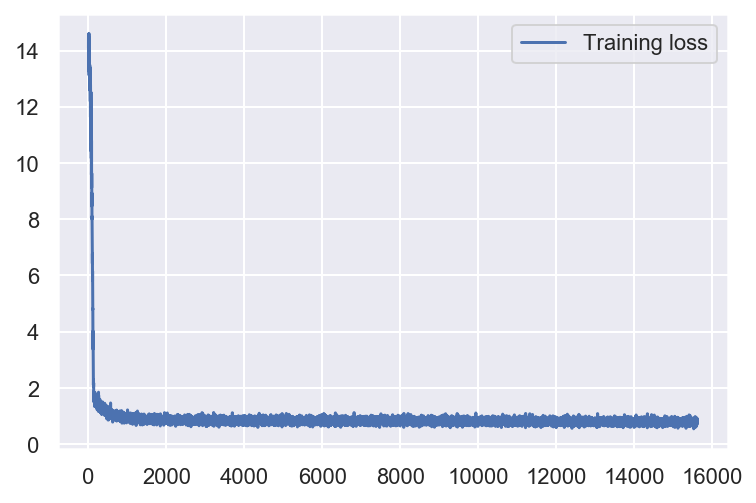

In [41]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.plot(mv_net.losses['train'], label='Training loss')
plt.legend()
_ = plt.ylim()

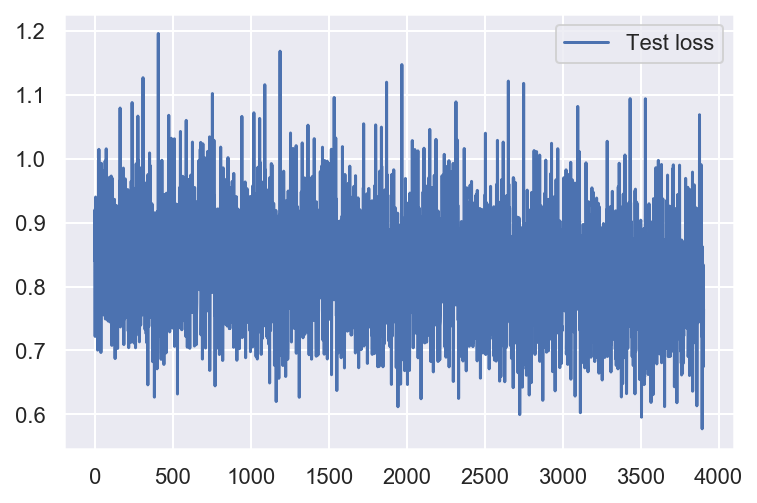

In [42]:
plt.plot(mv_net.losses['test'], label='Test loss')
plt.legend()
_ = plt.ylim()